LIBRERIAS PROYECTO

In [ ]:
# instalamos librería pca
!pip install -q pca
!pip install --upgrade plotly --q

# Tratamiento de datos
# ==============================================================================
import pandas as pd
from pandas.plotting import table
import numpy as np
import statsmodels.api as sm
import pca
import sklearn
import six
import ftplib
import os
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import date2num, num2date
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib import animation
plt.style.use("ggplot")# for pretty graphs
from IPython.display import clear_output
import plotly.express as px

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import k_means
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Configuración warnings
# ==============================================================================
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# **Instalación PySpark**

In [ ]:
from bs4 import BeautifulSoup
import requests
import os

In [ ]:
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#Obtener las versiones de spark la pagina web
##url = 'https://downloads.apache.org/spark/' 
##r = requests.get(url)
##html_doc = r.text
##soup = BeautifulSoup(html_doc)

# leer la pagina web y obtener las versiones de spark disponibles
##link_files = []
##for link in soup.find_all('a'):
##  link_files.append(link.get('href'))
##spark_link = [x for x in link_files if 'spark' in x]  
##print(spark_link)

##ver_spark = spark_link[1][:-1] # obtener la version y eliminar el caracter '/' del final
##print(ver_spark)

 # libreria de manejo del sistema operativo
#instalar automaticamente la version deseadda de spark
##link = "https://www-us.apache.org/dist/spark/"
##os.system(f"wget -q {link}{ver_spark}/{ver_spark}-bin-hadoop2.7.tgz")
##os.system(f"tar xf {ver_spark}-bin-hadoop2.7.tgz")

# instalar pyspark
#!pip install -q pyspark

In [ ]:
%%capture

!apt-get update
!apt-get install -y openjdk-8-jdk-headless -qq 
!apt-get install maven -qq

!curl -L "https://archive.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz" > spark-2.4.5-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
#!pip install -q findspark
#!pip install -q py4j

In [ ]:
# Definir variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = f"/content/{ver_spark}-bin-hadoop2.7"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
##print(f"/content/{ver_spark}-bin-hadoop2.7")

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-2.4.5-bin-hadoop2.7'

# CARGA DE INFORMACIÓN PARA TFM

## **Spark** para lectura de datos Movilidad y catálogo para CCAA y código INE para Comunidades Autónomas

In [ ]:
# Carga ficheros de Github:
#---------------------------------------------------------------------------------------------------------------------------------
#  1. Dataset Movilidad de Google Maps de España, fuente:  "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv" |
#  2. Dataset para trabajo de grupo, Escovid19data: Capturando colaborativamente datos de COVID-19 por provincias en España      |
#  3. Catalogo de equivalencias Regiones Autónomas entre fichero Google Maps y dataset Escovid19data, obtenido manualmente       |
#---------------------------------------------------------------------------------------------------------------------------------

from pyspark import SparkFiles
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("TFM_Mobility").getOrCreate()

path_mob = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
spark.sparkContext.addFile(path_mob)
dfm = spark.read.csv("file://"+SparkFiles.get("Global_Mobility_Report.csv"), header=True, inferSchema=True, sep=",")

#path_mob = "https://raw.githubusercontent.com/jorgebalderas/TestColab/main/catalogo_ccaa2.csv"
#spark.sparkContext.addFile(path_mob)
#dfm = spark.read.csv("file://"+SparkFiles.get("2020_ES_Region_Mobility_Report.csv"), header=True, inferSchema= True, sep=",")

path_cat = "https://raw.githubusercontent.com/jorgebalderas/TestColab/main/catalogo_ccaa2.csv"
spark.sparkContext.addFile(path_cat)
dfc = spark.read.csv("file://"+SparkFiles.get("catalogo_ccaa2.csv"), header=True, inferSchema= True, sep=";")

## Lectura Datos dataset Covid de Ruben F. Casal (RData) con **Pyreadr**

In [ ]:
#Instalar Librería para leer el objeto R
!pip install pyreadr --q

In [ ]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

#Leemos el archivo RData de datos Covid-19 desde el Github de Ruben F. Casal
url="https://github.com/rubenfcasal/COVID-19/blob/master/acumula2.RData?raw=true"
archivo = urlopen(url)
contenido = archivo.read()
fhandle = open( 'acumula2.RData', 'wb')
fhandle.write(contenido)
fhandle.close()
resultado = pyreadr.read_r("acumula2.RData")

# Convertimos el archivo R a Dataframe Pandas
print(resultado.keys()) # Validamos los objetos que obtenemos de los datos R que serán la base del DataFrame
df1 = resultado["acumula2"] # Extracción de la información del objeto R hacia Pandas DataFrame
type(df1) # Validamos el dipo de objeto generado para confirmar que tenemos nuestro PD DataFrame


odict_keys(['acumula2'])


pandas.core.frame.DataFrame

In [ ]:
#Leemos el archivo RData de datos Covid-19 desde el Github de Ruben F. Casal
url="https://github.com/rubenfcasal/COVID-19/blob/master/casos_ccaa.RData?raw=true"
archivo = urlopen(url)
contenido = archivo.read()
fhandle = open( 'casos_ccaa.RData', 'wb')
fhandle.write(contenido)
fhandle.close()
resultado = pyreadr.read_r("casos_ccaa.RData")

# Convertimos el archivo R a Dataframe Pandas
print(resultado.keys()) # Validamos los objetos que obtenemos de los datos R que serán la base del DataFrame
df2 = resultado["casos_ccaa"] # Extracción de la información del objeto R hacia Pandas DataFrame
type(df2) # Validamos el dipo de objeto generado para confirmar que tenemos nuestro PD DataFrame

odict_keys(['casos_ccaa'])


pandas.core.frame.DataFrame

In [ ]:
df1.head(5)

fecha iso       ccaa  confirmados  hospitalizados  uci  fallecidos
0  2020-01-01  ES     España            0               8    0           0
1  2020-01-01  AN  Andalucía            0               3    0           0
2  2020-01-01  AR     Aragón            0               0    0           0
3  2020-01-01  AS   Asturias            0               0    0           0
4  2020-01-01  CN   Canarias            0               0    0           0

In [ ]:
df2.head(5)

fecha iso    ccaa   sexo  ... confirmados  hospitalizados  uci  fallecidos
0  2020-01-01  ES  España  Total  ...           0               8    0           0
1  2020-01-01  ES  España  Total  ...           0               0    0           0
2  2020-01-01  ES  España  Total  ...           0               0    0           0
3  2020-01-01  ES  España  Total  ...           0               0    0           0
4  2020-01-01  ES  España  Total  ...           0               1    0           0

[5 rows x 9 columns]

### Convertimos dataframe Pandas a Spark para trabajar con resto de información

In [ ]:
#Definición estructura de dataframe Covid y cambio de valores Nulos por Ceros

df1['fecha'] = pd.to_datetime(df1['fecha'], format='%Y-%m-%d')
df1['iso'] = df1['iso'].astype(str)
df1['ccaa'] = df1['ccaa'].astype(str)
df1['confirmados'] = pd.to_numeric(df1['confirmados'].fillna(0))
df1['hospitalizados'] = pd.to_numeric(df1['hospitalizados'].fillna(0))
df1['uci'] = pd.to_numeric(df1['uci'].fillna(0))
df1['fallecidos'] = pd.to_numeric(df1['fallecidos'].fillna(0))

print(df1.info())
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           12200 non-null  datetime64[ns]
 1   iso             12200 non-null  object        
 2   ccaa            12200 non-null  object        
 3   confirmados     12200 non-null  int32         
 4   hospitalizados  12200 non-null  int32         
 5   uci             12200 non-null  int32         
 6   fallecidos      12200 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(2)
memory usage: 476.7+ KB
None


fecha iso       ccaa  confirmados  hospitalizados  uci  fallecidos
0 2020-01-01  ES     España            0               8    0           0
1 2020-01-01  AN  Andalucía            0               3    0           0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536800 entries, 0 to 536799
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   fecha           536800 non-null  object  
 1   iso             509960 non-null  category
 2   ccaa            536800 non-null  category
 3   sexo            536800 non-null  category
 4   edad            536800 non-null  category
 5   confirmados     536800 non-null  int32   
 6   hospitalizados  536800 non-null  int32   
 7   uci             536800 non-null  int32   
 8   fallecidos      536800 non-null  int32   
dtypes: category(4), int32(4), object(1)
memory usage: 14.3+ MB


In [ ]:
#	fecha	iso	ccaa	sexo	edad	confirmados	hospitalizados	uci	fallecidos
#462850	2021-06-09	NaN	No Consta	Hombres	20-29	0	0	0	0
#Definición estructura de dataframe Covid y cambio de valores Nulos por Ceros

df2['fecha'] = pd.to_datetime(df2['fecha'], format='%Y-%m-%d')
df2['iso'] = df2['iso'].astype(str)
df2['ccaa'] = df2['ccaa'].astype(str)
df2['sexo'] = df2['sexo'].astype(str)
df2['edad'] = df2['edad'].astype(str)
df2['confirmados'] = pd.to_numeric(df2['confirmados'].fillna(0))
df2['hospitalizados'] = pd.to_numeric(df2['hospitalizados'].fillna(0))
df2['uci'] = pd.to_numeric(df2['uci'].fillna(0))
df2['fallecidos'] = pd.to_numeric(df2['fallecidos'].fillna(0))

print(df2.info())
df2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536800 entries, 0 to 536799
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fecha           536800 non-null  datetime64[ns]
 1   iso             536800 non-null  object        
 2   ccaa            536800 non-null  object        
 3   sexo            536800 non-null  object        
 4   edad            536800 non-null  object        
 5   confirmados     536800 non-null  int32         
 6   hospitalizados  536800 non-null  int32         
 7   uci             536800 non-null  int32         
 8   fallecidos      536800 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(4)
memory usage: 28.7+ MB
None


fecha iso    ccaa   sexo  ... confirmados  hospitalizados  uci  fallecidos
0 2020-01-01  ES  España  Total  ...           0               8    0           0
1 2020-01-01  ES  España  Total  ...           0               0    0           0

[2 rows x 9 columns]

In [ ]:
# Conversión Dataframe de Pandas a Spark
dfcov = spark.createDataFrame(df1)

In [ ]:
dfcov_diario = spark.createDataFrame(df2)

In [ ]:
dfcov_diario.show(1)

+-------------------+---+------+-----+-----+-----------+--------------+---+----------+
|              fecha|iso|  ccaa| sexo| edad|confirmados|hospitalizados|uci|fallecidos|
+-------------------+---+------+-----+-----+-----------+--------------+---+----------+
|2020-01-01 00:00:00| ES|España|Total|Total|          0|             8|  0|         0|
+-------------------+---+------+-----+-----+-----------+--------------+---+----------+
only showing top 1 row



## Consulta head() para validar información de datasets

In [ ]:
dfm.select("*").show(1)
dfcov.select("*").show(1)
dfc.select("*").show(1)
dfcov_diario.select("*").show(1)

+-------------------+--------------------+------------+------------+----------+---------------+----------------+--------------------+-------------------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|      country_region|sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|            place_id|               date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------------+------------+------------+----------+---------------+----------------+--------------------+-------------------+-------------

# Uso de **Spark SQL** para realizar merge entre datasets Covid y Movilidad

In [ ]:
# Se obtiene dataframe para trabajar mobilidad seleccionando variables relevantes

dfcov.createOrReplaceTempView("tbl_catalogo_ccaa")
df_cont = spark.sql(" \
                    SELECT  date_format(fecha, 'yyyy-MM-dd') AS date \
                            ,iso \
                            ,ccaa \
                            ,confirmados \
                            ,hospitalizados \
                            ,uci \
                            ,fallecidos \
                    FROM    tbl_catalogo_ccaa \
                   ")
df_cont.show(5)

+----------+---+---------+-----------+--------------+---+----------+
|      date|iso|     ccaa|confirmados|hospitalizados|uci|fallecidos|
+----------+---+---------+-----------+--------------+---+----------+
|2020-01-01| ES|   España|          0|             8|  0|         0|
|2020-01-01| AN|Andalucía|          0|             3|  0|         0|
|2020-01-01| AR|   Aragón|          0|             0|  0|         0|
|2020-01-01| AS| Asturias|          0|             0|  0|         0|
|2020-01-01| CN| Canarias|          0|             0|  0|         0|
+----------+---+---------+-----------+--------------+---+----------+
only showing top 5 rows



In [ ]:
# Creación de nueva variable "date_new" en el dataset de Movilidad con formato "yyyy-MM-dd" para realizar el merge con los datos de Covid
from pyspark.sql import functions as f

dfm = dfm.withColumn('date_new', f.from_unixtime(f.unix_timestamp('date', 'dd/MM/yyyy')))

In [ ]:
# Se obtiene dataframe para trabajar mobilidad seleccionando variables relevantes
# Cambiar date por date_new
dfm.createOrReplaceTempView("tbl_mobility")
dfc.createOrReplaceTempView("tbl_catalogo_ccaa")
df_mob_raw1 = spark.sql(" \
                        SELECT  date_format(a.date, 'yyyy-MM-dd') AS date\
                                ,Round(AVG(a.retail_and_recreation_percent_change_from_baseline), 0) AS retail_and_recreation \
                                ,Round(AVG(a.grocery_and_pharmacy_percent_change_from_baseline), 0) AS grocery_and_pharmacy \
                                ,Round(AVG(a.parks_percent_change_from_baseline), 0) AS parks \
                                ,Round(AVG(a.transit_stations_percent_change_from_baseline), 0) AS transit_stations \
                                ,Round(AVG(a.workplaces_percent_change_from_baseline), 0) AS workplaces \
                                ,Round(AVG(a.residential_percent_change_from_baseline), 0) AS residential \
                                ,a.sub_region_1 \
                                ,b.ccaa_acumula2 \
                        FROM    tbl_mobility AS a \
                                LEFT JOIN tbl_catalogo_ccaa AS b ON b.sub_region_1_mob=a.sub_region_1 \
                        WHERE   a.country_region = 'Spain' \
                        GROUP BY a.date, a.sub_region_1, b.ccaa_acumula2 \
                        ")
df_mob_raw1.show(5)

+----------+---------------------+--------------------+-----+----------------+----------+-----------+------------+-------------+
|      date|retail_and_recreation|grocery_and_pharmacy|parks|transit_stations|workplaces|residential|sub_region_1|ccaa_acumula2|
+----------+---------------------+--------------------+-----+----------------+----------+-----------+------------+-------------+
|2020-06-27|                -23.0|                -8.0| 30.0|           -20.0|      -4.0|        1.0|   Andalusia|    Andalucía|
|2020-07-31|                -12.0|                -3.0| 45.0|           -22.0|     -28.0|        4.0|   Andalusia|    Andalucía|
|2020-02-26|                  2.0|                 4.0| 16.0|            -2.0|       5.0|       -1.0|      Aragon|       Aragón|
|2020-04-29|                -82.0|               -38.0|-45.0|           -71.0|     -56.0|       23.0|      Aragon|       Aragón|
|2020-05-02|                -84.0|               -30.0|-35.0|           -64.0|     -51.0|       2

In [ ]:
df_mob_raw1.createOrReplaceTempView("mob1")

df_mob_raw2 = spark.sql(" \
                    SELECT  date \
                            ,retail_and_recreation AS retail_and_recreation \
                            ,grocery_and_pharmacy AS grocery_and_pharmacy \
                            ,parks AS parks \
                            ,transit_stations AS transit_stations \
                            ,workplaces AS workplaces \
                            ,residential AS residential \
                            ,'Ceuta y Melilla' AS sub_region_1 \
                            ,'Ceuta y Melilla' AS ccaa_acumula2 \
                    FROM    mob1 \
                    WHERE   sub_region_1 IN ('Ceuta','Melilla') \
                    ")

df_mob_raw2.show(5)

+----------+---------------------+--------------------+-----+----------------+----------+-----------+---------------+---------------+
|      date|retail_and_recreation|grocery_and_pharmacy|parks|transit_stations|workplaces|residential|   sub_region_1|  ccaa_acumula2|
+----------+---------------------+--------------------+-----+----------------+----------+-----------+---------------+---------------+
|2020-02-24|                -11.0|               -10.0|  8.0|            null|     -18.0|       -1.0|Ceuta y Melilla|Ceuta y Melilla|
|2020-04-18|                -94.0|               -60.0|-88.0|            null|     -61.0|       null|Ceuta y Melilla|Ceuta y Melilla|
|2020-12-17|                -17.0|                -5.0| -9.0|            null|     -13.0|        6.0|Ceuta y Melilla|Ceuta y Melilla|
|2020-09-20|                 -8.0|                null| -2.0|            null|       1.0|       null|Ceuta y Melilla|Ceuta y Melilla|
|2021-01-11|                -20.0|                -4.0|-35.0| 

In [ ]:
df_mob_raw2.createOrReplaceTempView("mob1")

df_mob_raw2 = spark.sql(" \
                    SELECT  date \
                            ,AVG(retail_and_recreation) AS retail_and_recreation \
                            ,AVG(grocery_and_pharmacy) AS grocery_and_pharmacy \
                            ,AVG(parks) AS parks \
                            ,AVG(transit_stations) AS transit_stations \
                            ,AVG(workplaces) AS workplaces \
                            ,AVG(residential) AS residential \
                            ,sub_region_1 \
                            ,ccaa_acumula2 \
                    FROM    mob1 \
                    GROUP BY date, sub_region_1, ccaa_acumula2 \
                    ")

In [ ]:
df_mob_raw1.createOrReplaceTempView("mob1")
df_mob_raw2.createOrReplaceTempView("mob2")

df_mob_raw = spark.sql(" \
                      SELECT  * \
                      FROM    mob1 \
                      WHERE   sub_region_1 NOT IN ('Ceuta', 'Melilla') \
                      UNION \
                      SELECT  * \
                      FROM    mob2 \
                      ")

df_mob_raw.show(5)

+----------+---------------------+--------------------+-----+----------------+----------+-----------+-------------------+-------------+
|      date|retail_and_recreation|grocery_and_pharmacy|parks|transit_stations|workplaces|residential|       sub_region_1|ccaa_acumula2|
+----------+---------------------+--------------------+-----+----------------+----------+-----------+-------------------+-------------+
|2021-06-19|                -33.0|                -9.0|-23.0|           -29.0|     -26.0|        7.0|     Canary Islands|     Canarias|
|2021-01-26|                -46.0|                -2.0| -2.0|           -23.0|     -20.0|        8.0|     Basque Country|   País Vasco|
|2021-08-03|                 19.0|                40.0|191.0|            -3.0|     -31.0|        2.0|Valencian Community|C. Valenciana|
|2021-04-17|                -40.0|                 7.0|  0.0|           -29.0|     -14.0|        9.0|     Basque Country|   País Vasco|
|2020-02-29|                  6.0|              

In [ ]:
df_mob_raw.createOrReplaceTempView('mob')
spark.sql("SELECT DISTINCT sub_region_1 FROM mob").show()

+-------------------+
|       sub_region_1|
+-------------------+
|           Asturias|
|          Cantabria|
|  Castile-La Mancha|
|    Ceuta y Melilla|
|        Extremadura|
|            Galicia|
|     Basque Country|
|     Canary Islands|
|             Aragon|
|          Andalusia|
|   Balearic Islands|
|   Region of Murcia|
|           La Rioja|
|          Catalonia|
|            Navarre|
|Community of Madrid|
|Valencian Community|
|   Castile and León|
+-------------------+



In [ ]:
# Se obtiene dataframe para trabajar mobilidad seleccionando variables relevantes

dfcov_diario.createOrReplaceTempView("covid_diario")
df_covid_raw = spark.sql(" \
                    SELECT  DISTINCT date_format(fecha, 'yyyy-MM-dd') AS date \
                            ,iso \
                            ,ccaa \
                            ,sum(confirmados) AS confirmados \
                            ,sum(hospitalizados) AS hospitalizados \
                            ,sum(uci) AS uci \
                            ,sum(fallecidos) AS fallecidos \
                    FROM    covid_diario \
                    GROUP BY date_format(fecha, 'yyyy-MM-dd'), iso, ccaa \
                   ")
df_covid_raw.show(5)

+----------+---+---------------+-----------+--------------+---+----------+
|      date|iso|           ccaa|confirmados|hospitalizados|uci|fallecidos|
+----------+---+---------------+-----------+--------------+---+----------+
|2021-07-20| EX|    Extremadura|       2476|            32|  4|         4|
|2021-04-12| AN|      Andalucía|       6712|           604| 76|        48|
|2020-08-05| EA|Ceuta y Melilla|         16|             4|  0|         0|
|2021-03-25|nan|      No Consta|         80|            12|  4|         0|
|2021-06-30| PV|     País Vasco|       1484|            32|  4|         8|
+----------+---+---------------+-----------+--------------+---+----------+
only showing top 5 rows



In [ ]:
df_covid_raw.createOrReplaceTempView("tbl")
spark.sql("select * from tbl where date = '2020-05-17'").show(100)

+----------+---+--------------------+-----------+--------------+---+----------+
|      date|iso|                ccaa|confirmados|hospitalizados|uci|fallecidos|
+----------+---+--------------------+-----------+--------------+---+----------+
|2020-05-17| GA|             Galicia|          8|             8|  0|         4|
|2020-05-17| MD|              Madrid|        196|            80| 16|        60|
|2020-05-17| VC|Comunidad Valenciana|         52|             8|  0|         8|
|2020-05-17| AN|           Andalucía|         24|             8|  0|         8|
|2020-05-17| EX|         Extremadura|          4|             8|  0|         8|
|2020-05-17| CB|           Cantabria|         12|             0|  0|         0|
|2020-05-17| PV|          País Vasco|         52|            12|  0|         8|
|2020-05-17| IB|      Islas Baleares|         20|             4|  0|         0|
|2020-05-17| CN|            Canarias|          0|             8|  0|         8|
|2020-05-17| EA|     Ceuta y Melilla|   

In [ ]:
# Creación de dataframe con datos de movilidad y covid por Comunidad Autónoma, se depuran los siguientes campos:
#     * ccaa = "No Consta"
#     * ccaa = "España" --> al ser acumulado de las CCAA, no aporta al análisis

df_covid_raw.createOrReplaceTempView("tbl_covid_raw")
df_mob_raw.createOrReplaceTempView("tbl_mobility_raw")

df_cov_mobi_raw = spark.sql(" \
                            SELECT  a.date \
                                    ,a.iso \
                                    ,a.ccaa \
                                    ,b.retail_and_recreation \
                                    ,b.grocery_and_pharmacy \
                                    ,b.parks \
                                    ,b.transit_stations \
                                    ,b.workplaces \
                                    ,b.residential \
                                    ,a.confirmados \
                                    ,a.hospitalizados \
                                    ,a.uci \
                                    ,a.fallecidos \
                              FROM  tbl_covid_raw AS a \
                                    LEFT JOIN tbl_mobility_raw AS b ON (b.date=a.date AND b.ccaa_acumula2=a.ccaa) \
                              WHERE ccaa NOT IN ('No Consta', 'España') \
                                    and a.date <= '2021-08-31' \
                              ORDER BY a.date ASC, a.ccaa ASC \
                            ")

df_cov_mobi_raw.show(5)

+----------+---+---------+---------------------+--------------------+-----+----------------+----------+-----------+-----------+--------------+---+----------+
|      date|iso|     ccaa|retail_and_recreation|grocery_and_pharmacy|parks|transit_stations|workplaces|residential|confirmados|hospitalizados|uci|fallecidos|
+----------+---+---------+---------------------+--------------------+-----+----------------+----------+-----------+-----------+--------------+---+----------+
|2020-01-01| AN|Andalucía|                 null|                null| null|            null|      null|       null|          0|            12|  0|         0|
|2020-01-01| AR|   Aragón|                 null|                null| null|            null|      null|       null|          0|             0|  0|         0|
|2020-01-01| AS| Asturias|                 null|                null| null|            null|      null|       null|          0|             0|  0|         0|
|2020-01-01| CN| Canarias|                 null|    

In [ ]:
df_cov_mobi_raw.createOrReplaceTempView("tbl_cov_mobi_raw")
spark.sql("SELECT DISTINCT ccaa FROM tbl_cov_mobi_raw").show(20)

+--------------------+
|                ccaa|
+--------------------+
|Comunidad Valenciana|
|              Madrid|
|            Asturias|
|              Aragón|
|           Cantabria|
|     Ceuta y Melilla|
|         Extremadura|
|             Galicia|
|              Murcia|
|            Canarias|
|           Andalucía|
|      Islas Baleares|
|  Castilla-La Mancha|
|            Cataluña|
|             Navarra|
|     Castilla y León|
|            La Rioja|
|          País Vasco|
+--------------------+



In [ ]:
df_cov_mobi_raw.createOrReplaceTempView("tbl_final")

consulta = spark.sql(" \
                            SELECT  * \
                            FROM    tbl_final \
                            WHERE   date = '2021-05-17' \
                            ")

consulta.show(100)

+----------+---+--------------------+---------------------+--------------------+-----+----------------+----------+-----------+-----------+--------------+---+----------+
|      date|iso|                ccaa|retail_and_recreation|grocery_and_pharmacy|parks|transit_stations|workplaces|residential|confirmados|hospitalizados|uci|fallecidos|
+----------+---+--------------------+---------------------+--------------------+-----+----------------+----------+-----------+-----------+--------------+---+----------+
|2021-05-17| AN|           Andalucía|                -14.0|                 7.0|  5.0|            -2.0|     -10.0|        3.0|       3952|           364| 48|        28|
|2021-05-17| AR|              Aragón|                -14.0|                17.0| 45.0|           -14.0|      -4.0|        1.0|        536|           108| 12|         0|
|2021-05-17| AS|            Asturias|                -15.0|                 8.0| 69.0|             3.0|     -14.0|        1.0|        188|            28|  

In [ ]:
#df_cov_mobi_raw.createOrReplaceTempView("tbl_cov_mobi_raw")
#spark.sql("SELECT * FROM tbl_cov_mobi_raw WHERE retail_and_recreation IS NULL").show(20)
#spark.sql("SELECT * FROM tbl_cov_mobi_raw WHERE date = '2020-01-07'").show(20)

# Análisis de Datos con Pandas e imputación de Nulos

In [ ]:
df_cm = df_cov_mobi_raw.toPandas()

## Tratamiento de Valores Nulos

In [ ]:
#Porcentaje de valores nulos por columna

df_cm.isnull().sum() / len(df_cm)

date                     0.000000
iso                      0.000000
ccaa                     0.000000
retail_and_recreation    0.230524
grocery_and_pharmacy     0.244116
parks                    0.234173
transit_stations         0.245849
workplaces               0.230432
residential              0.242292
confirmados              0.000000
hospitalizados           0.000000
uci                      0.000000
fallecidos               0.000000
dtype: float64

In [ ]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   10962 non-null  object 
 1   iso                    10962 non-null  object 
 2   ccaa                   10962 non-null  object 
 3   retail_and_recreation  8435 non-null   float64
 4   grocery_and_pharmacy   8286 non-null   float64
 5   parks                  8395 non-null   float64
 6   transit_stations       8267 non-null   float64
 7   workplaces             8436 non-null   float64
 8   residential            8306 non-null   float64
 9   confirmados            10962 non-null  int64  
 10  hospitalizados         10962 non-null  int64  
 11  uci                    10962 non-null  int64  
 12  fallecidos             10962 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 1.1+ MB


In [ ]:
df_cm.describe().T

count         mean  ...     75%      max
retail_and_recreation   8435.0   -30.311737  ...   -13.0     63.0
grocery_and_pharmacy    8286.0    -3.357048  ...     9.0    205.0
parks                   8395.0    12.542942  ...    34.0    543.0
transit_stations        8267.0   -25.581710  ...    -9.0     71.0
workplaces              8436.0   -24.718172  ...   -12.0     28.0
residential             8306.0     7.378883  ...    10.0     46.0
confirmados            10962.0  1764.004014  ...  1700.0  40156.0
hospitalizados         10962.0   146.217114  ...   136.0   7720.0
uci                    10962.0    13.850757  ...    16.0    540.0
fallecidos             10962.0    30.674330  ...    28.0   1336.0

[10 rows x 8 columns]

In [ ]:
# Método para eliminar duplicados
df_cm.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10957    False
10958    False
10959    False
10960    False
10961    False
Length: 10962, dtype: bool

In [ ]:
df_cm.iloc[:,3:8].head(5)

retail_and_recreation  grocery_and_pharmacy  ...  transit_stations  workplaces
0                    NaN                   NaN  ...               NaN         NaN
1                    NaN                   NaN  ...               NaN         NaN
2                    NaN                   NaN  ...               NaN         NaN
3                    NaN                   NaN  ...               NaN         NaN
4                    NaN                   NaN  ...               NaN         NaN

[5 rows x 5 columns]

In [ ]:
#df_cm1 = df_cm.copy()

In [ ]:
# IMPUTACION DE VALORES NULOS UTILIZANDO LA TECNICA DE K-Nearest Neighbors, utilizando 3 valores vecinos

from sklearn.impute import KNNImputer #1. k-Nearest Neighbors (kNN) Imputation
#from missingpy import MissForest #2. Random Forest Imputation (MissForest)

imputa = KNNImputer(n_neighbors=3)
#imputa = MissForest()
df_cm.iloc[:,3:] = imputa.fit_transform(df_cm.iloc[:,3:])

In [ ]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   10962 non-null  object 
 1   iso                    10962 non-null  object 
 2   ccaa                   10962 non-null  object 
 3   retail_and_recreation  10962 non-null  float64
 4   grocery_and_pharmacy   10962 non-null  float64
 5   parks                  10962 non-null  float64
 6   transit_stations       10962 non-null  float64
 7   workplaces             10962 non-null  float64
 8   residential            10962 non-null  float64
 9   confirmados            10962 non-null  float64
 10  hospitalizados         10962 non-null  float64
 11  uci                    10962 non-null  float64
 12  fallecidos             10962 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
#Porcentaje de valores nulos por columna después de tratamiento

df_cm.isnull().sum() / len(df_cm)

date                     0.0
iso                      0.0
ccaa                     0.0
retail_and_recreation    0.0
grocery_and_pharmacy     0.0
parks                    0.0
transit_stations         0.0
workplaces               0.0
residential              0.0
confirmados              0.0
hospitalizados           0.0
uci                      0.0
fallecidos               0.0
dtype: float64

In [ ]:
df_cm.head(5)

date iso       ccaa  ...  hospitalizados  uci  fallecidos
0  2020-01-01  AN  Andalucía  ...            12.0  0.0         0.0
1  2020-01-01  AR     Aragón  ...             0.0  0.0         0.0
2  2020-01-01  AS   Asturias  ...             0.0  0.0         0.0
3  2020-01-01  CN   Canarias  ...             0.0  0.0         0.0
4  2020-01-01  CB  Cantabria  ...             0.0  0.0         0.0

[5 rows x 13 columns]

In [ ]:
df_cm.describe().T

count         mean  ...     75%      max
retail_and_recreation  10962.0   -27.898924  ...    -9.0     63.0
grocery_and_pharmacy   10962.0    -2.921471  ...     8.0    205.0
parks                  10962.0    14.202427  ...    32.0    543.0
transit_stations       10962.0   -23.050873  ...    -5.0     71.0
workplaces             10962.0   -23.063720  ...   -10.0     28.0
residential            10962.0     6.777063  ...     9.5     46.0
confirmados            10962.0  1764.004014  ...  1700.0  40156.0
hospitalizados         10962.0   146.217114  ...   136.0   7720.0
uci                    10962.0    13.850757  ...    16.0    540.0
fallecidos             10962.0    30.674330  ...    28.0   1336.0

[10 rows x 8 columns]

## Análisis de variables



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d35d6590>,
      dtype=object)

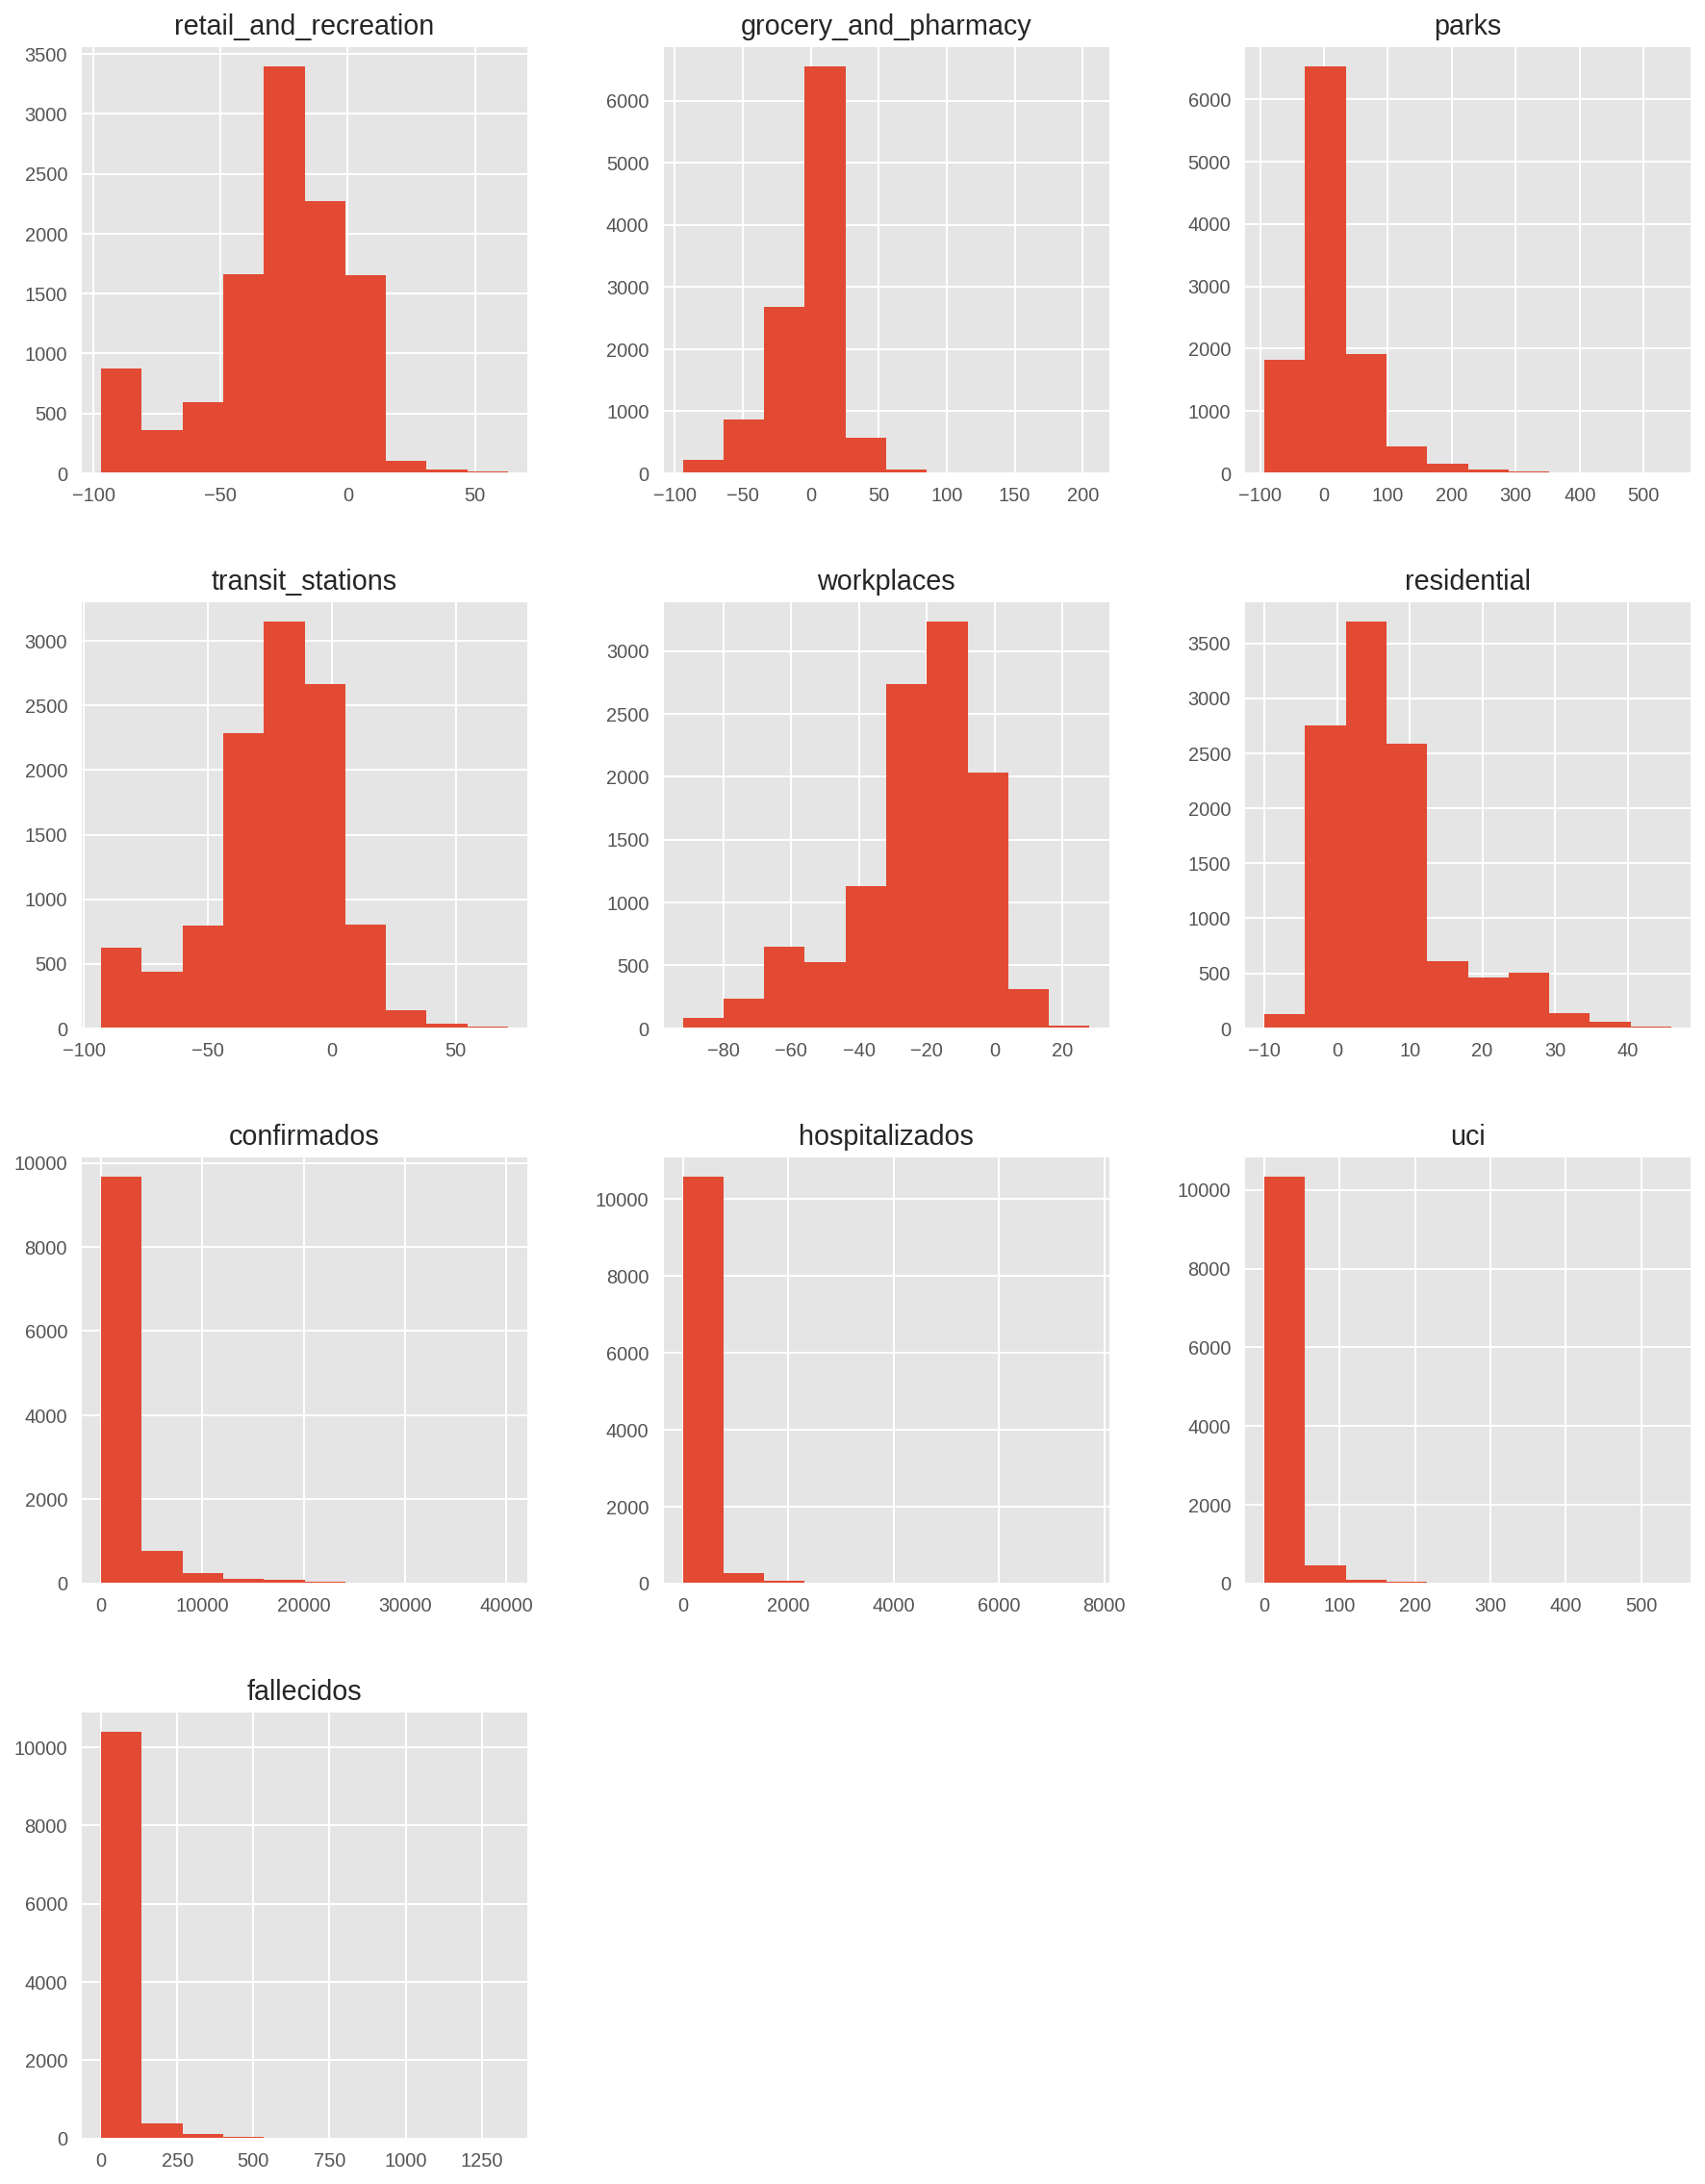

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_cm.hist(ax = ax)

### Datos Movilidad

In [ ]:
px.histogram(df_cm, x="retail_and_recreation").show()
px.histogram(df_cm, x="grocery_and_pharmacy").show()
px.histogram(df_cm, x="parks").show()
px.histogram(df_cm, x="transit_stations").show()
px.histogram(df_cm, x="workplaces").show()
px.histogram(df_cm, x="residential").show()

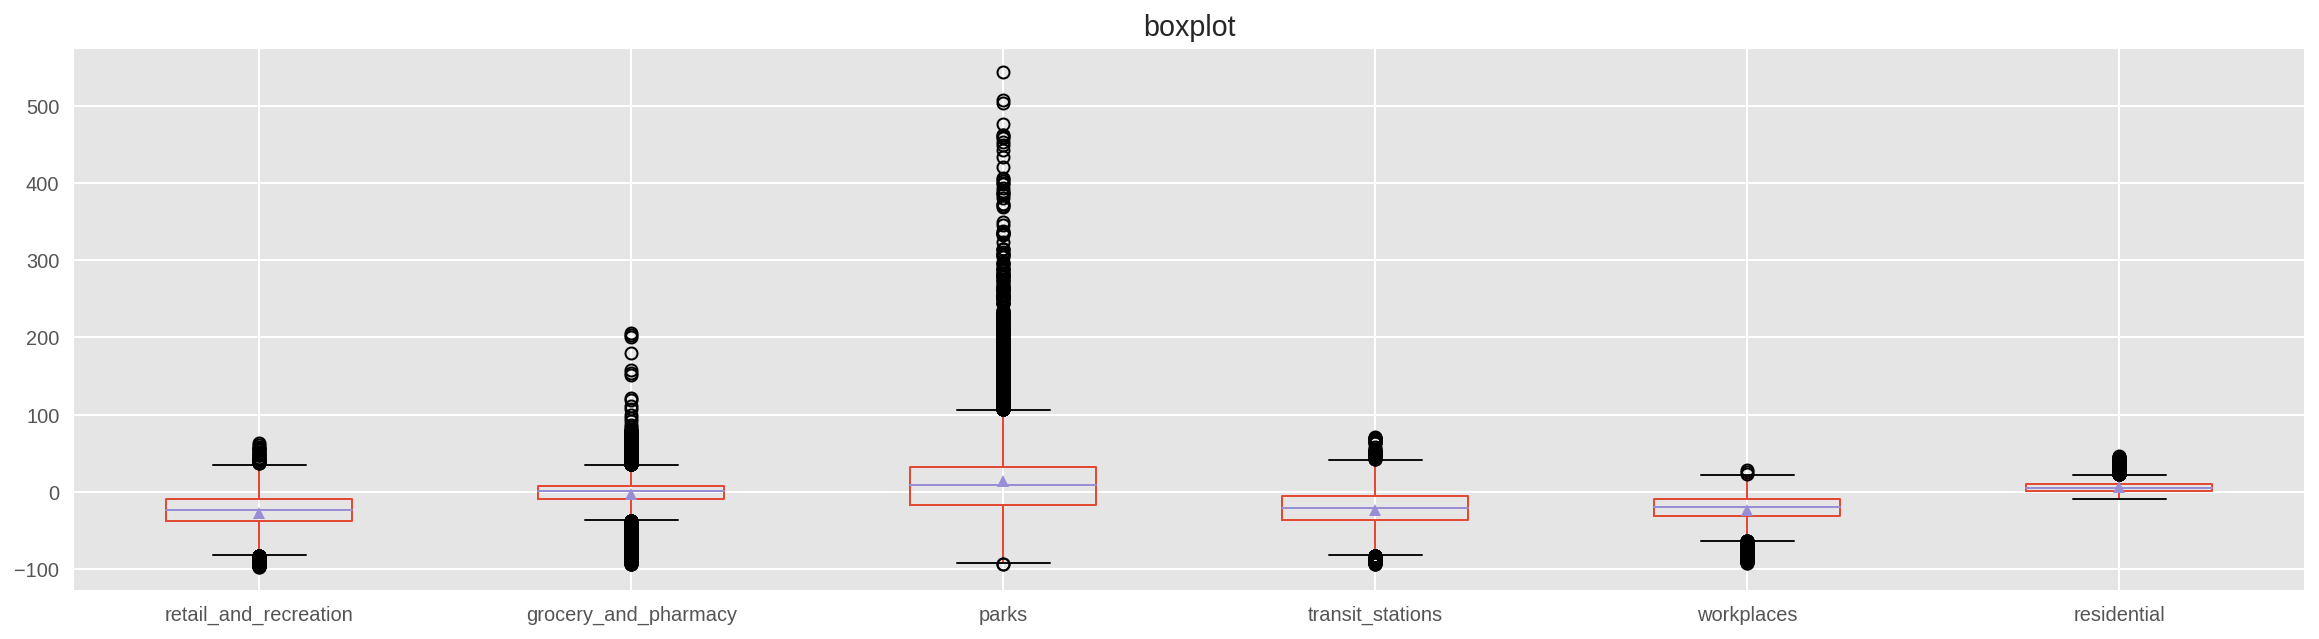

In [ ]:
# Boxplot datos Movilidad
ax = df_cm[['retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential']].plot(kind='box', title='boxplot', showmeans=True, figsize=(20, 5))
plt.show()

* Se observa que las variables *grocery_and_pharmacy, parks y transit_stations* de los datos de movilidad presentan valores atípicos. Destaca la variable Parks con una cantidad elevada de Outliers, se procede a validar el porcentaje de valres fuera de rango.
* Para obtener mayor información, visitar la [página de consulta](https://support.google.com/covid19-mobility/answer/9825414?hl=es&ref_topic=9822927) que google pone a disposición.

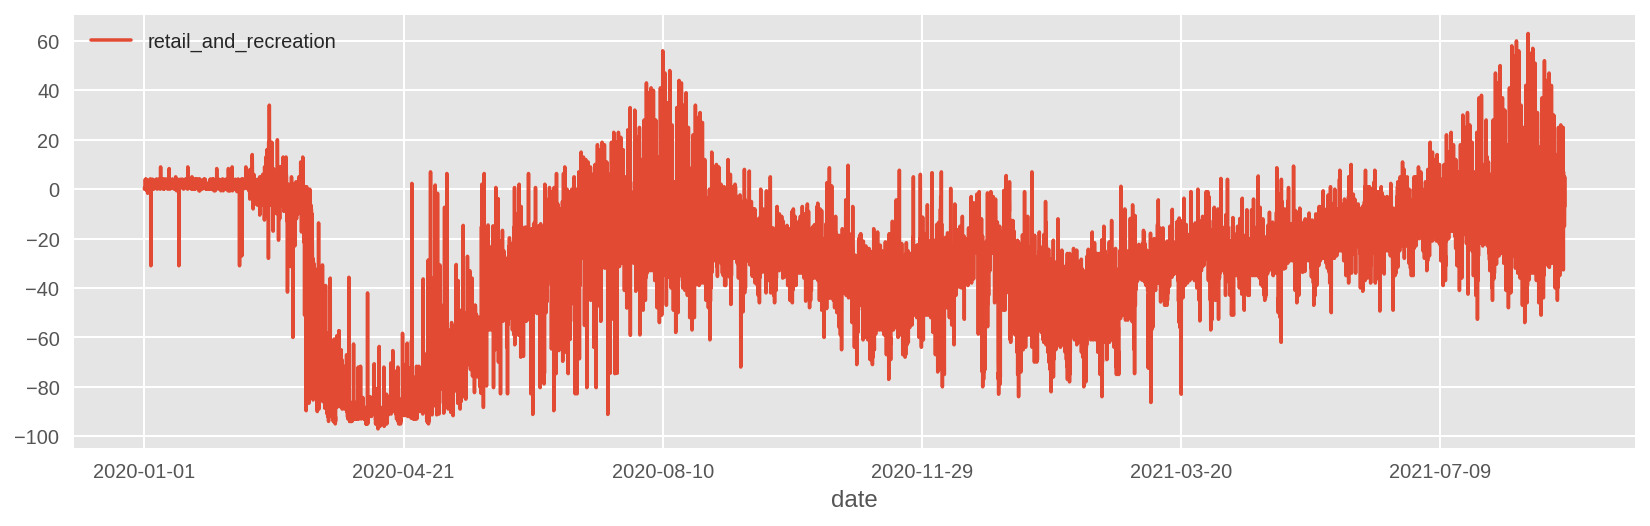

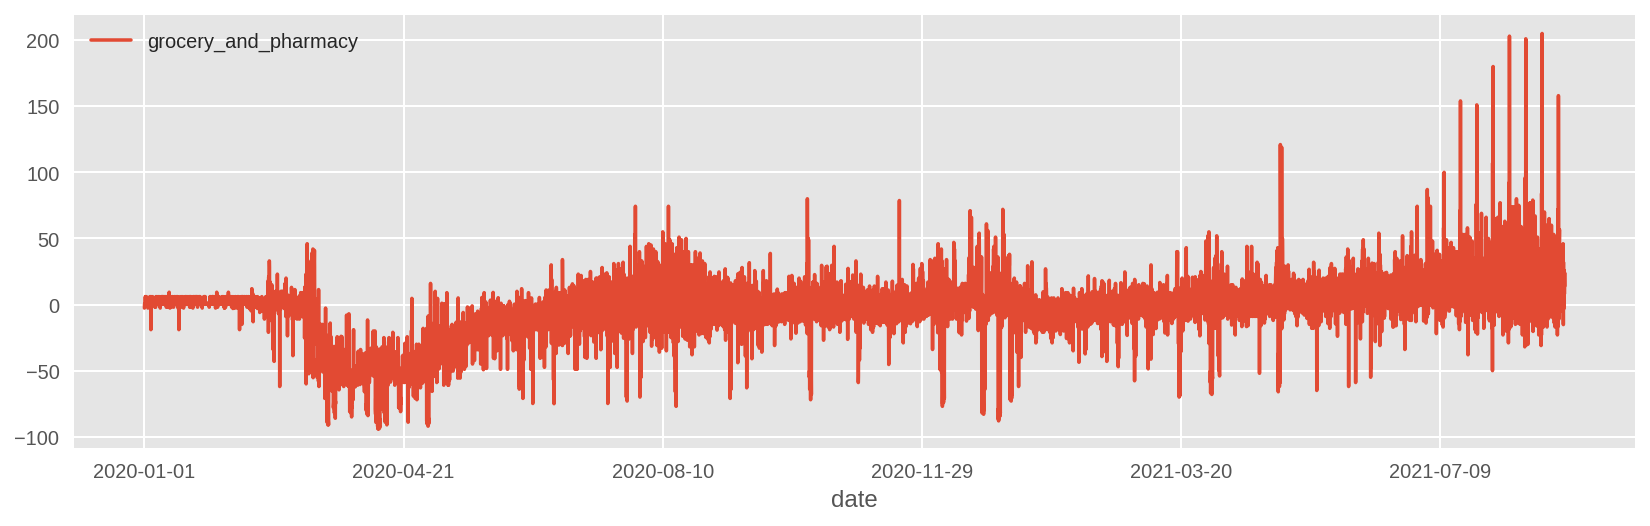

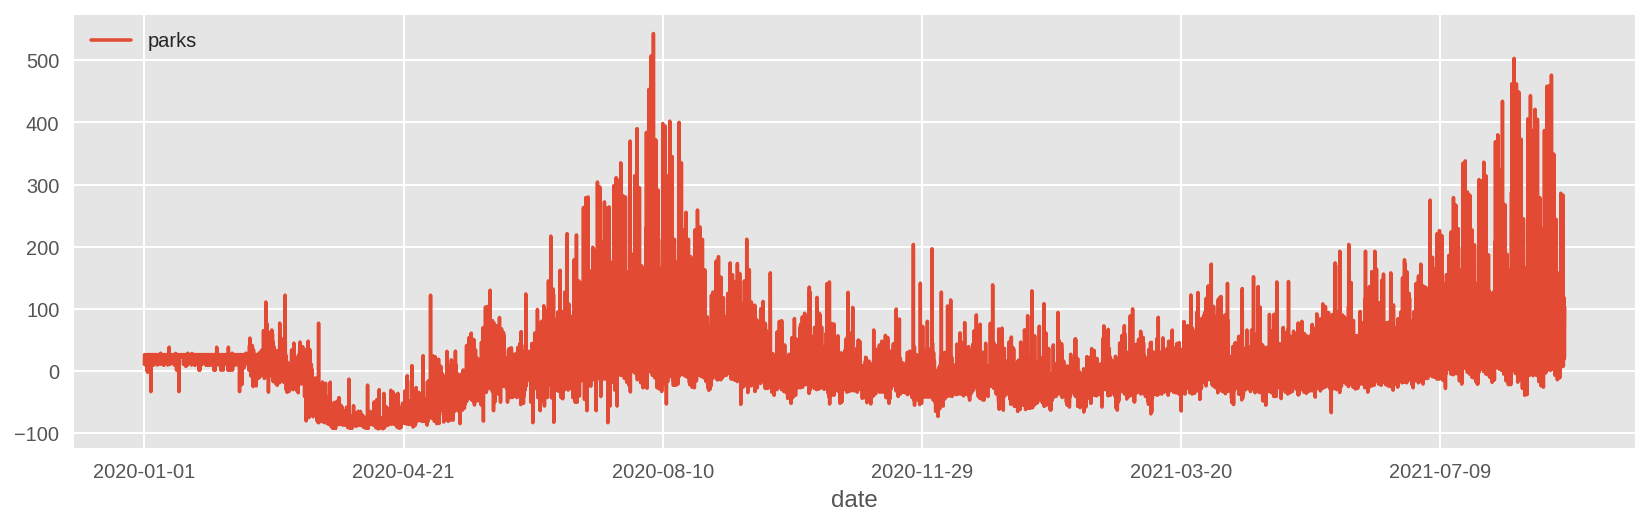

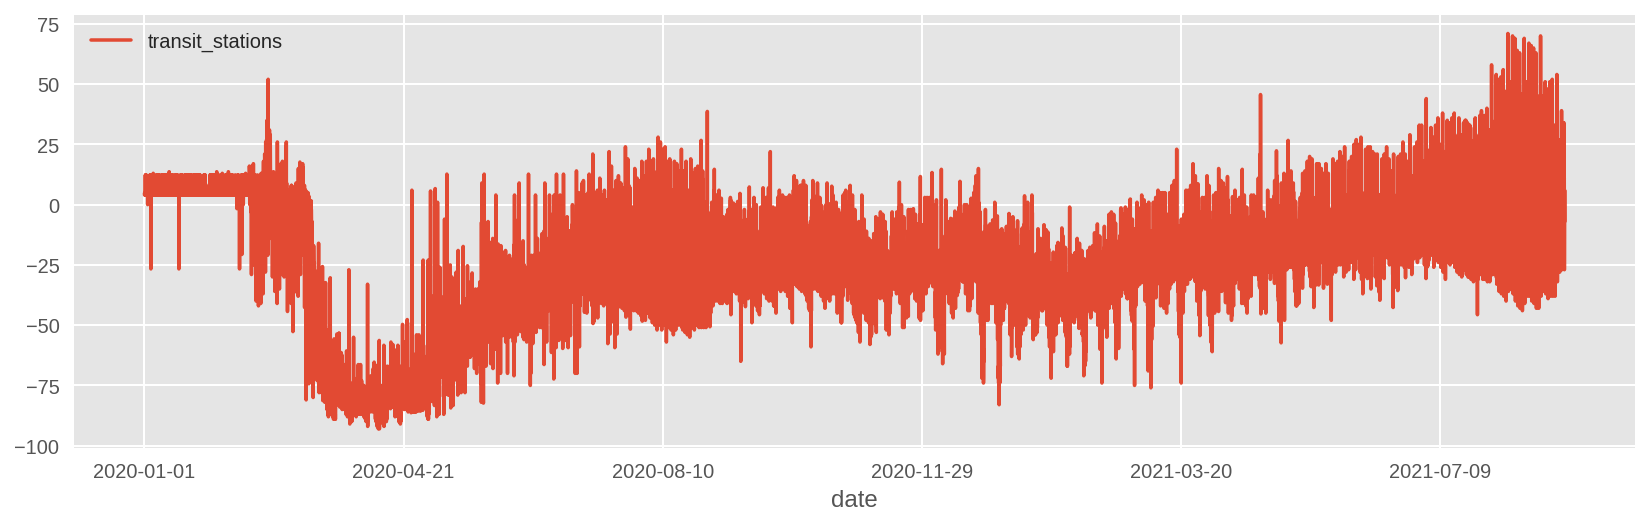

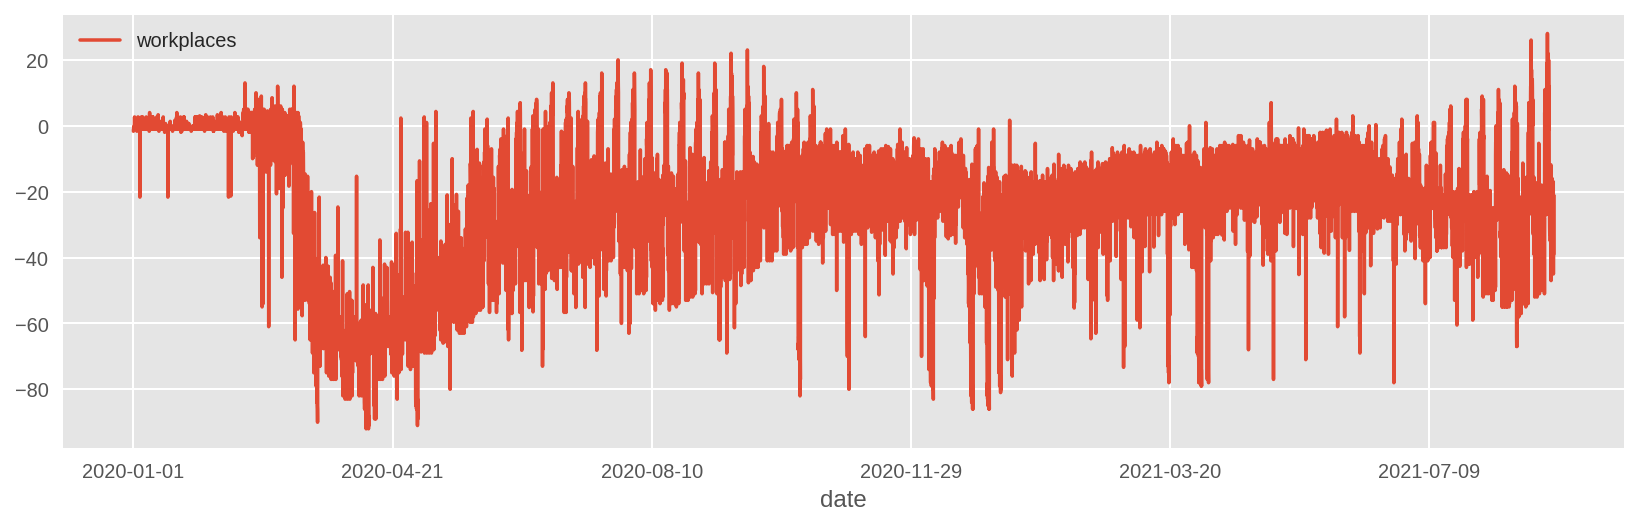

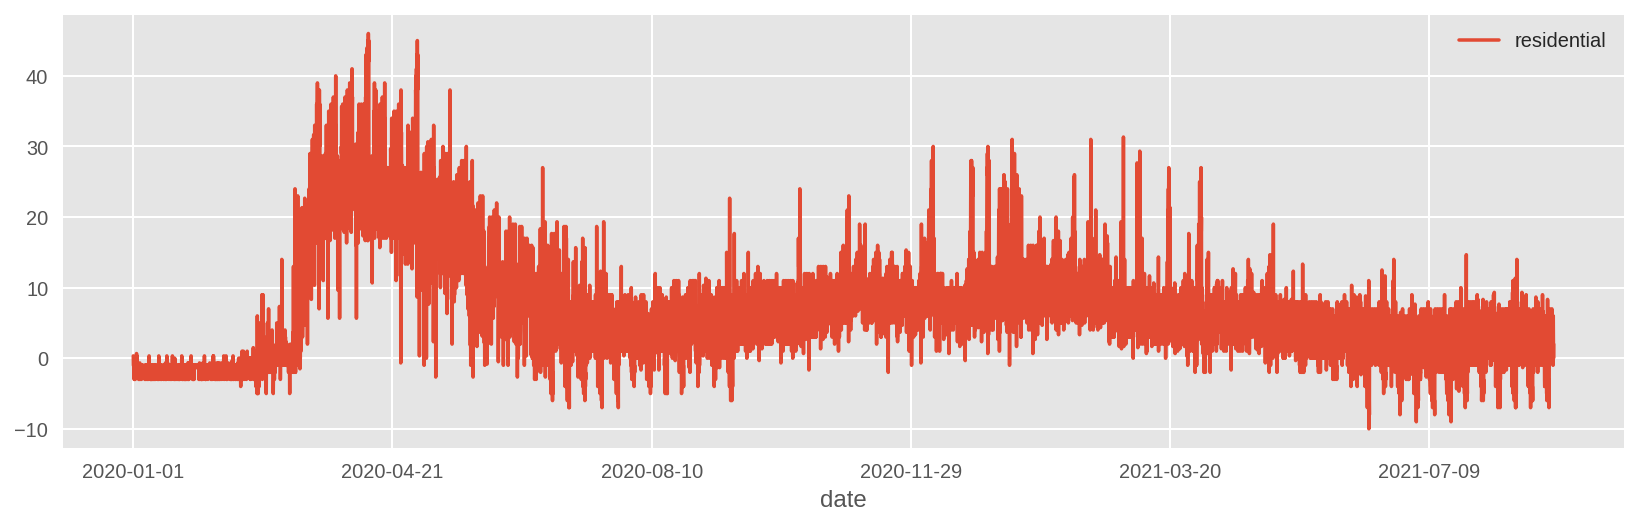

In [ ]:
df_cm.plot(x="date", y="retail_and_recreation", figsize=(14,4))
df_cm.plot(x="date", y="grocery_and_pharmacy", figsize=(14,4))
df_cm.plot(x="date", y="parks", figsize=(14,4))
df_cm.plot(x="date", y="transit_stations", figsize=(14,4))
df_cm.plot(x="date", y="workplaces", figsize=(14,4))
df_cm.plot(x="date", y="residential", figsize=(14,4))

### Datos Covid

In [ ]:
px.histogram(df_cm, x="confirmados").show()
px.histogram(df_cm, x="hospitalizados").show()
px.histogram(df_cm, x="uci").show()
px.histogram(df_cm, x="fallecidos").show()

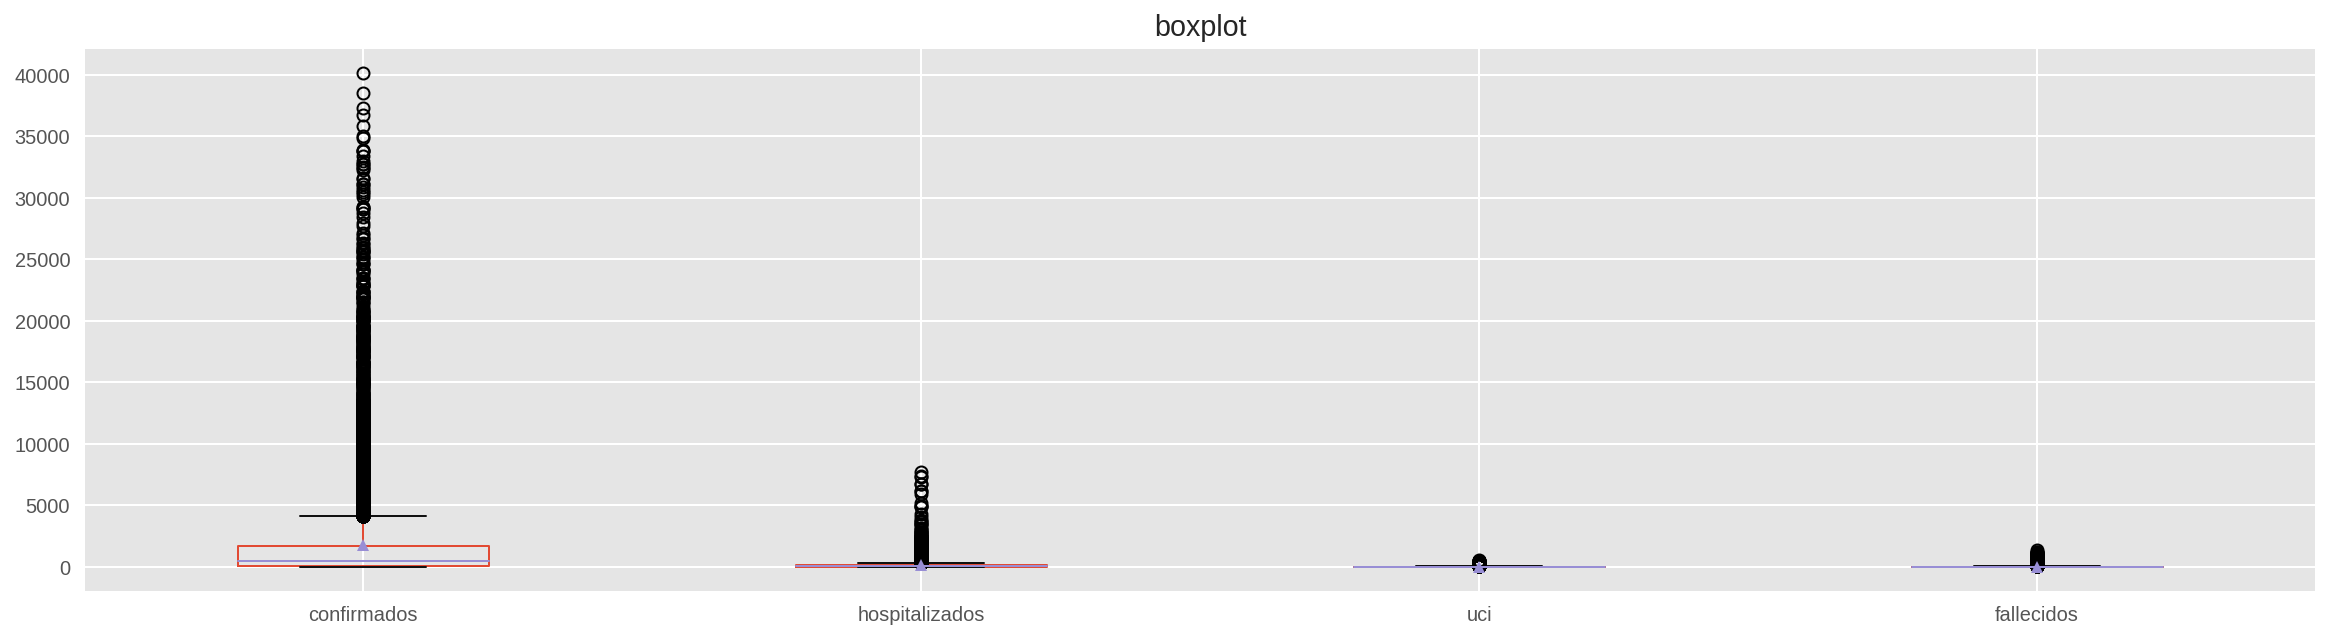

In [ ]:
# Boxplot datos Covid
ax = df_cm[['confirmados', 'hospitalizados', 'uci', 'fallecidos']].plot(kind='box', title='boxplot', showmeans=True, figsize=(20, 5))
plt.show()

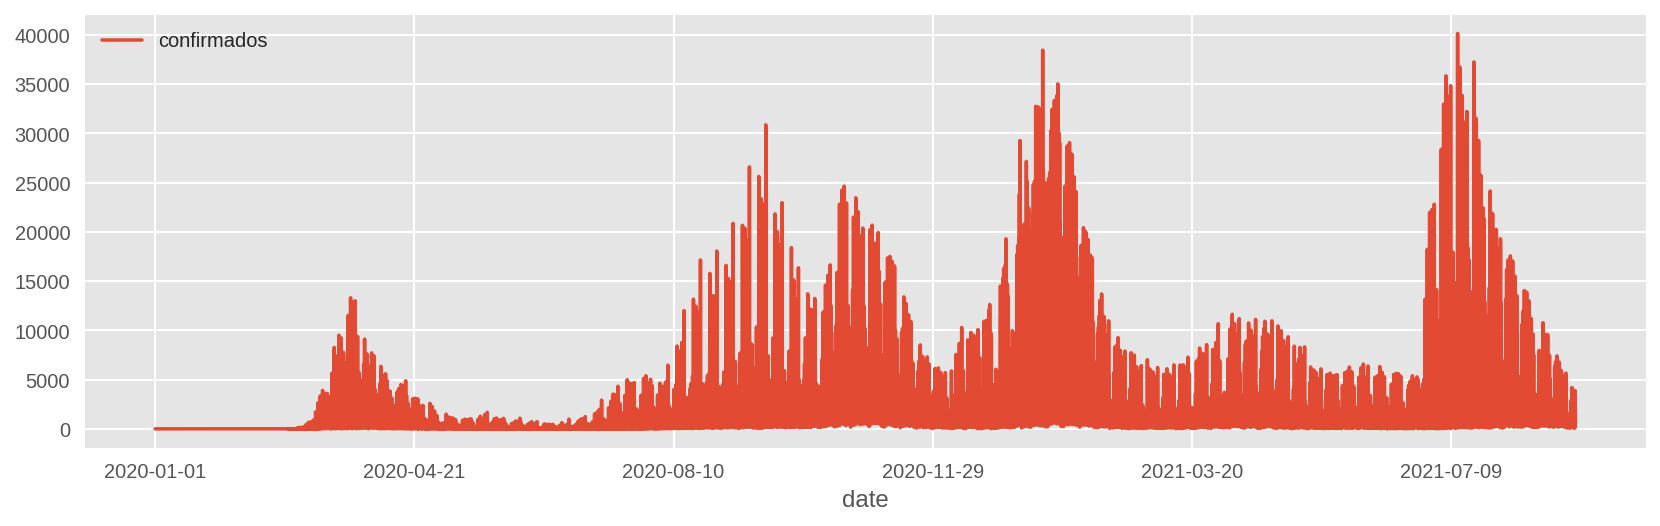

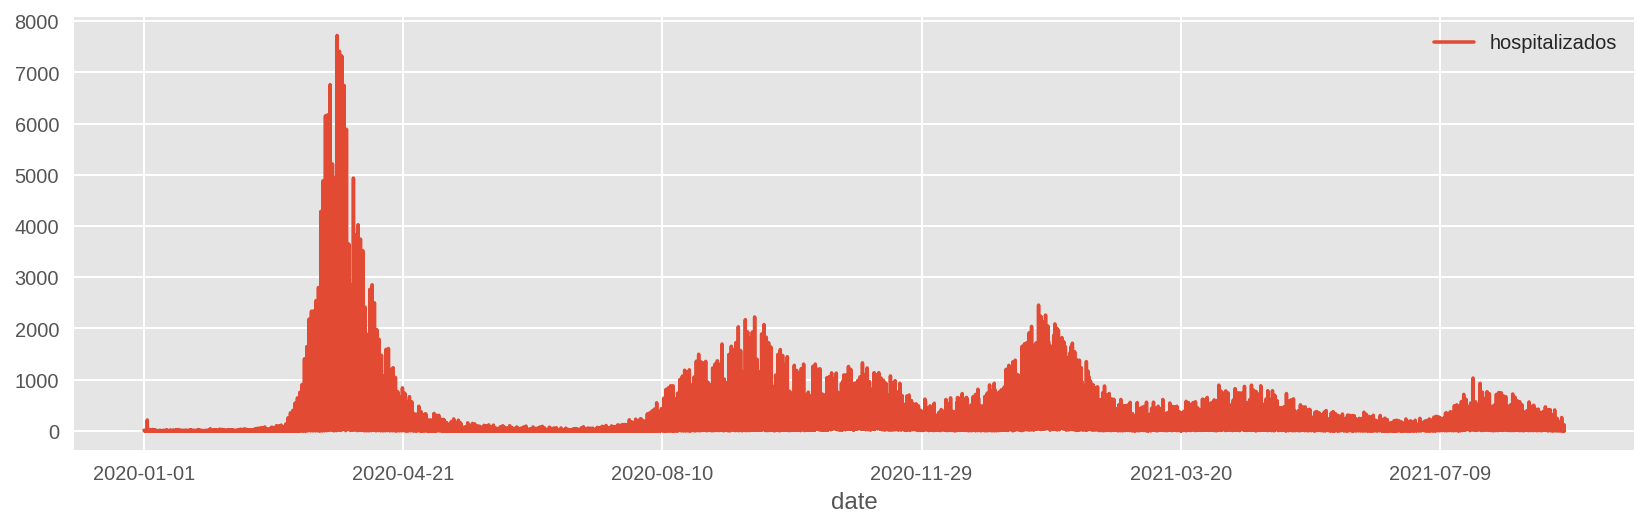

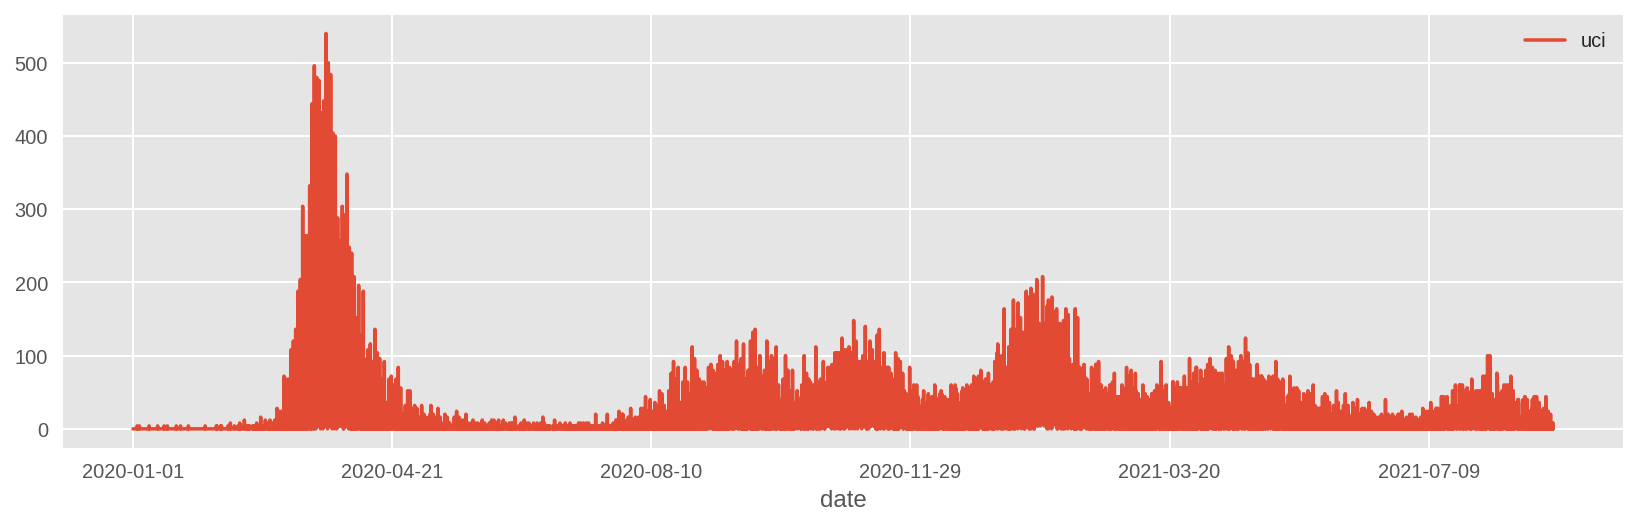

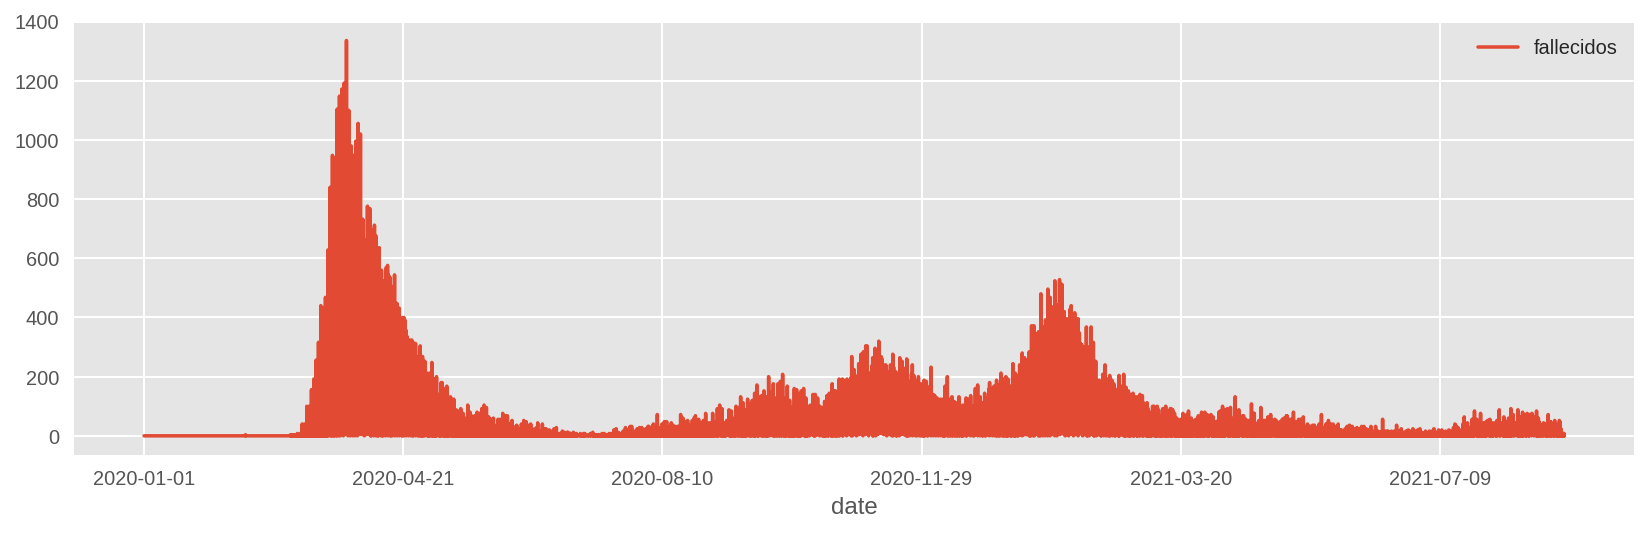

In [ ]:
df_cm.plot(x="date", y="confirmados", figsize=(14,4))
df_cm.plot(x="date", y="hospitalizados", figsize=(14,4))
df_cm.plot(x="date", y="uci", figsize=(14,4))
df_cm.plot(x="date", y="fallecidos", figsize=(14,4))

Text(0, 0.5, 'Conteo')

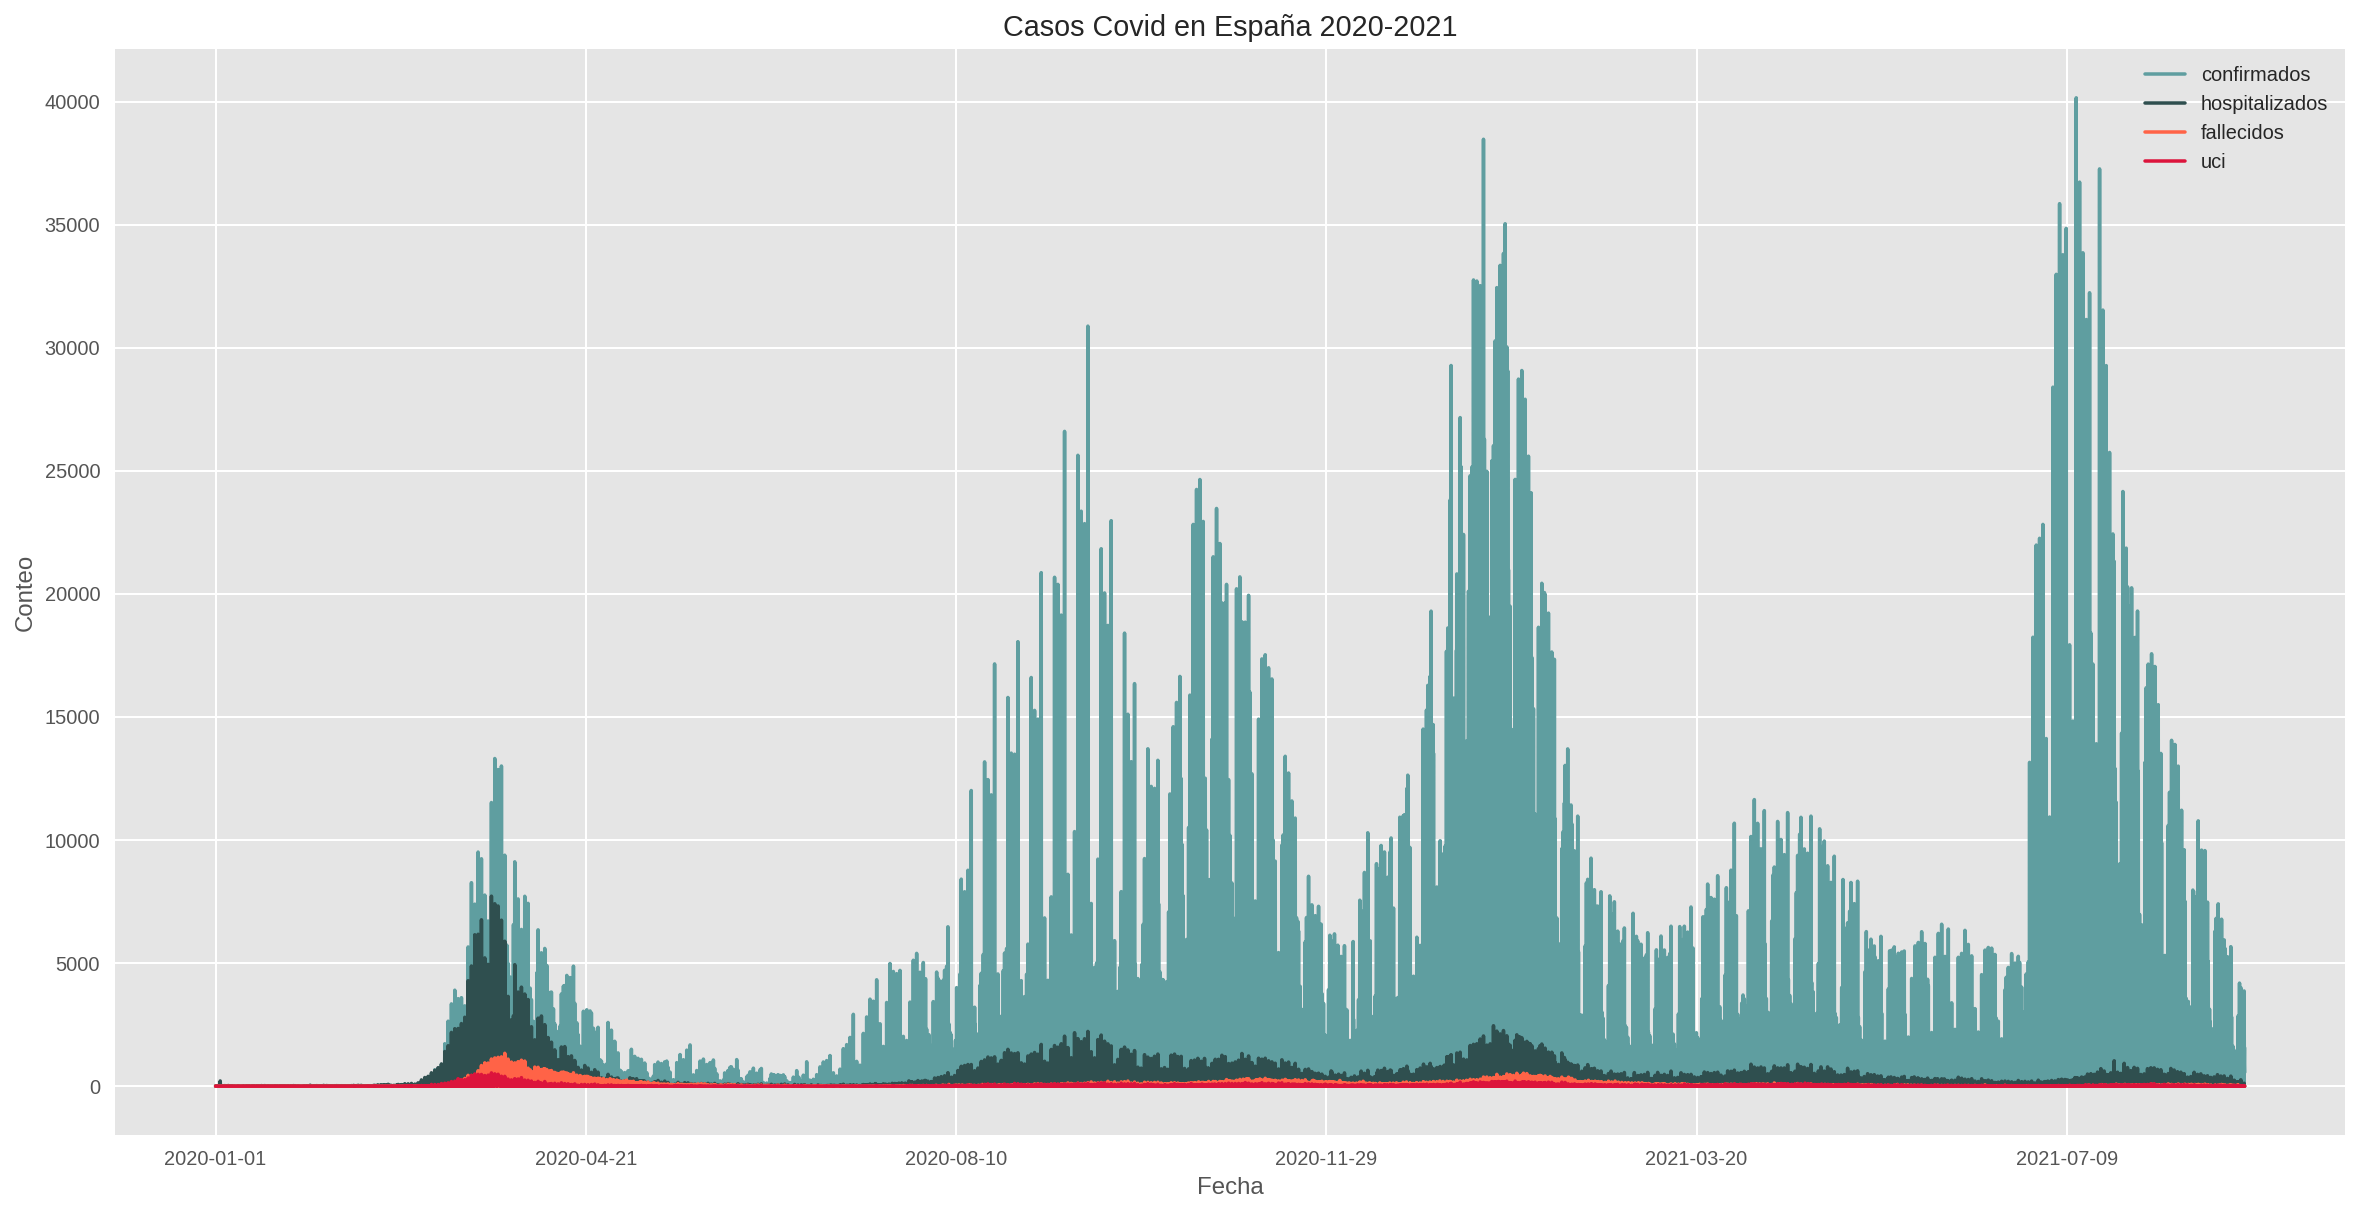

In [ ]:
style.use('ggplot')
ax = plt.gca()
df_cm.plot.line(x='date', y='confirmados', color='cadetblue', ax=ax, figsize=(20, 10))
df_cm.plot.line(x='date', y='hospitalizados', color='darkslategray', ax=ax)
df_cm.plot.line(x='date', y='fallecidos', color='tomato', ax=ax)
df_cm.plot.line(x='date', y='uci', color='crimson', ax=ax)
plt.title('Casos Covid en España 2020-2021')
plt.xlabel('Fecha')
plt.ylabel('Conteo')

In [ ]:
#px.bar(df_cm, x="date", y="confirmados", title='Confirmados').show()

# Análisis Clustering

In [ ]:
df_cm2 = df_cm.copy()
df_cm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   10962 non-null  object 
 1   iso                    10962 non-null  object 
 2   ccaa                   10962 non-null  object 
 3   retail_and_recreation  10962 non-null  float64
 4   grocery_and_pharmacy   10962 non-null  float64
 5   parks                  10962 non-null  float64
 6   transit_stations       10962 non-null  float64
 7   workplaces             10962 non-null  float64
 8   residential            10962 non-null  float64
 9   confirmados            10962 non-null  float64
 10  hospitalizados         10962 non-null  float64
 11  uci                    10962 non-null  float64
 12  fallecidos             10962 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
df_cm2.columns

Index(['date', 'iso', 'ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'confirmados',
       'hospitalizados', 'uci', 'fallecidos'],
      dtype='object')

In [ ]:
#Normalización de valores
#Fuente: https://www.kaggle.com/parasjindal96/how-to-normalize-dataframe-pandas

df_cm2_ = df_cm2[['date', 'iso', 'ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'confirmados',
       'hospitalizados', 'uci', 'fallecidos']].copy()

# Normalización de cada columna con valores 0 a 20
#for i in df_cm2_.iloc[:,4:]:
#  df_cm2_[i]=((df_cm2_[i]-df_cm2_[i].min()) / 
#              (df_cm2_[i].max()-df_cm2_[i].min()))*20 #Modificar 20 si se requiere más o menos

df_cm2_.describe()

retail_and_recreation  grocery_and_pharmacy  ...           uci    fallecidos
count           10962.000000          10962.000000  ...  10962.000000  10962.000000
mean              -27.898924             -2.921471  ...     13.850757     30.674330
std                26.353149             23.213583  ...     29.657024     75.515286
min               -97.000000            -94.000000  ...      0.000000      0.000000
25%               -38.333333            -10.000000  ...      0.000000      0.000000
50%               -24.000000              0.333333  ...      4.000000      8.000000
75%                -9.000000              8.000000  ...     16.000000     28.000000
max                63.000000            205.000000  ...    540.000000   1336.000000

[8 rows x 10 columns]

In [ ]:
#Creamos un dataframe para cada variable epidemiológica con la información de climatología 
df_confirmados = df_cm2_[['date', 'iso', 'ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'confirmados']].copy()

df_hospitalizados = df_cm2_[['date', 'iso', 'ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'hospitalizados']].copy()

df_uci = df_cm2_[['date', 'iso', 'ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'uci']].copy()

df_fallecidos = df_cm2_[['date', 'iso', 'ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'fallecidos']].copy()

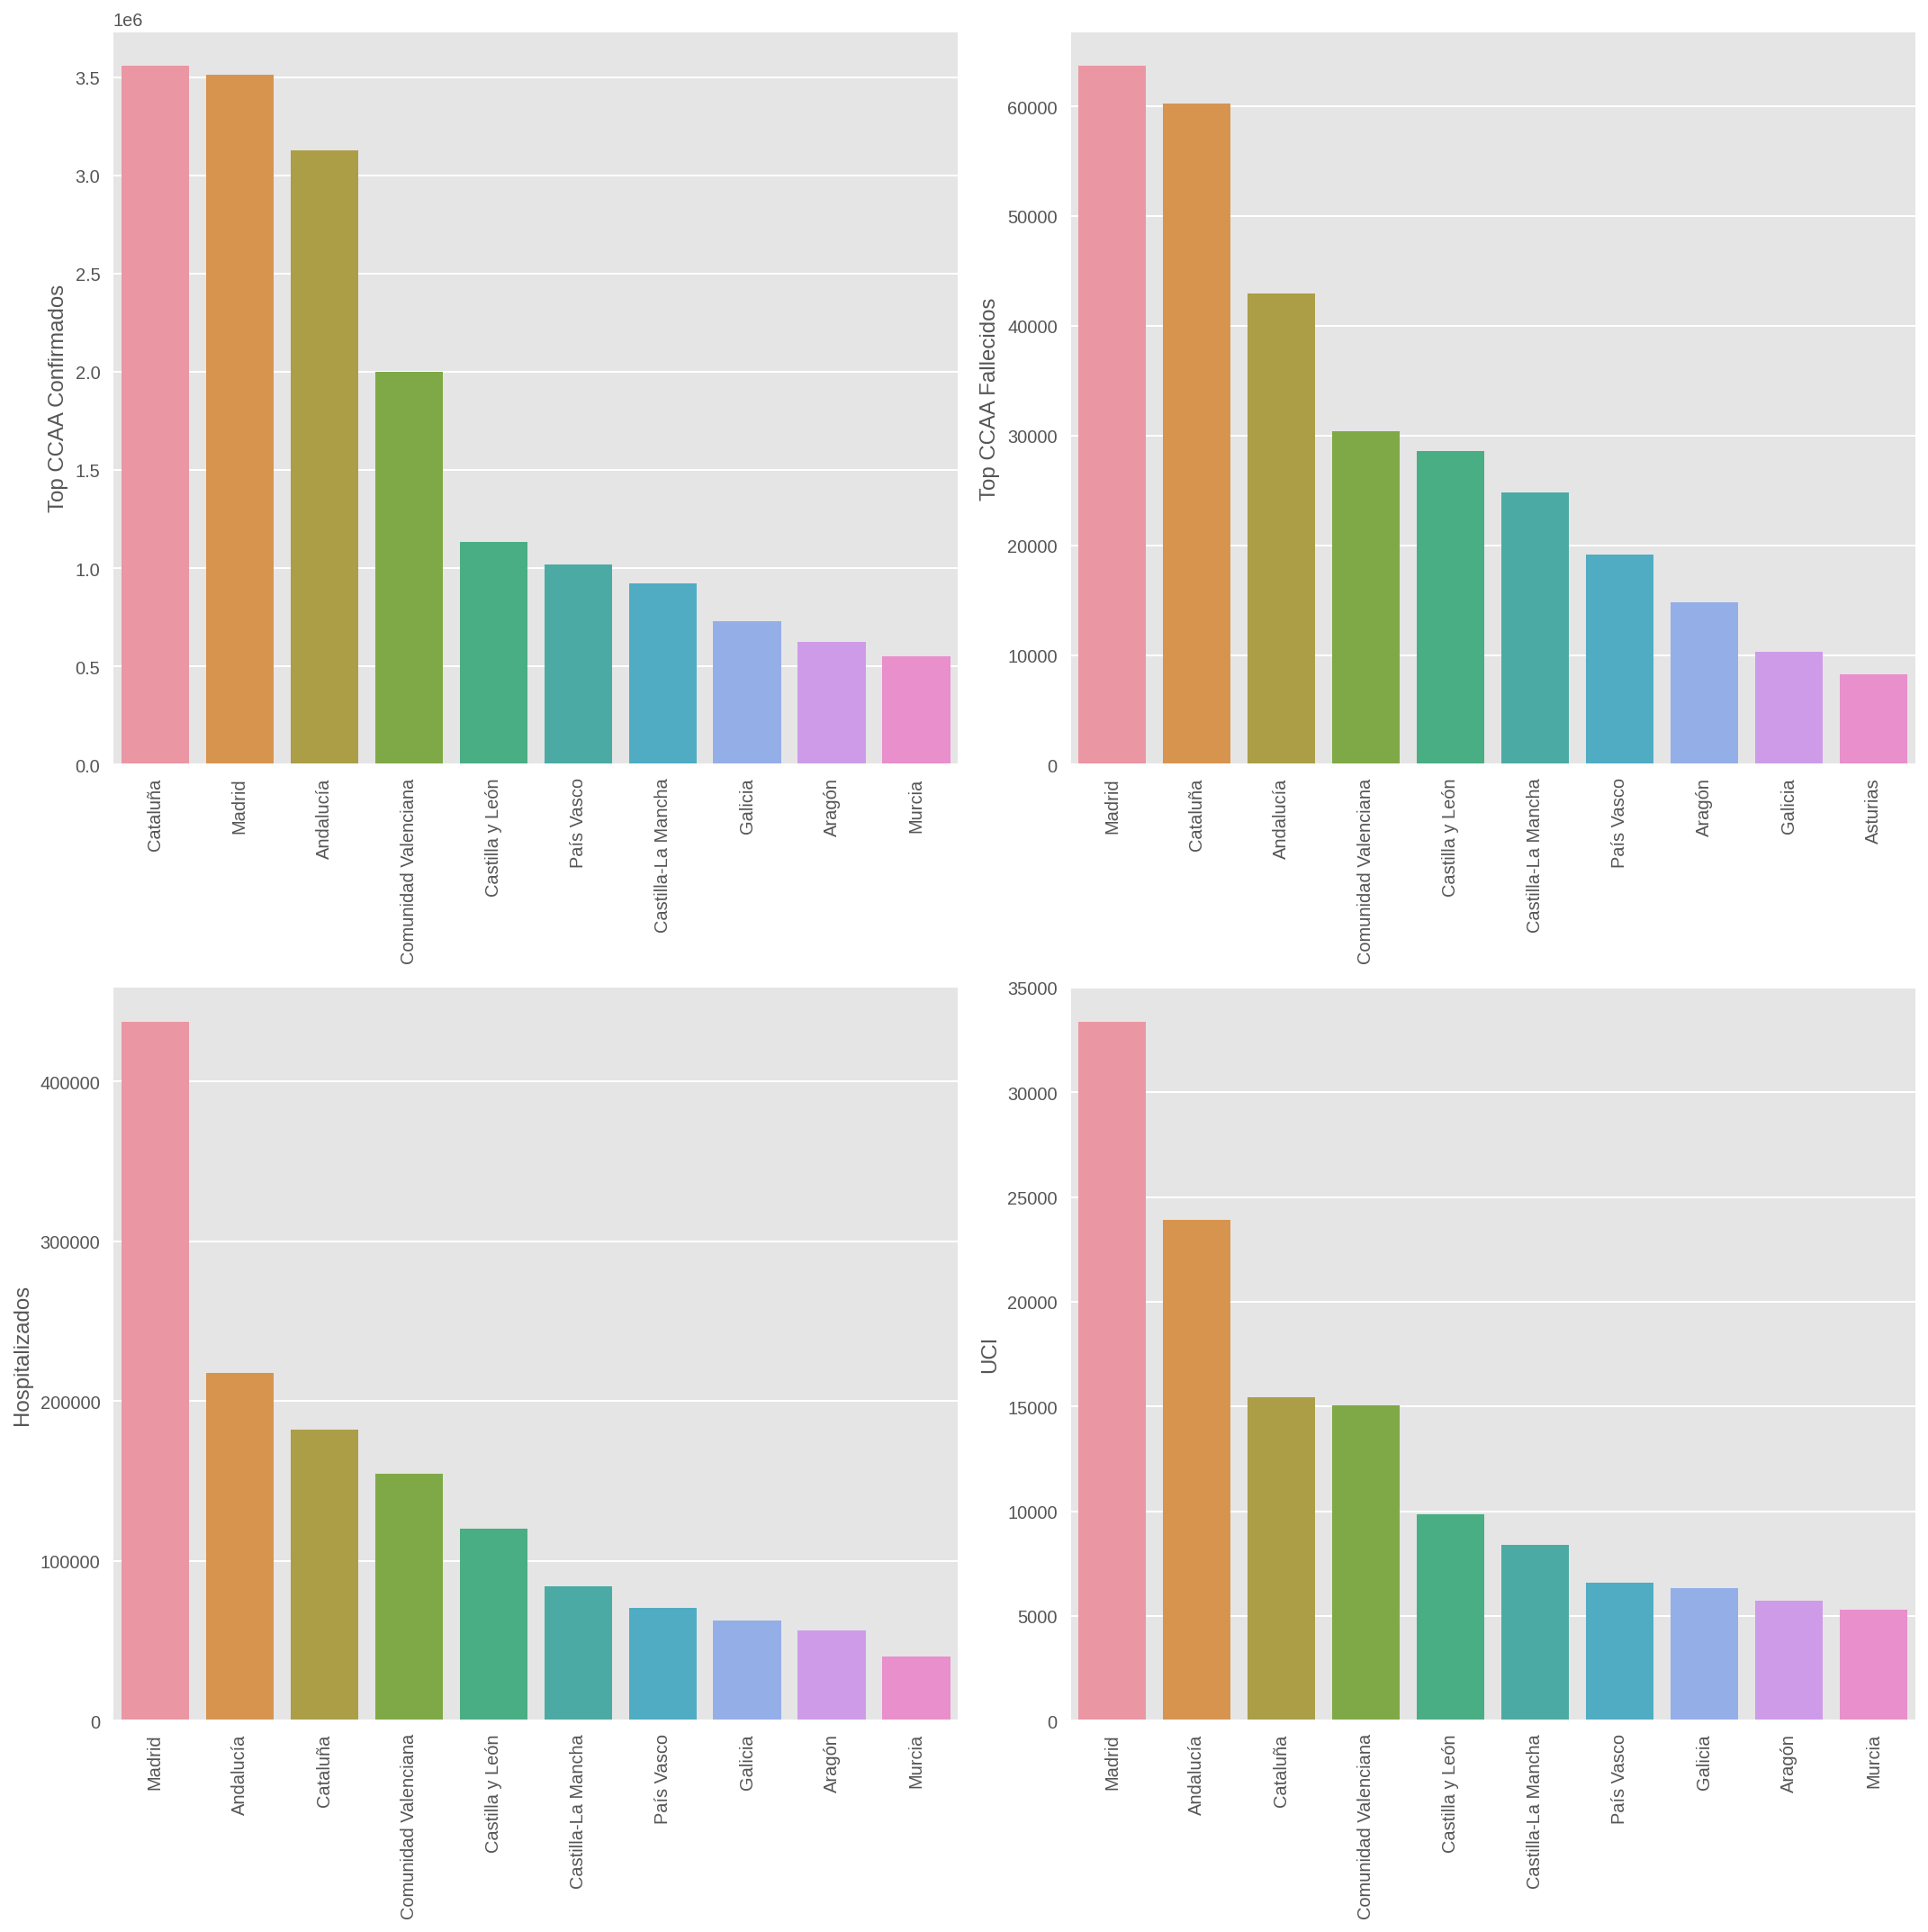

In [ ]:
fig, axs = plt.subplots(2,2,figsize = (15,15))

# densidad poblacional  -top 10 de paises

top10_confirmados = df_cm.groupby('ccaa').sum().sort_values('confirmados', ascending=False).head(10)
plt1 = sns.barplot(x=top10_confirmados.index, y='confirmados', data= top10_confirmados, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Top CCAA Confirmados')

# Pobrza extrema -top 10 de paises
top10_fallecidos = df_cm.groupby('ccaa').sum().sort_values('fallecidos', ascending=False).head(10)
plt1 = sns.barplot(x=top10_fallecidos.index, y='fallecidos', data= top10_fallecidos, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Top CCAA Fallecidos')

# Esperanza de vida: paises con la esperanza mas baja
bottom10_hospitalizados = df_cm.groupby('ccaa').sum().sort_values('hospitalizados', ascending=False).head(10)
plt1 = sns.barplot(x=bottom10_hospitalizados.index, y='hospitalizados', data= bottom10_hospitalizados, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Hospitalizados')

# Producto Interno Bruto PIB -últimos 10 paises

bottom10_uci = df_cm.groupby('ccaa').sum().sort_values('uci', ascending=False).head(10)
plt1 = sns.barplot(x=bottom10_hospitalizados.index, y='uci', data= bottom10_uci, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'UCI')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

## Análisis Confirmados

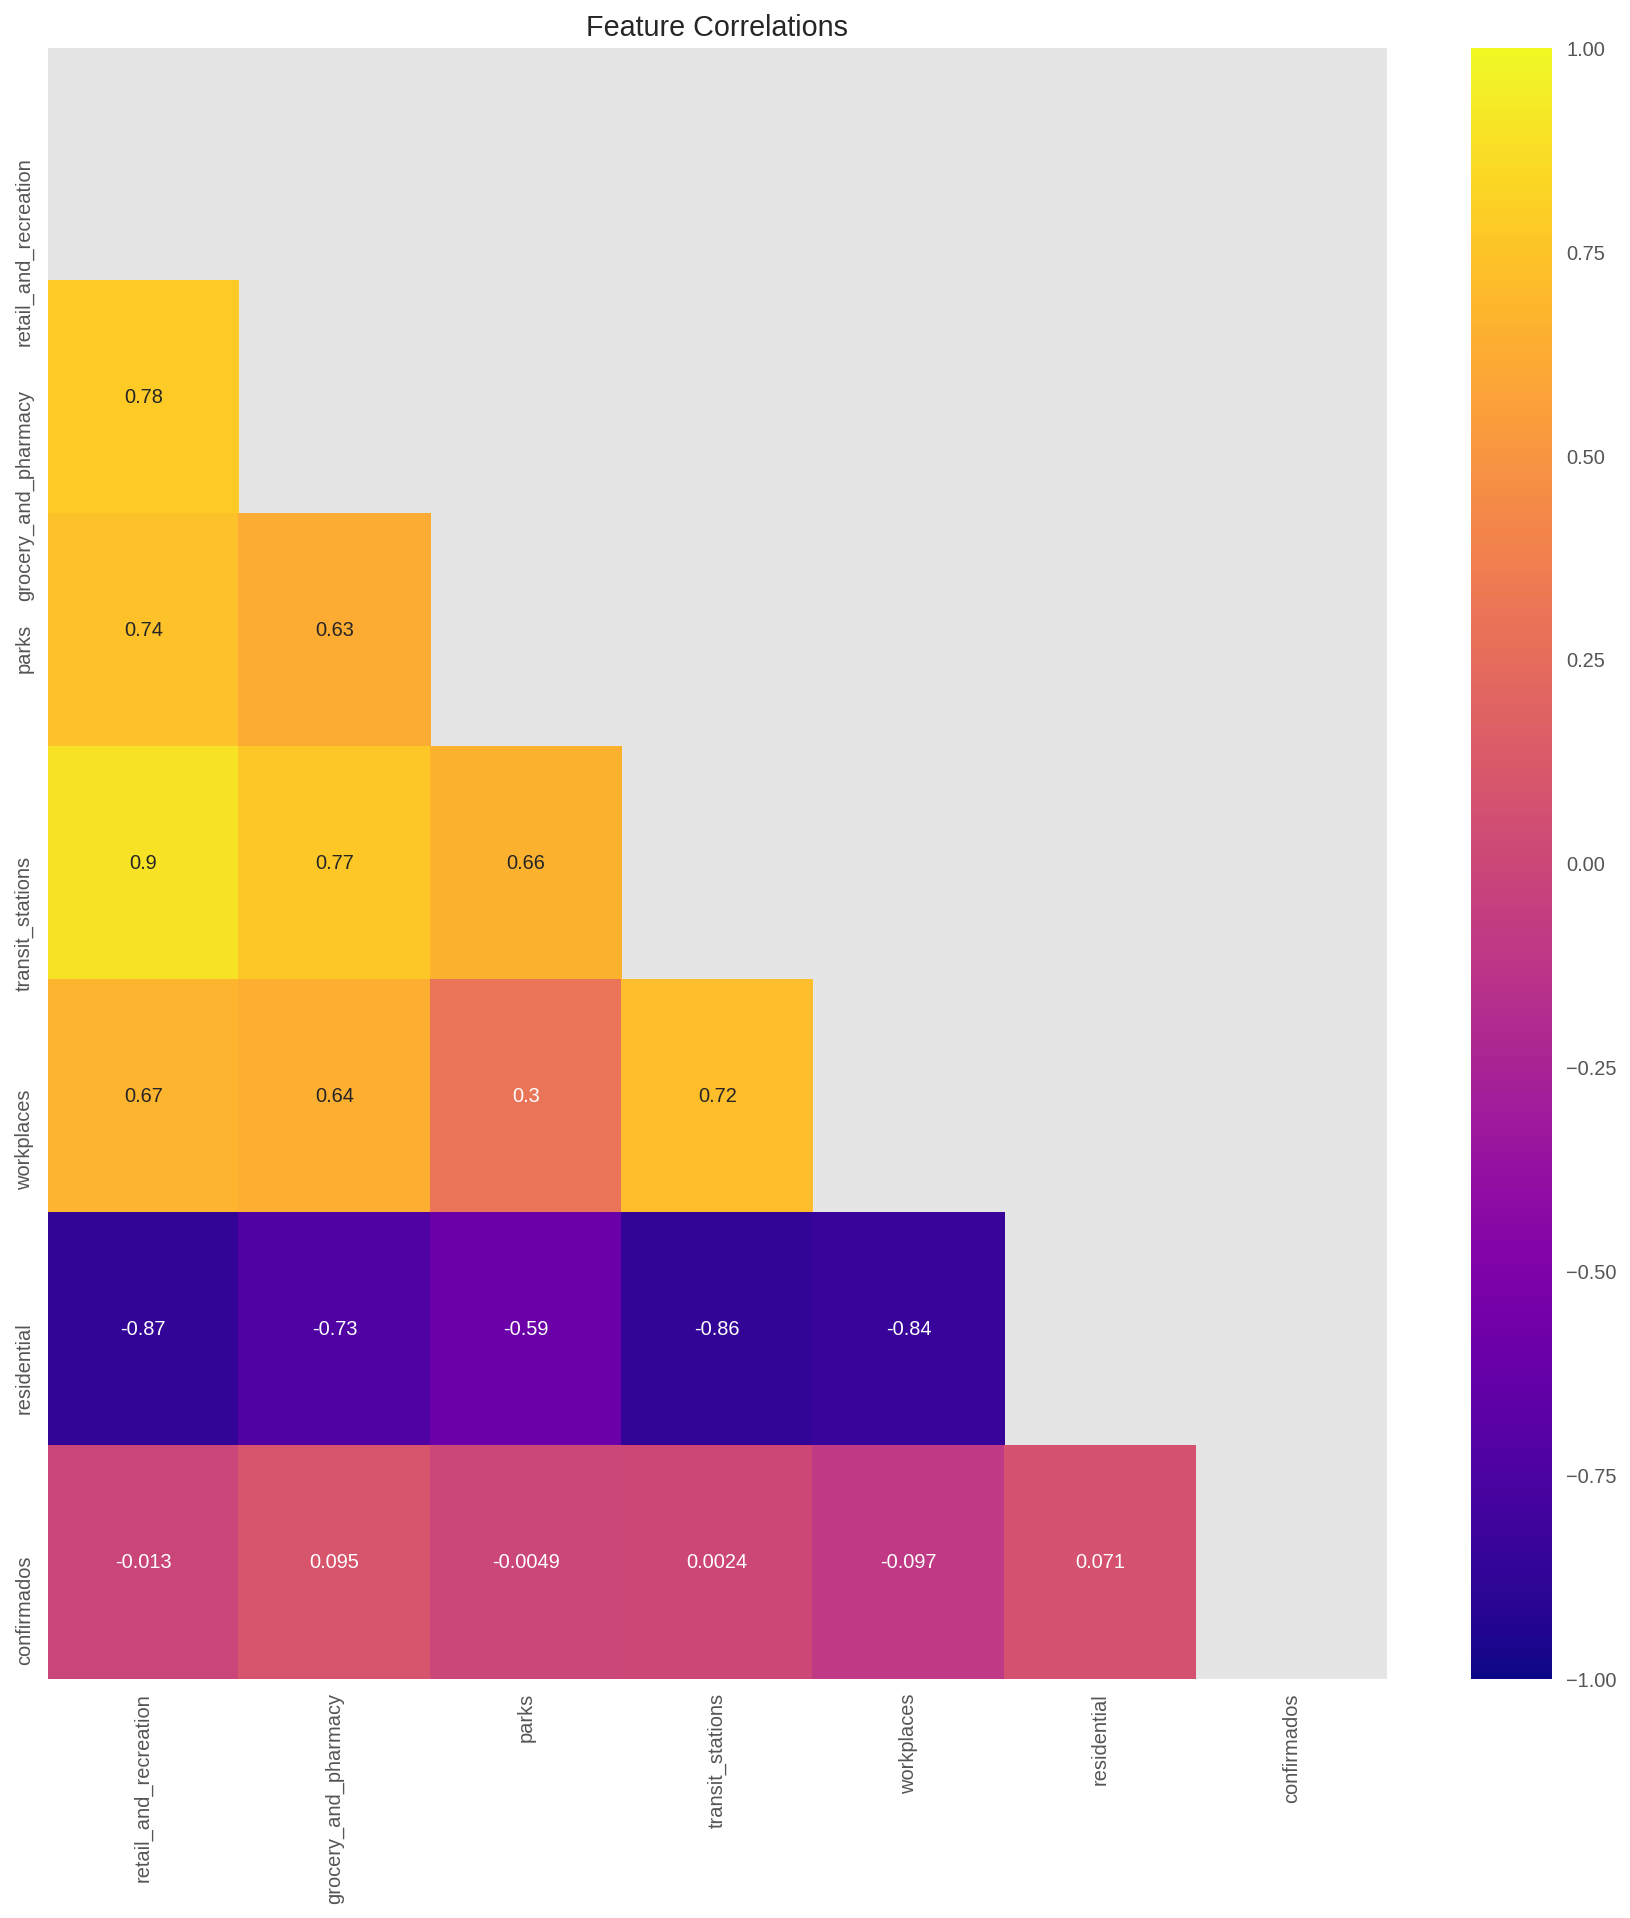

In [ ]:
# Validación correlaciones con la variable dependiente
colormap = plt.cm.plasma
matrix1 = np.triu(df_confirmados.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_confirmados.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [ ]:
#Selección de variables

df_confirmados_ = df_confirmados[['ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'confirmados']].copy()

#Se retiran los datos de Ceuta y Melilla
df_confirmados_ = df_confirmados_.drop(df_confirmados_[df_confirmados_['ccaa']=='Ceuta y Melilla'].index)
df_confirmados_.ccaa.unique()

# Normalización de cada columna con valores 0 a 20
for i in df_confirmados_.iloc[:,4:]:
  df_confirmados_[i]=((df_confirmados_[i]-df_confirmados_[i].min()) / 
              (df_confirmados_[i].max()-df_confirmados_[i].min()))*20 #Modificar 20 si se requiere más o menos

df_confirmados_.describe()

retail_and_recreation  grocery_and_pharmacy  ...   residential   confirmados
count           10353.000000          10353.000000  ...  10353.000000  10353.000000
mean              -27.913745             -2.217763  ...      5.993185      0.926816
std                26.486631             23.317523  ...      2.944028      1.851926
min               -97.000000            -94.000000  ...      0.000000      0.000000
25%               -39.000000             -8.166667  ...      3.928571      0.053790
50%               -24.000000              0.333333  ...      5.357143      0.282897
75%                -9.000000              9.000000  ...      7.023810      0.918418
max                63.000000            205.000000  ...     20.000000     20.000000

[8 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d1035510>,
      dtype=object)

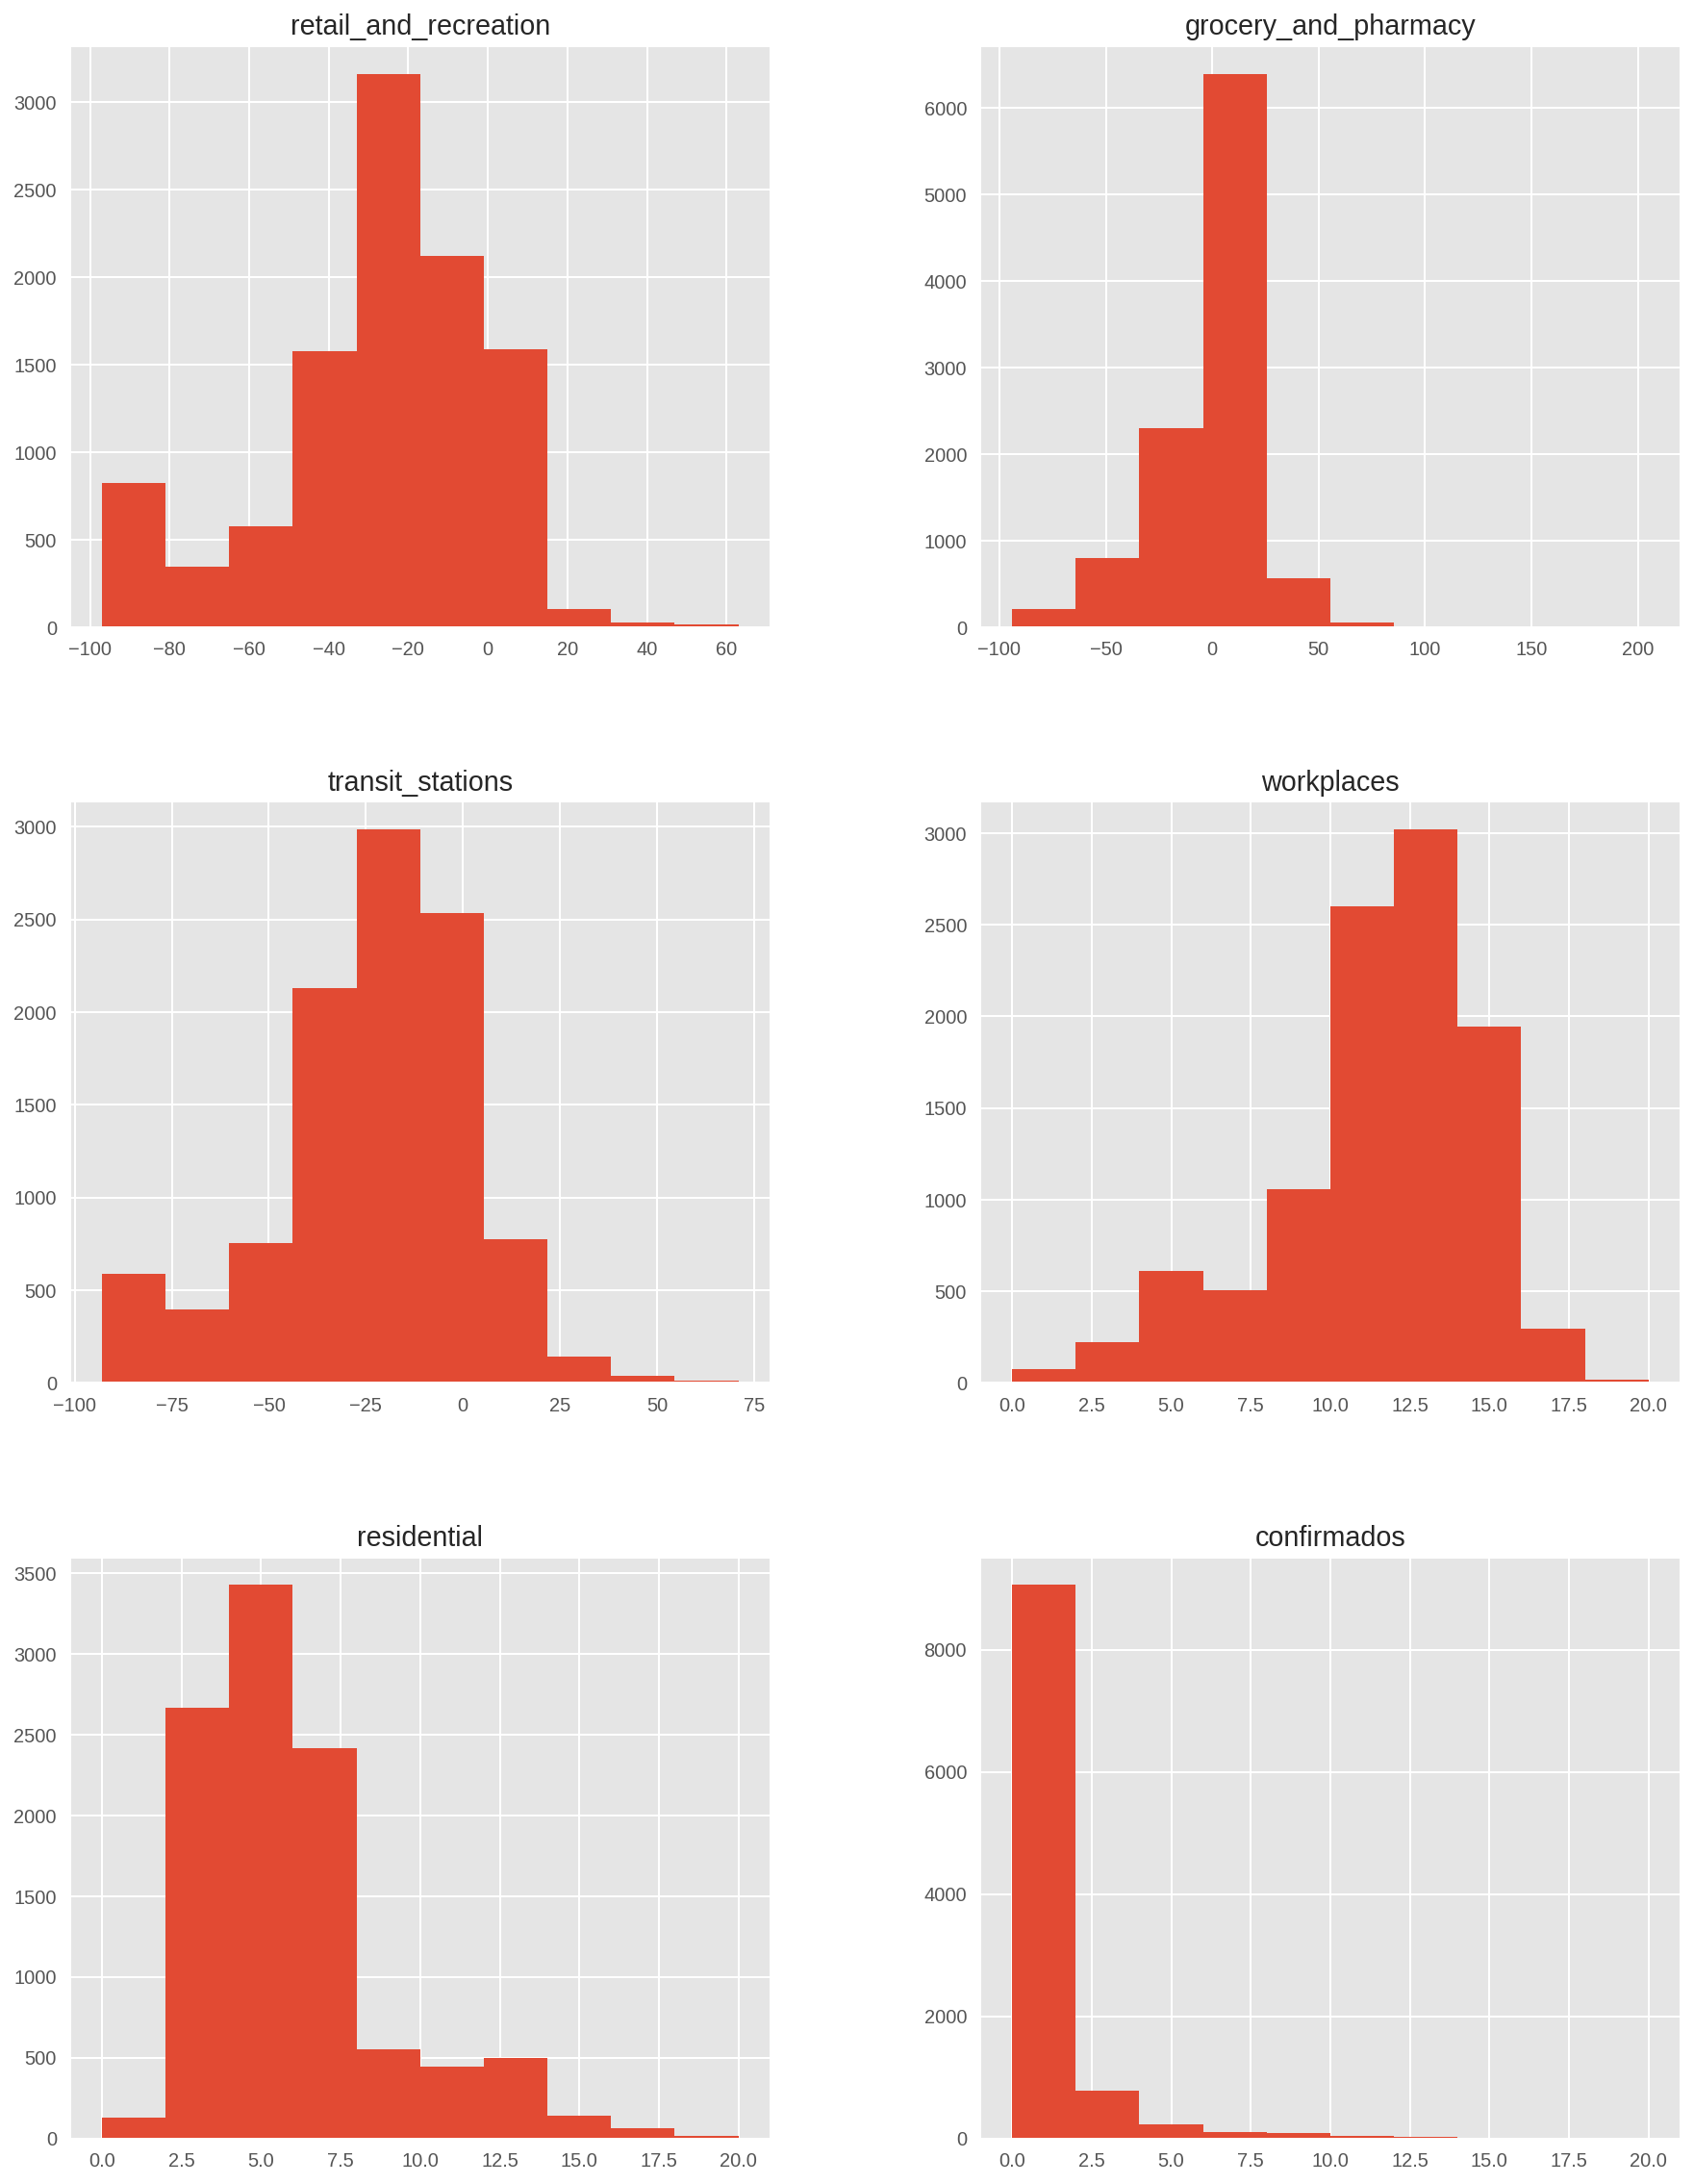

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_confirmados_.hist(ax = ax)

In [ ]:
#Se retiran los datos de Ceuta y Melilla
#df_confirmados_ = df_confirmados_.drop(df_confirmados_[df_confirmados_['ccaa']=='Ceuta y Melilla'].index)
#df_confirmados_.ccaa.unique()

In [ ]:
# Matriz de correlación

corr_var = df_confirmados_.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


In [ ]:
cols_needed1=['retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'confirmados']

In [ ]:
#data2=data2[~data2.ccaa.isin(excluded_cntry)]
if len(cols_needed1)==0:
    data2_sub1=df_confirmados_.select_dtypes(include='float')
else:
    data2_sub1=df_confirmados_[cols_needed1]
data2_sub1=pd.concat([data2_sub1,df_confirmados_[['ccaa']]],axis=1)
data2_sub1=data2_sub1.groupby('ccaa').mean().reset_index()
data2_sub1.fillna(0,inplace=True)

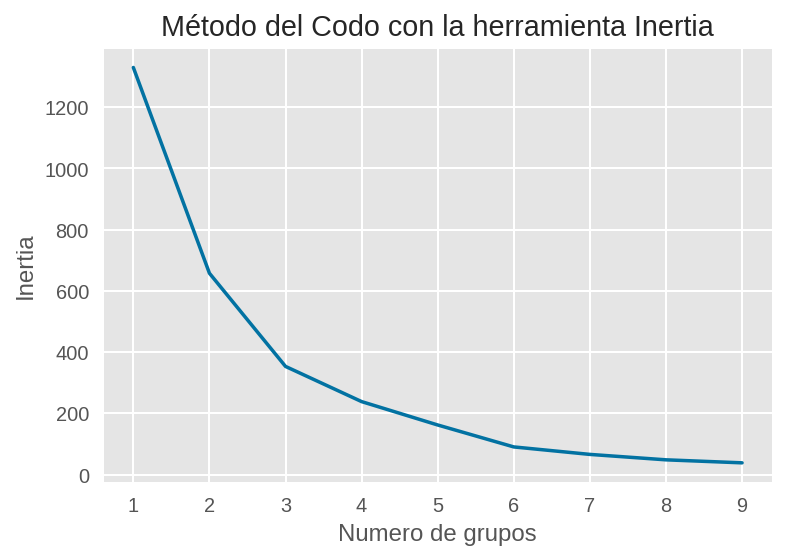

In [ ]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub1.drop(['ccaa'],axis=1)) 
    kmeanModel.fit(data2_sub1.drop(['ccaa'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [ ]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub1.drop(['ccaa'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub1.drop(['ccaa'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

retail_and_recreation  grocery_and_pharmacy  ...  residential  confirmados
cluster                                               ...                          
1                        -23.3                   2.2  ...          5.6          0.2
2                        -27.5                  -1.3  ...          5.9          0.9
3                        -35.0                 -12.7  ...          7.1          1.6

[3 rows x 6 columns]

In [ ]:
today_Sub_2a=pd.concat([data2_sub1[['ccaa']],today_sub1],axis=1)
today_Sub_2a.head(5)

ccaa  retail_and_recreation  ...  confirmados  cluster
0  Andalucía             -25.160920  ...     2.556882        2
1     Aragón             -26.168582  ...     0.510855        2
2   Asturias             -28.316913  ...     0.230104        2
3   Canarias             -34.403394  ...     0.296803        3
4  Cantabria             -18.422003  ...     0.146355        1

[5 rows x 8 columns]

In [ ]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['ccaa'].values))

****Comunidades autónomas en el grupo 1*****
['Cantabria', 'Extremadura']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Comunidades autónomas en el grupo 3*****
['Canarias', 'Madrid']
****Comunidades autónomas en el grupo 4*****
[]


In [ ]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','ccaa'], values='confirmados')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()


In [ ]:
# creando los grupos
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(data2_sub1.drop(['ccaa'],axis=1))

In [ ]:
heirarchy1=data2_sub1.copy()
heirarchy1['cluster'] = y_hc

In [ ]:
# Aca se anota el número de clústers si se desea poner de forma manual 
for i in range(4):
    print('****Nombre de las comunidades autónomas en cluster {}*****'.format(str(i)))
    print(list(heirarchy1[heirarchy1.cluster==i]['ccaa'].values))

****Nombre de las comunidades autónomas en cluster 0*****
['Cantabria', 'Extremadura']
****Nombre de las comunidades autónomas en cluster 1*****
['Canarias', 'Madrid']
****Nombre de las comunidades autónomas en cluster 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Nombre de las comunidades autónomas en cluster 3*****
[]


In [ ]:
# grafico de los grupos de países
fig = px.treemap(heirarchy1, path=['cluster','ccaa'], values='confirmados')
fig.update_layout(autosize=False,width=800,height=700)
fig.show()

## Análisis Hospitalizados

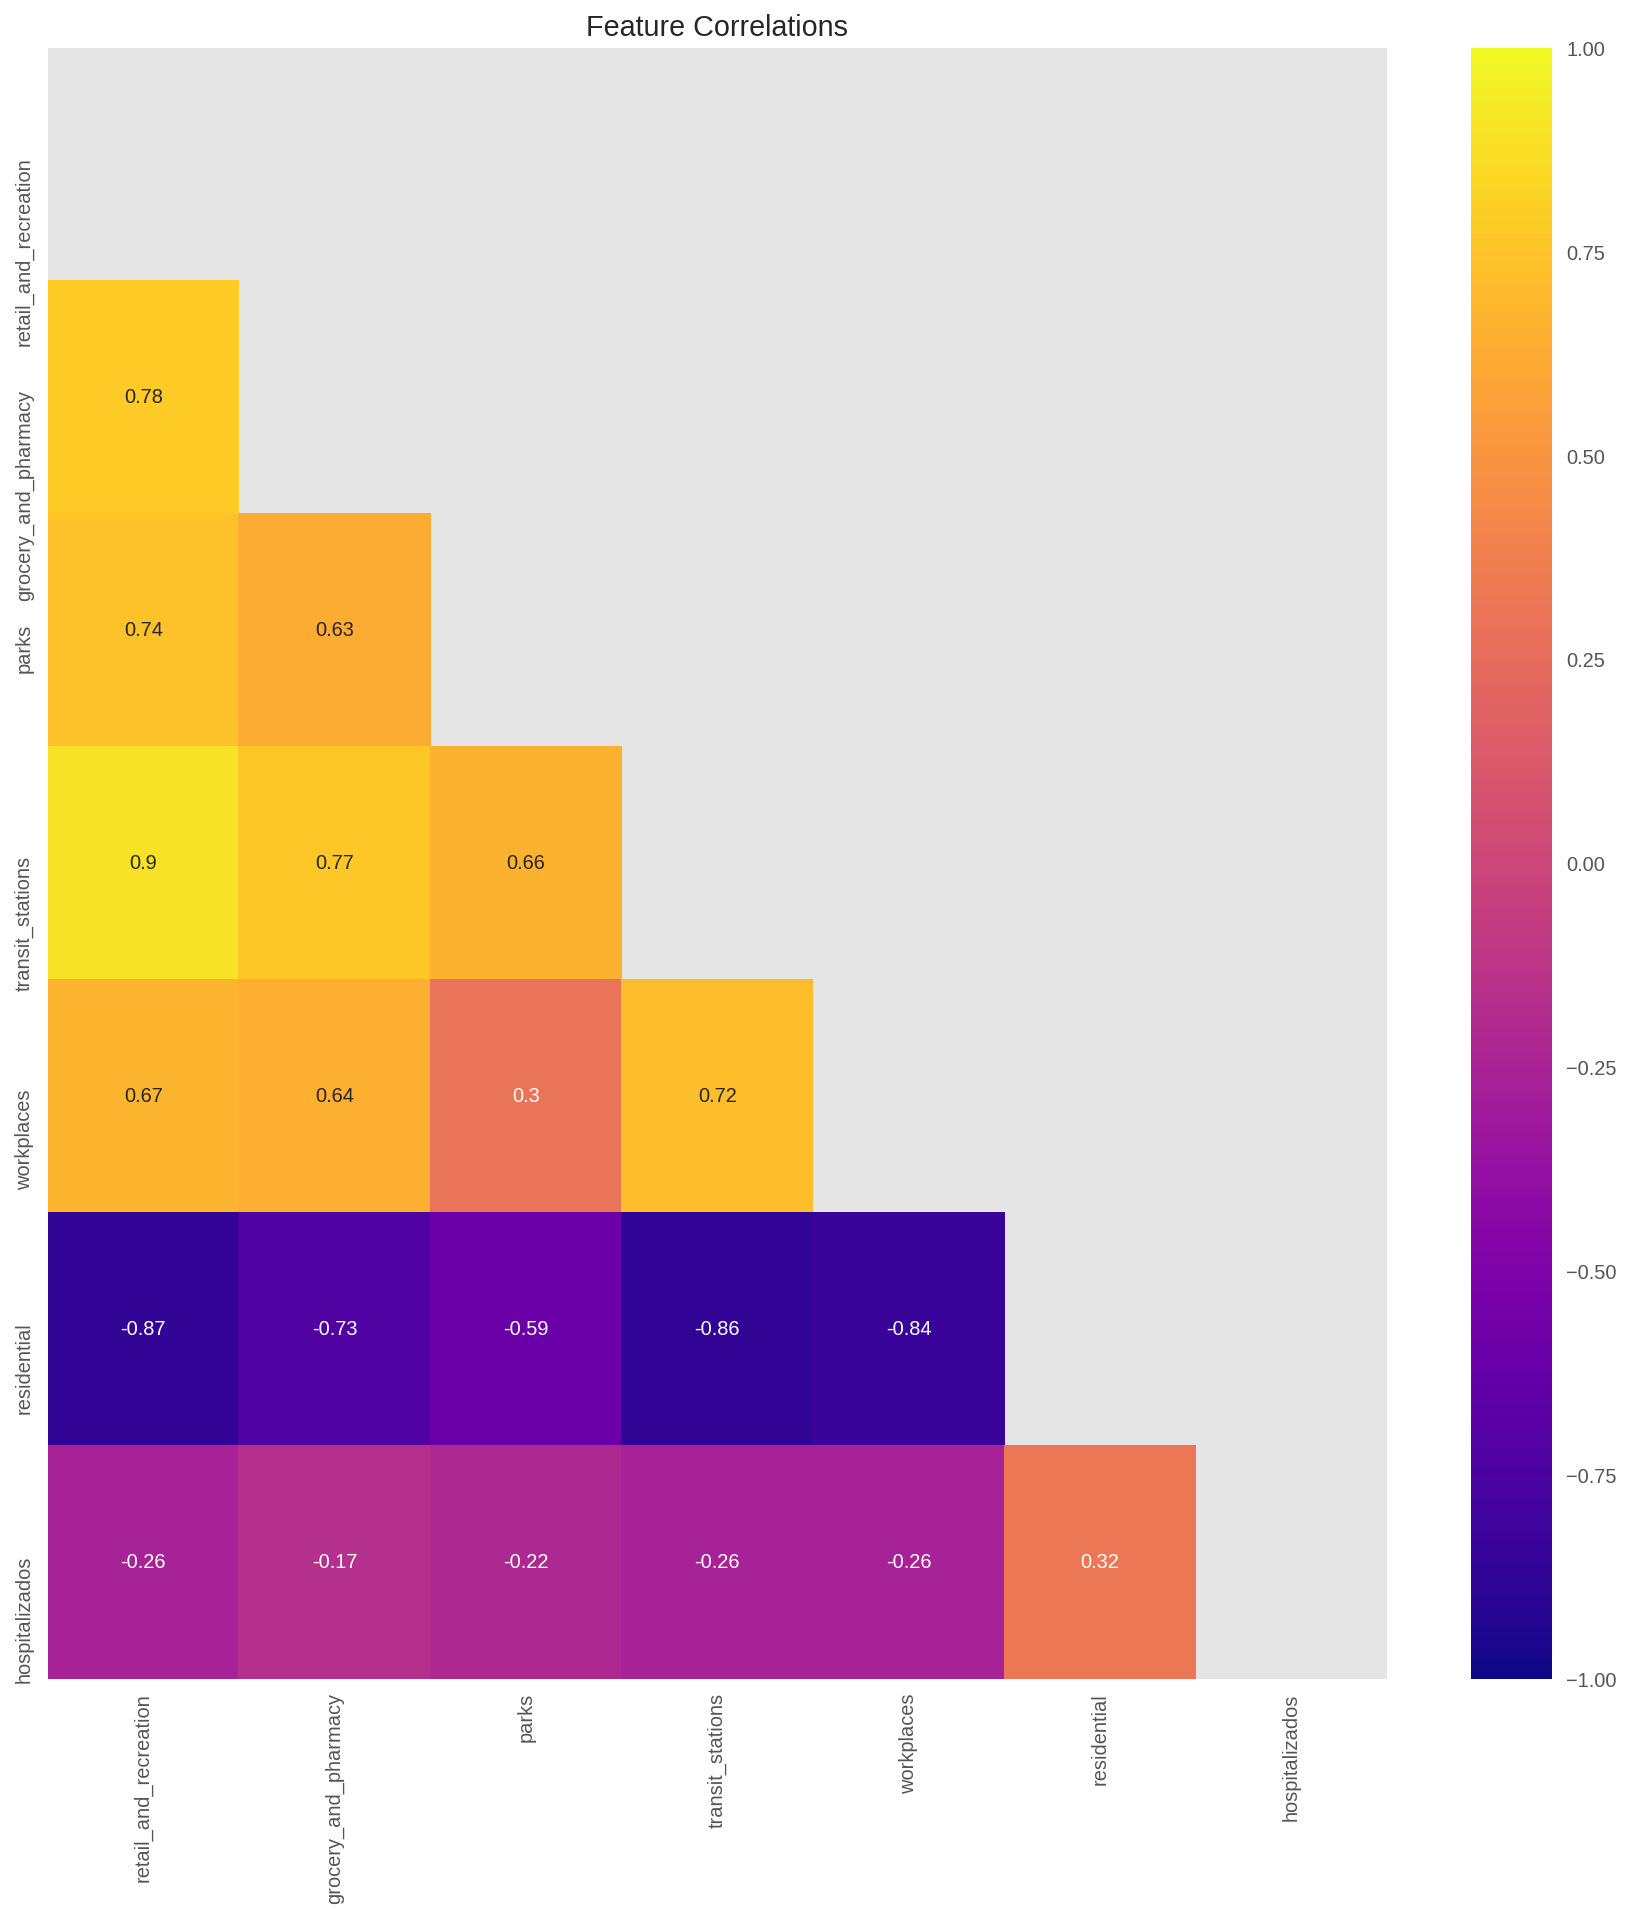

In [ ]:
# Validación correlaciones con la variable dependiente
colormap = plt.cm.plasma
matrix1 = np.triu(df_hospitalizados.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_hospitalizados.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [ ]:
#Selección de variables

df_hospitalizados_ = df_hospitalizados[['ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'hospitalizados']].copy()

#Se retiran los datos de Ceuta y Melilla
df_hospitalizados_ = df_hospitalizados_.drop(df_hospitalizados_[df_hospitalizados_['ccaa']=='Ceuta y Melilla'].index)
df_hospitalizados_.ccaa.unique()

# Normalización de cada columna con valores 0 a 20
for i in df_hospitalizados_.iloc[:,4:]:
  df_hospitalizados_[i]=((df_hospitalizados_[i]-df_hospitalizados_[i].min()) / 
              (df_hospitalizados_[i].max()-df_hospitalizados_[i].min()))*20 #Modificar 20 si se requiere más o menos

df_hospitalizados_.describe()

retail_and_recreation  ...  hospitalizados
count           10353.000000  ...    10353.000000
mean              -27.913745  ...        0.399876
std                26.486631  ...        0.935362
min               -97.000000  ...        0.000000
25%               -39.000000  ...        0.031088
50%               -24.000000  ...        0.134715
75%                -9.000000  ...        0.383420
max                63.000000  ...       20.000000

[8 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d1caa7d0>,
      dtype=object)

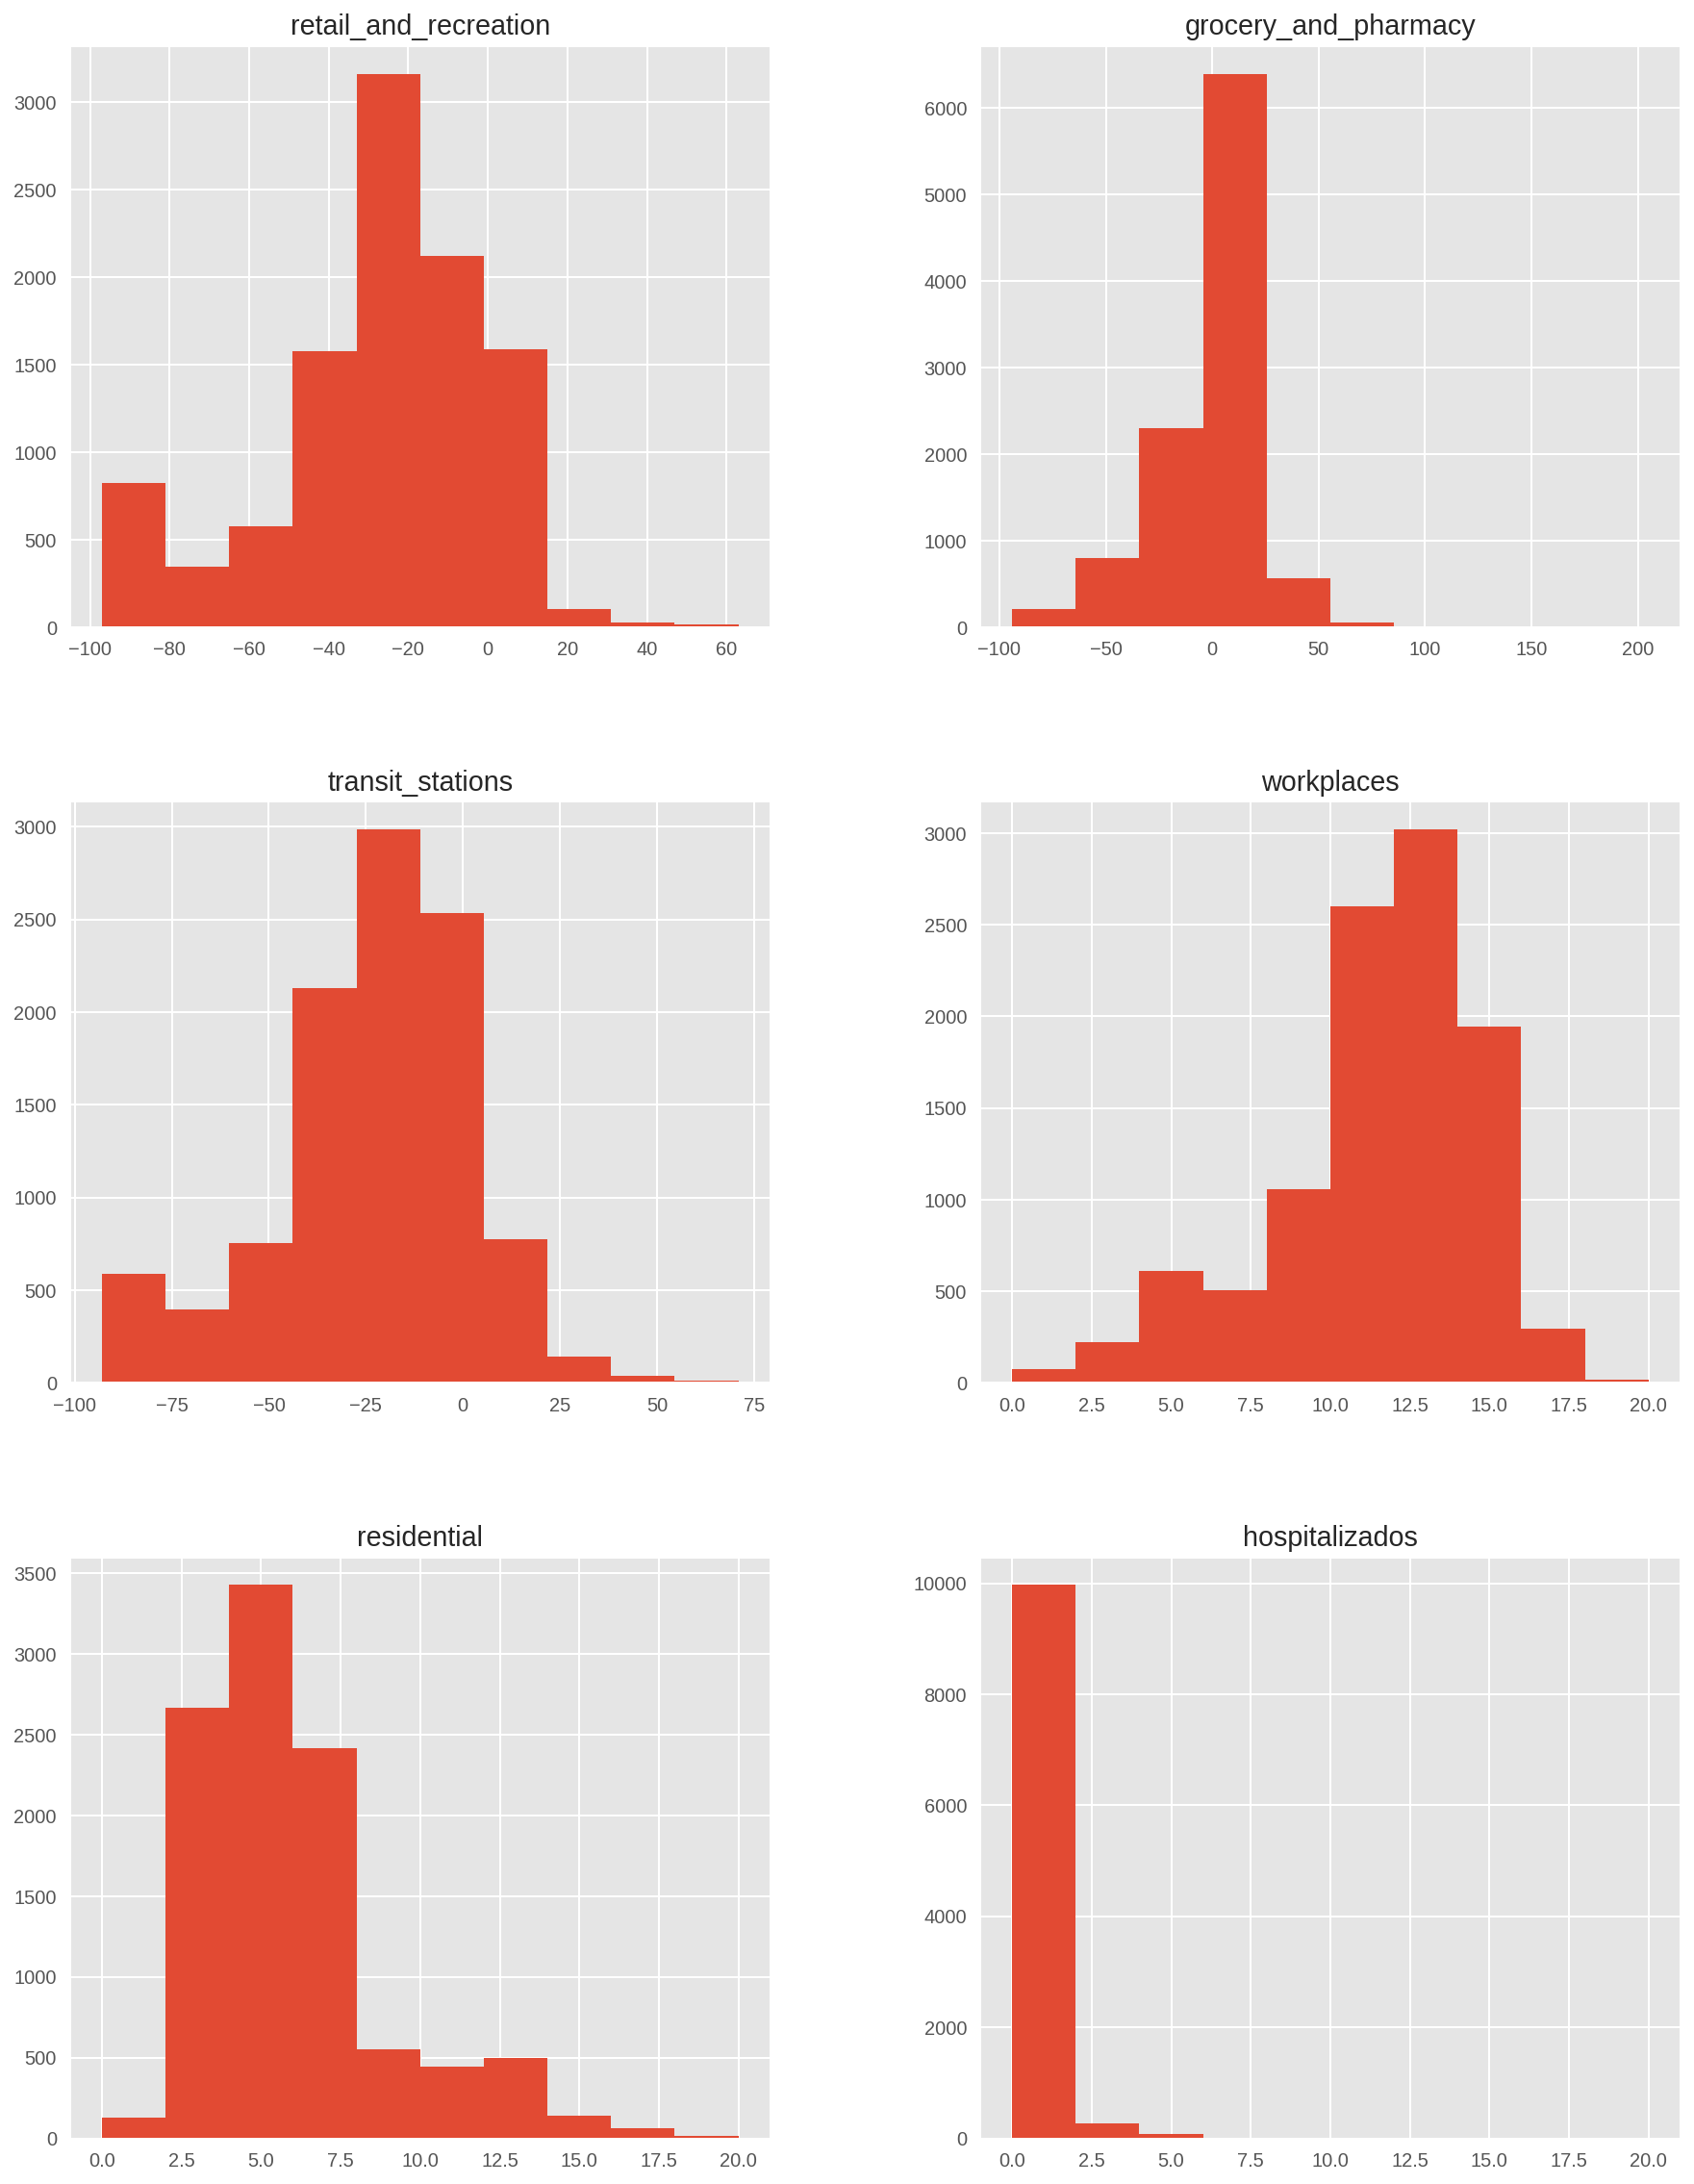

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_hospitalizados_.hist(ax = ax)

In [ ]:
# Matriz de correlación

corr_var = df_hospitalizados_.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


In [ ]:

cols_needed2=['retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'hospitalizados']

In [ ]:

#data2=data2[~data2.ccaa.isin(excluded_cntry)]
if len(cols_needed2)==0:
    data2_sub2=df_hospitalizados_.select_dtypes(include='float')
else:
    data2_sub2=df_hospitalizados_[cols_needed2]
data2_sub2=pd.concat([data2_sub2,df_hospitalizados_[['ccaa']]],axis=1)
data2_sub2=data2_sub2.groupby('ccaa').mean().reset_index()
data2_sub2.fillna(0,inplace=True)

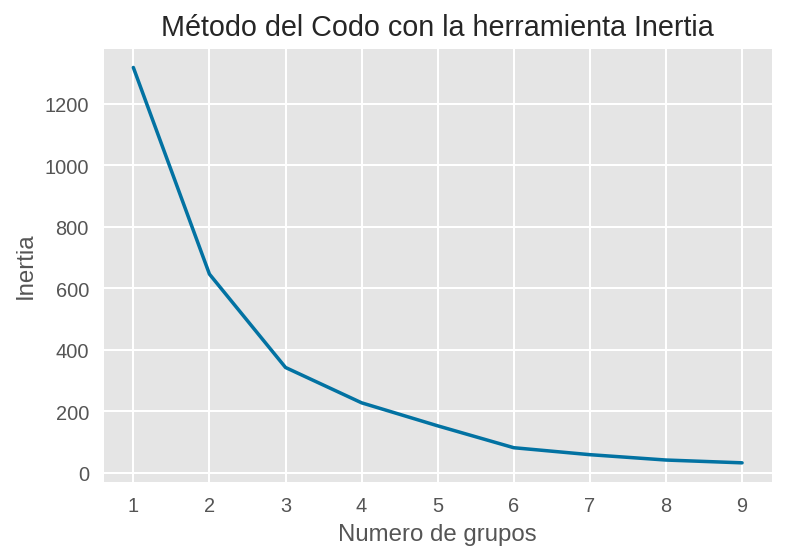

In [ ]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub2.drop(['ccaa'],axis=1)) 
    kmeanModel.fit(data2_sub2.drop(['ccaa'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [ ]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub2.drop(['ccaa'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub2=data2_sub2.drop(['ccaa'],axis=1)
# Adding cluster to the Dataset
today_sub2['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub2.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

retail_and_recreation  ...  hospitalizados
cluster                         ...                
1                        -23.3  ...             0.1
2                        -27.5  ...             0.4
3                        -35.0  ...             1.0

[3 rows x 6 columns]

In [ ]:
today_Sub_2b=pd.concat([data2_sub2[['ccaa']],today_sub2],axis=1)
today_Sub_2b.head(5)

ccaa  retail_and_recreation  ...  hospitalizados  cluster
0  Andalucía             -25.160920  ...        0.925258        2
1     Aragón             -26.168582  ...        0.240962        2
2   Asturias             -28.316913  ...        0.158656        2
3   Canarias             -34.403394  ...        0.119537        3
4  Cantabria             -18.422003  ...        0.068625        1

[5 rows x 8 columns]

In [ ]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2b[today_Sub_2b.cluster==i]['ccaa'].values))

****Comunidades autónomas en el grupo 1*****
['Cantabria', 'Extremadura']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Comunidades autónomas en el grupo 3*****
['Canarias', 'Madrid']
****Comunidades autónomas en el grupo 4*****
[]


In [ ]:
#import plotly.express as px
fig = px.treemap(today_Sub_2b, path=['cluster','ccaa'], values='hospitalizados')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [ ]:
# creando los grupos
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(data2_sub2.drop(['ccaa'],axis=1))

In [ ]:
heirarchy2=data2_sub2.copy()
heirarchy2['cluster'] = y_hc

In [ ]:
# Aca se anota el número de clústers si se desea poner de forma manual 
for i in range(4):
    print('****Nombre de las comunidades autónomas en cluster {}*****'.format(str(i)))
    print(list(heirarchy2[heirarchy2.cluster==i]['ccaa'].values))

****Nombre de las comunidades autónomas en cluster 0*****
['Cantabria', 'Extremadura']
****Nombre de las comunidades autónomas en cluster 1*****
['Canarias', 'Madrid']
****Nombre de las comunidades autónomas en cluster 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Nombre de las comunidades autónomas en cluster 3*****
[]


In [ ]:
# grafico de los grupos de países
fig = px.treemap(heirarchy2, path=['cluster','ccaa'], values='hospitalizados')
fig.update_layout(autosize=False,width=800,height=700)
fig.show()

## Análisis UCI

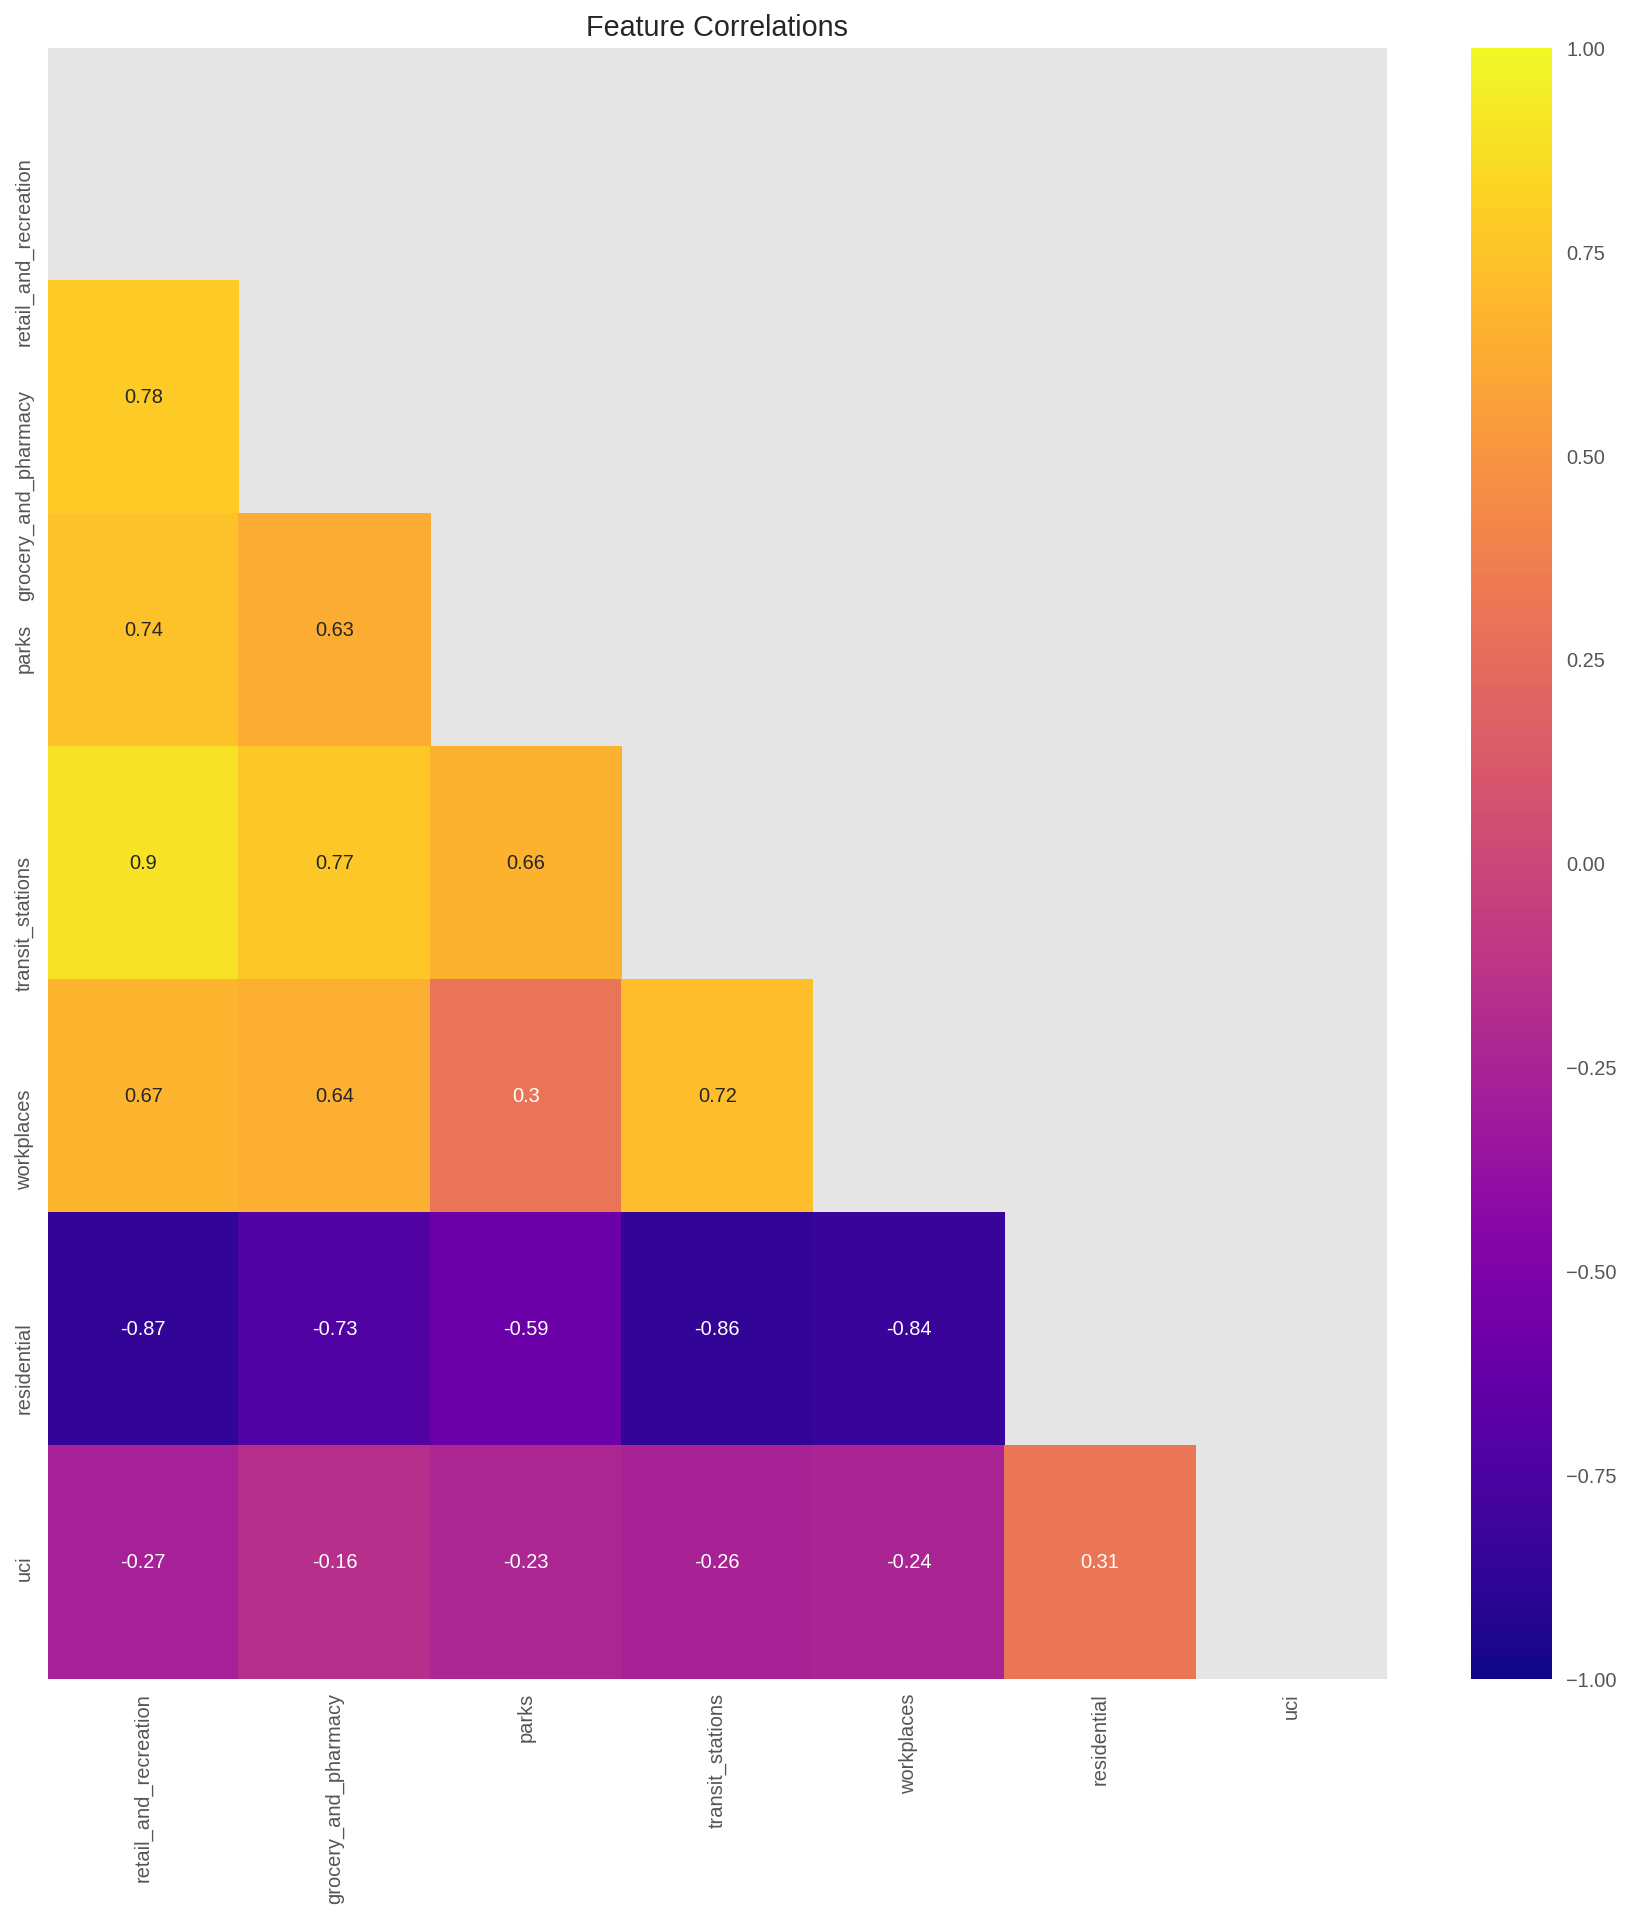

In [ ]:
# Validación correlaciones con la variable dependiente
colormap = plt.cm.plasma
matrix1 = np.triu(df_uci.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_uci.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [ ]:
#Selección de variables

df_uci_ = df_uci[['ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
        'transit_stations', 'workplaces', 'residential', 'uci']].copy()

#Se retiran los datos de Ceuta y Melilla
df_uci_ = df_uci_.drop(df_uci_[df_uci_['ccaa']=='Ceuta y Melilla'].index)
df_uci_.ccaa.unique()

# Normalización de cada columna con valores 0 a 20
for i in df_uci_.iloc[:,4:]:
  df_uci_[i]=((df_uci_[i]-df_uci_[i].min()) / 
              (df_uci_[i].max()-df_uci_[i].min()))*20 #Modificar 20 si se requiere más o menos

df_uci_.describe()

retail_and_recreation  grocery_and_pharmacy  ...   residential           uci
count           10353.000000          10353.000000  ...  10353.000000  10353.000000
mean              -27.913745             -2.217763  ...      5.993185      0.540491
std                26.486631             23.317523  ...      2.944028      1.123955
min               -97.000000            -94.000000  ...      0.000000      0.000000
25%               -39.000000             -8.166667  ...      3.928571      0.000000
50%               -24.000000              0.333333  ...      5.357143      0.148148
75%                -9.000000              9.000000  ...      7.023810      0.592593
max                63.000000            205.000000  ...     20.000000     20.000000

[8 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d1e2ea50>,
      dtype=object)

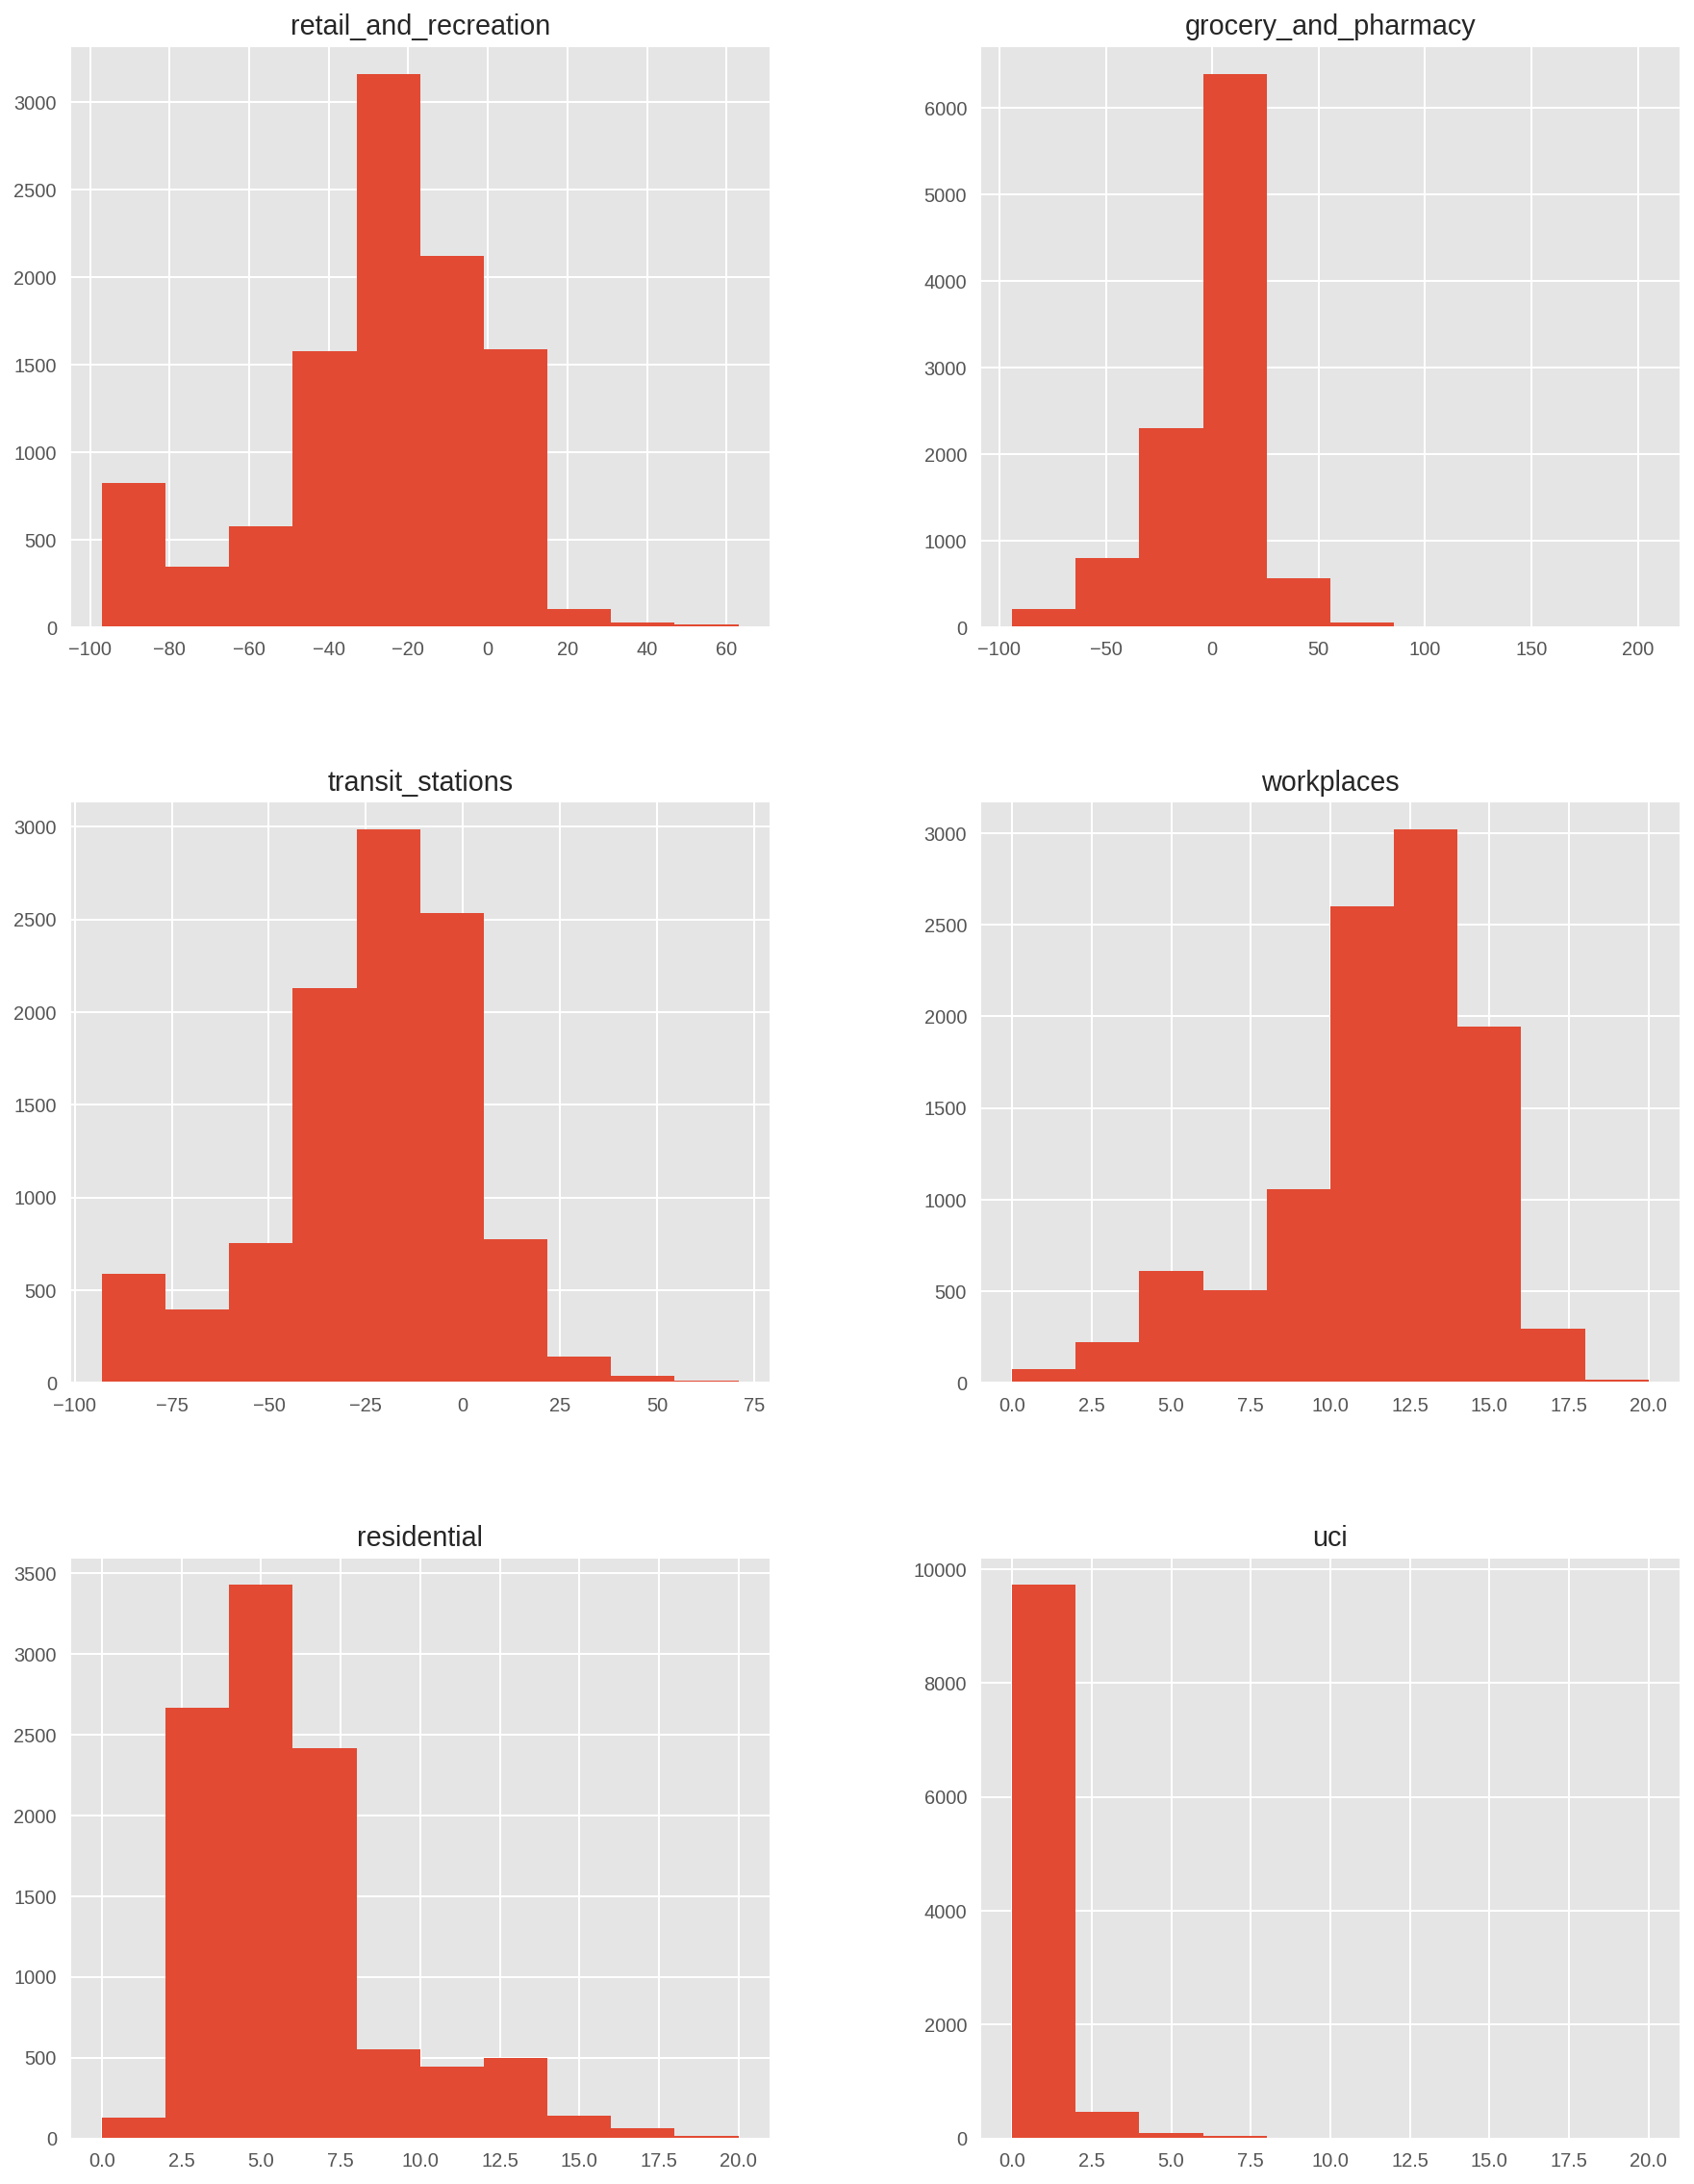

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_uci_.hist(ax = ax)

In [ ]:
# Matriz de correlación

corr_var = df_uci_.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


In [ ]:
cols_needed3=['retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'uci']

In [ ]:
#data2=data2[~data2.ccaa.isin(excluded_cntry)]
if len(cols_needed3)==0:
    data2_sub3=df_uci_.select_dtypes(include='float')
else:
    data2_sub3=df_uci_[cols_needed3]
data2_sub3=pd.concat([data2_sub3,df_uci_[['ccaa']]],axis=1)
data2_sub3=data2_sub3.groupby('ccaa').mean().reset_index()
data2_sub3.fillna(0,inplace=True)

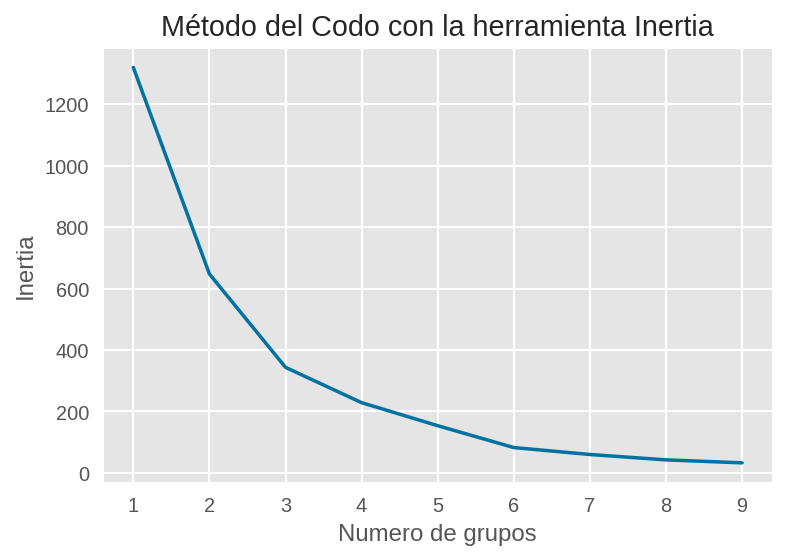

In [ ]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub3.drop(['ccaa'],axis=1)) 
    kmeanModel.fit(data2_sub3.drop(['ccaa'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [ ]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub3.drop(['ccaa'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub3=data2_sub3.drop(['ccaa'],axis=1)
# Adding cluster to the Dataset
today_sub3['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub3.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

retail_and_recreation  grocery_and_pharmacy  ...  residential  uci
cluster                                               ...                  
1                        -23.3                   2.2  ...          5.6  0.1
2                        -27.5                  -1.3  ...          5.9  0.5
3                        -35.0                 -12.7  ...          7.1  1.2

[3 rows x 6 columns]

In [ ]:
today_Sub_2c=pd.concat([data2_sub3[['ccaa']],today_sub3],axis=1)
today_Sub_2c.head(5)

ccaa  retail_and_recreation  ...       uci  cluster
0  Andalucía             -25.160920  ...  1.453263        2
1     Aragón             -26.168582  ...  0.322812        2
2   Asturias             -28.316913  ...  0.202396        2
3   Canarias             -34.403394  ...  0.348841        3
4  Cantabria             -18.422003  ...  0.145472        1

[5 rows x 8 columns]

In [ ]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2c[today_Sub_2c.cluster==i]['ccaa'].values))

****Comunidades autónomas en el grupo 1*****
['Cantabria', 'Extremadura']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Comunidades autónomas en el grupo 3*****
['Canarias', 'Madrid']
****Comunidades autónomas en el grupo 4*****
[]


In [ ]:
#import plotly.express as px
fig = px.treemap(today_Sub_2c, path=['cluster','ccaa'], values='uci')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [ ]:
# creando los grupos
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(data2_sub3.drop(['ccaa'],axis=1))

In [ ]:
heirarchy3=data2_sub3.copy()
heirarchy3['cluster'] = y_hc

In [ ]:
# Aca se anota el número de clústers si se desea poner de forma manual 
for i in range(4):
    print('****Nombre de las comunidades autónomas en cluster {}*****'.format(str(i)))
    print(list(heirarchy3[heirarchy3.cluster==i]['ccaa'].values))

****Nombre de las comunidades autónomas en cluster 0*****
['Cantabria', 'Extremadura']
****Nombre de las comunidades autónomas en cluster 1*****
['Canarias', 'Madrid']
****Nombre de las comunidades autónomas en cluster 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Nombre de las comunidades autónomas en cluster 3*****
[]


In [ ]:
# grafico de los grupos de países
fig = px.treemap(heirarchy3, path=['cluster','ccaa'], values='uci')
fig.update_layout(autosize=False,width=800,height=700)
fig.show()

## Análisis Fallecidos

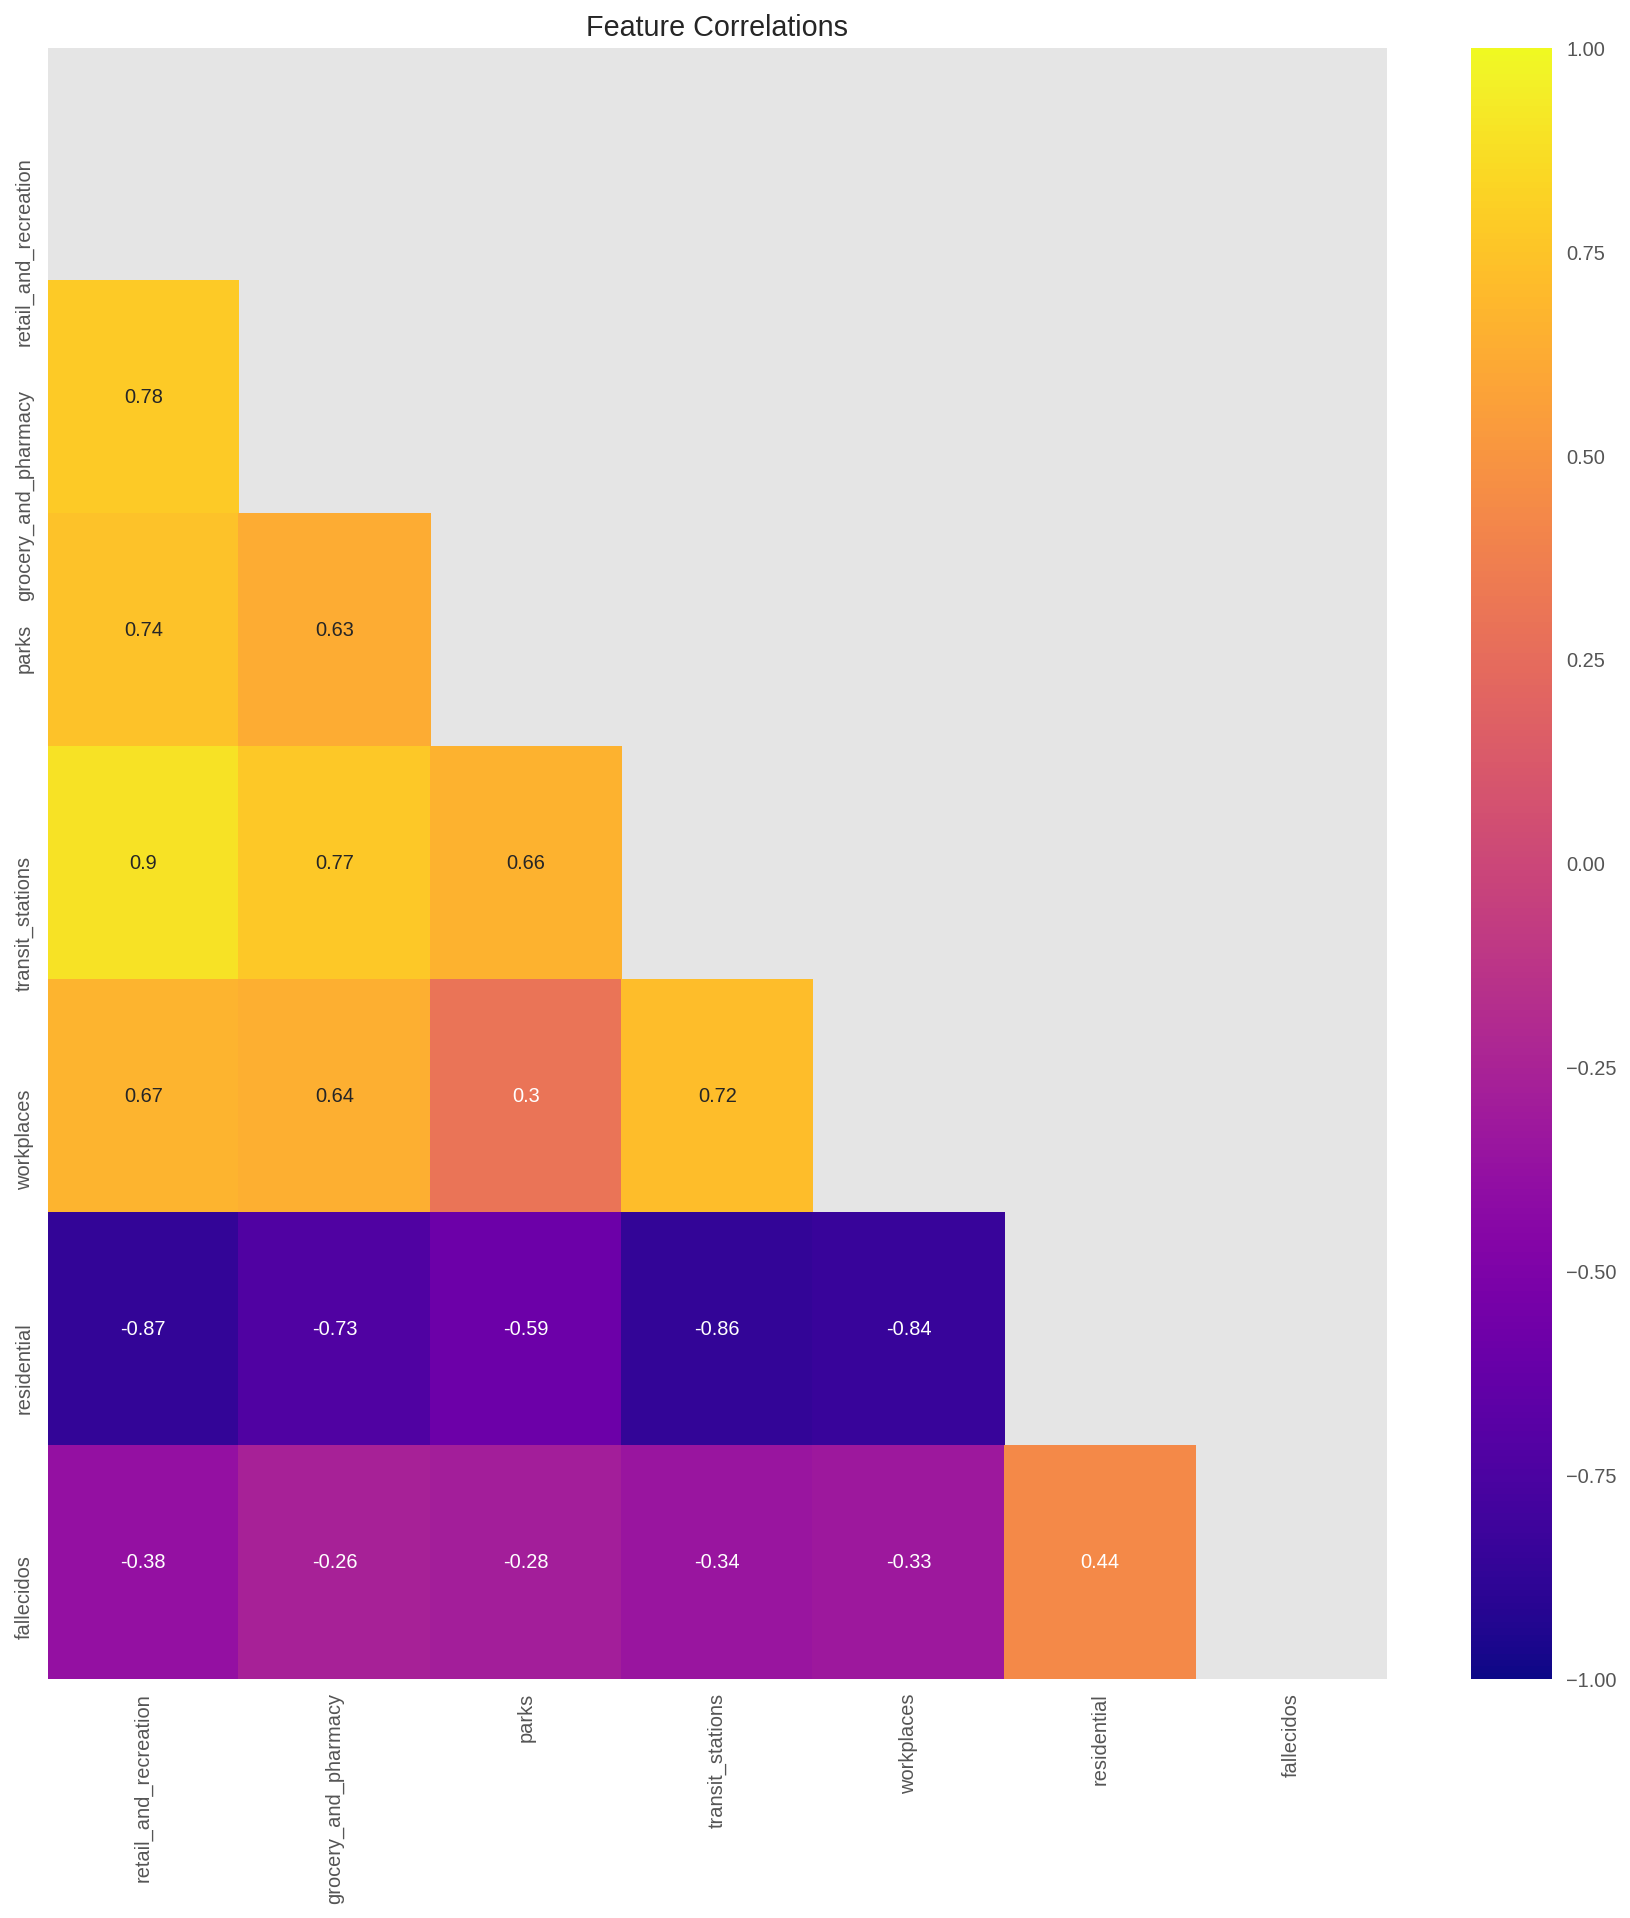

In [ ]:
# Validación correlaciones con la variable dependiente
colormap = plt.cm.plasma
matrix1 = np.triu(df_fallecidos.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_fallecidos.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [ ]:
#Selección de variables

df_fallecidos_ = df_fallecidos[['ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
        'transit_stations', 'workplaces', 'residential', 'fallecidos']].copy()

#Se retiran los datos de Ceuta y Melilla
df_fallecidos_ = df_fallecidos_.drop(df_fallecidos_[df_fallecidos_['ccaa']=='Ceuta y Melilla'].index)
df_fallecidos_.ccaa.unique()

# Normalización de cada columna con valores 0 a 20
for i in df_fallecidos_.iloc[:,4:]:
  df_fallecidos_[i]=((df_fallecidos_[i]-df_fallecidos_[i].min()) / 
              (df_fallecidos_[i].max()-df_fallecidos_[i].min()))*20 #Modificar 20 si se requiere más o menos

df_fallecidos_.describe()

retail_and_recreation  grocery_and_pharmacy  ...   residential    fallecidos
count           10353.000000          10353.000000  ...  10353.000000  10353.000000
mean              -27.913745             -2.217763  ...      5.993185      0.484895
std                26.486631             23.317523  ...      2.944028      1.158064
min               -97.000000            -94.000000  ...      0.000000      0.000000
25%               -39.000000             -8.166667  ...      3.928571      0.000000
50%               -24.000000              0.333333  ...      5.357143      0.119760
75%                -9.000000              9.000000  ...      7.023810      0.479042
max                63.000000            205.000000  ...     20.000000     20.000000

[8 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d22d9890>,
      dtype=object)

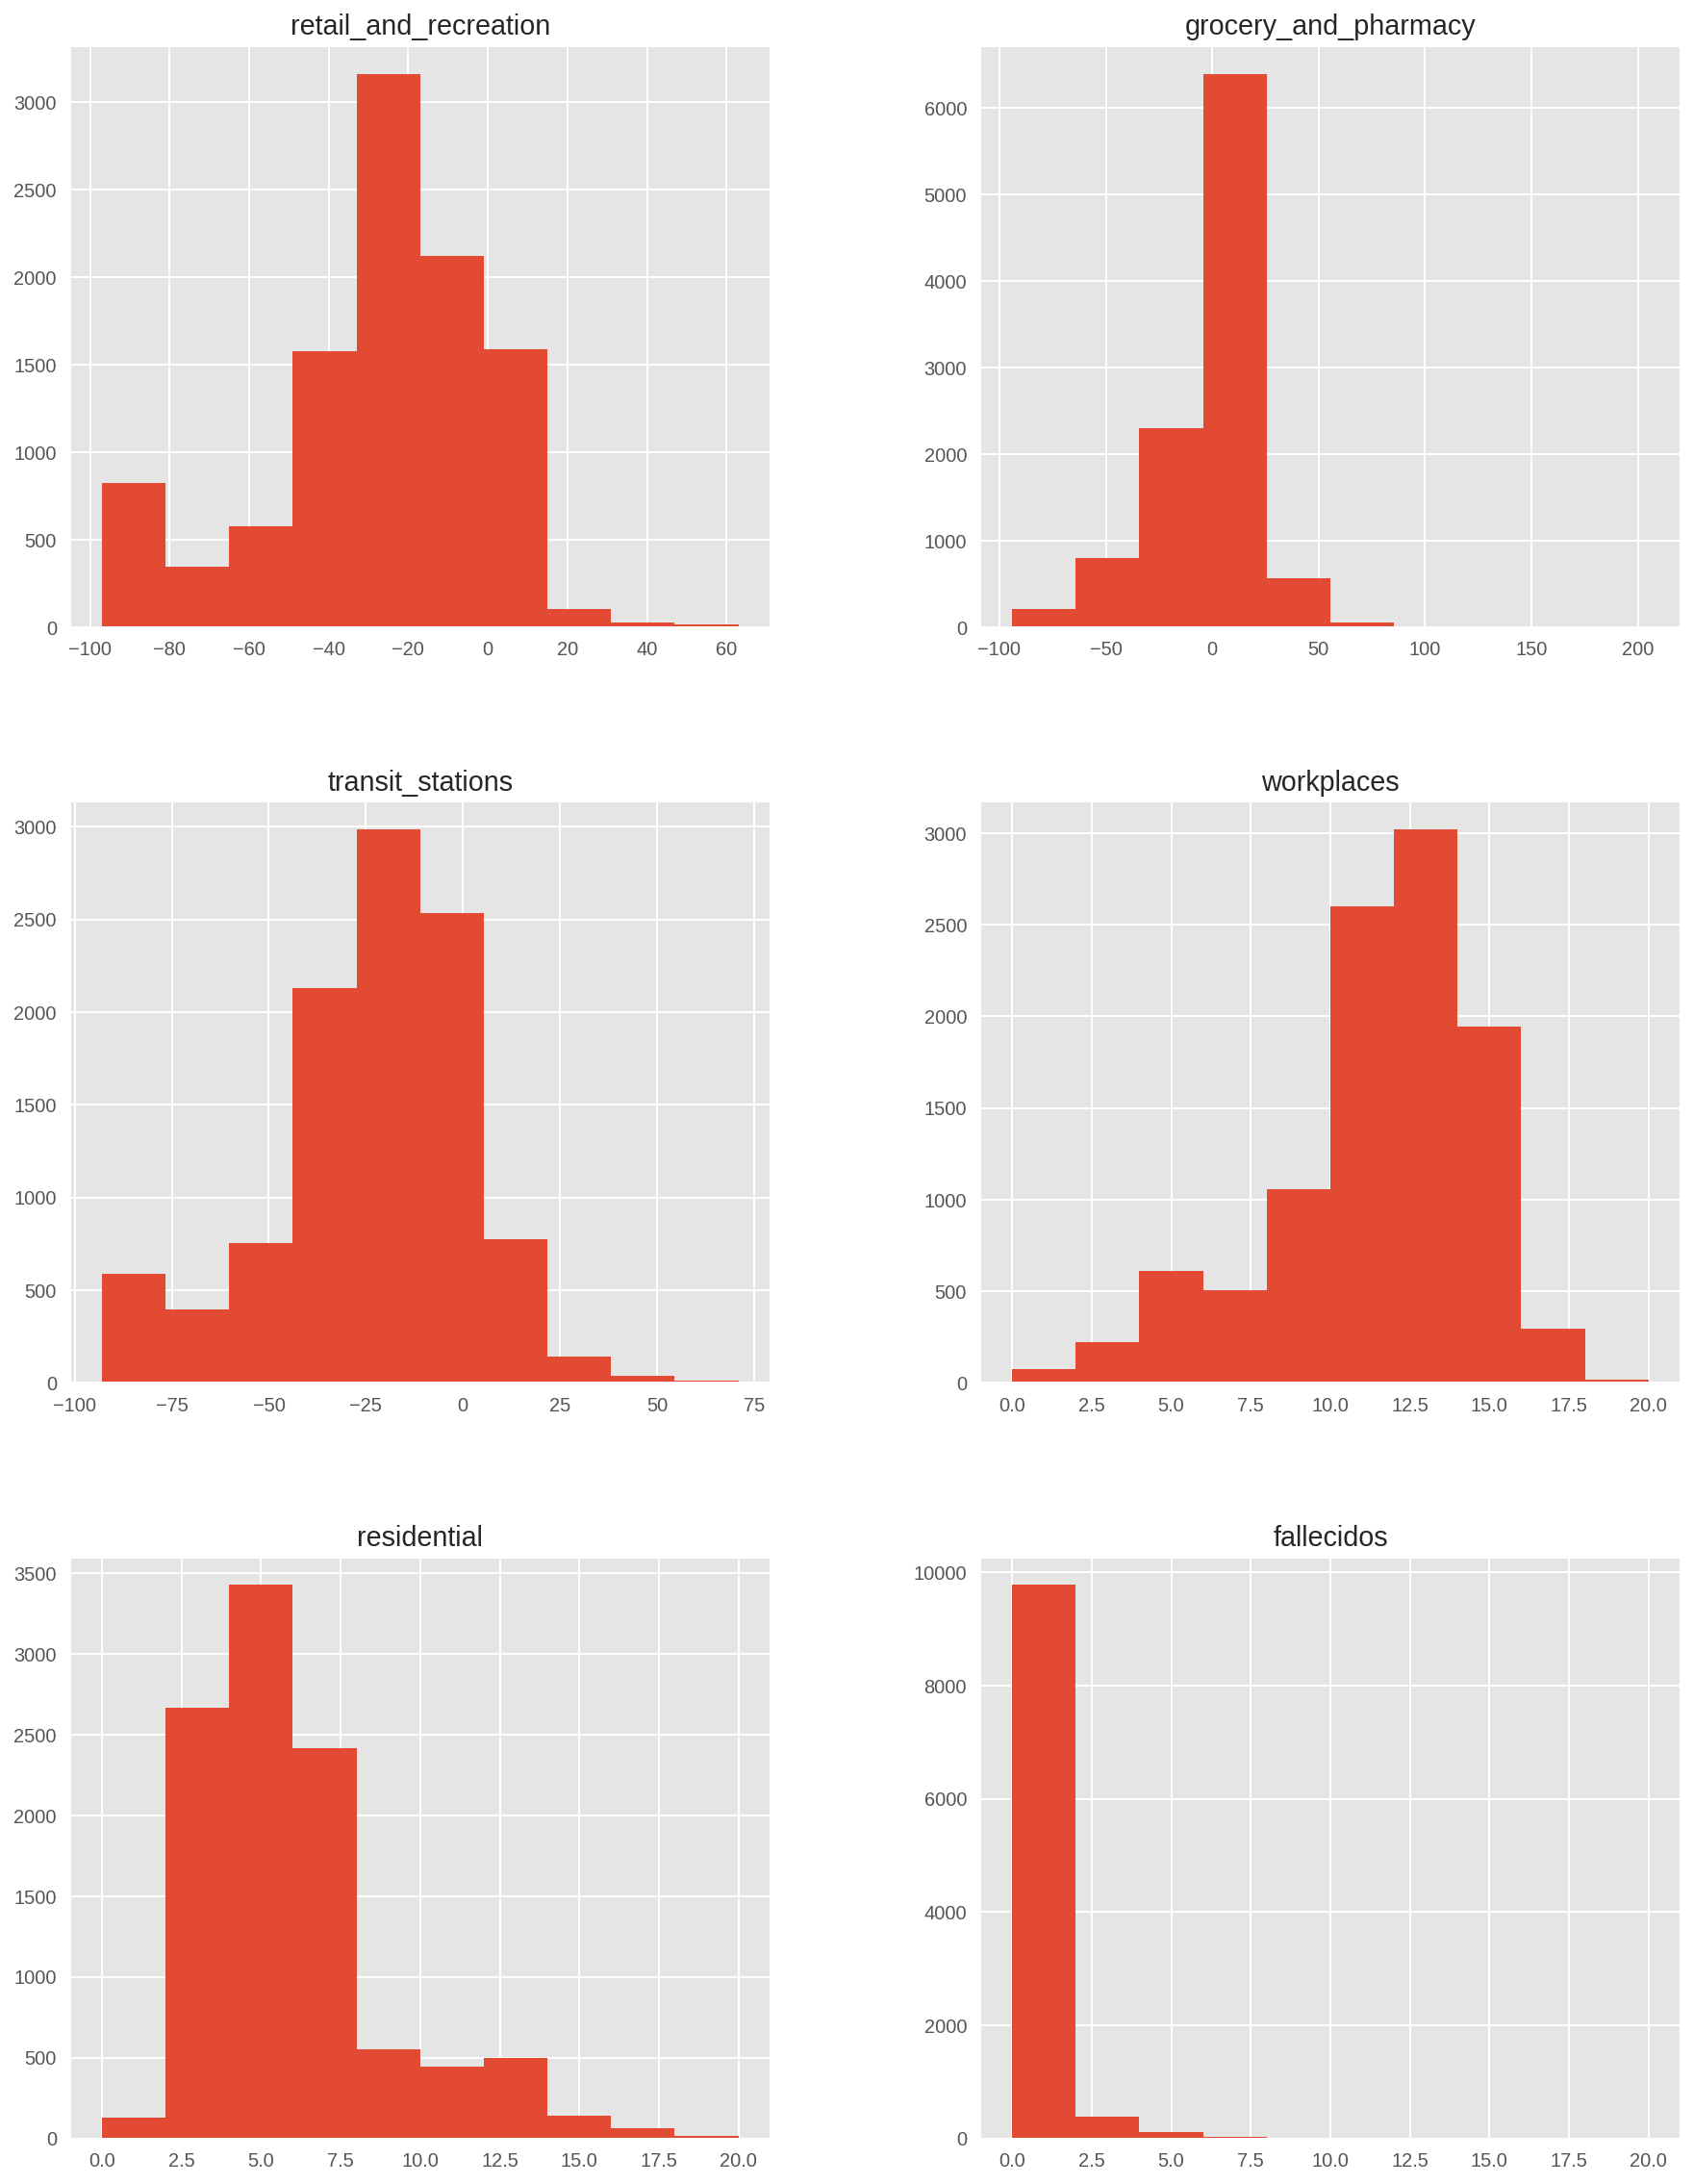

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_fallecidos_.hist(ax = ax)

In [ ]:
# Matriz de correlación

corr_var = df_fallecidos_.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


In [ ]:
cols_needed4=['retail_and_recreation', 'grocery_and_pharmacy',
       'transit_stations', 'workplaces', 'residential', 'fallecidos']

In [ ]:
#data2=data2[~data2.ccaa.isin(excluded_cntry)]
if len(cols_needed4)==0:
    data2_sub4=df_fallecidos_.select_dtypes(include='float')
else:
    data2_sub4=df_fallecidos_[cols_needed4]
data2_sub4=pd.concat([data2_sub4,df_fallecidos_[['ccaa']]],axis=1)
data2_sub4=data2_sub4.groupby('ccaa').mean().reset_index()
data2_sub4.fillna(0,inplace=True)

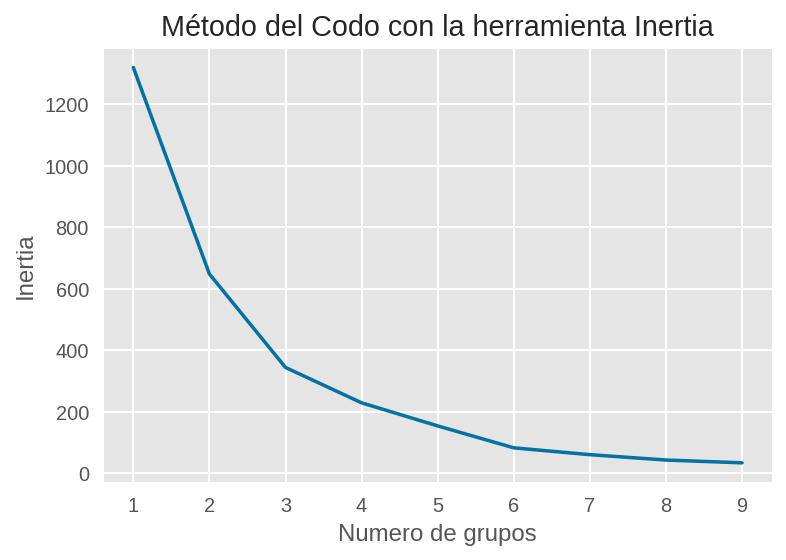

In [ ]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub4.drop(['ccaa'],axis=1)) 
    kmeanModel.fit(data2_sub4.drop(['ccaa'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [ ]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub4.drop(['ccaa'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub4=data2_sub4.drop(['ccaa'],axis=1)
# Adding cluster to the Dataset
today_sub4['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub4.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

retail_and_recreation  grocery_and_pharmacy  ...  residential  fallecidos
cluster                                               ...                         
1                        -23.3                   2.2  ...          5.6         0.1
2                        -27.5                  -1.3  ...          5.9         0.5
3                        -35.0                 -12.7  ...          7.1         0.8

[3 rows x 6 columns]

In [ ]:
today_Sub_2d=pd.concat([data2_sub4[['ccaa']],today_sub4],axis=1)
today_Sub_2d.head(5)

ccaa  retail_and_recreation  ...  fallecidos  cluster
0  Andalucía             -25.160920  ...    1.055623        2
1     Aragón             -26.168582  ...    0.364394        2
2   Asturias             -28.316913  ...    0.201862        2
3   Canarias             -34.403394  ...    0.091639        3
4  Cantabria             -18.422003  ...    0.058897        1

[5 rows x 8 columns]

In [ ]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2d[today_Sub_2d.cluster==i]['ccaa'].values))

****Comunidades autónomas en el grupo 1*****
['Cantabria', 'Extremadura']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Comunidades autónomas en el grupo 3*****
['Canarias', 'Madrid']
****Comunidades autónomas en el grupo 4*****
[]


In [ ]:
#import plotly.express as px
fig = px.treemap(today_Sub_2d, path=['cluster','ccaa'], values='fallecidos')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [ ]:
# creando los grupos
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(data2_sub4.drop(['ccaa'],axis=1))

In [ ]:
heirarchy4=data2_sub4.copy()
heirarchy4['cluster'] = y_hc

In [ ]:
# Aca se anota el número de clústers si se desea poner de forma manual 
for i in range(4):
    print('****Nombre de las comunidades autónomas en cluster {}*****'.format(str(i)))
    print(list(heirarchy4[heirarchy4.cluster==i]['ccaa'].values))

****Nombre de las comunidades autónomas en cluster 0*****
['Cantabria', 'Extremadura']
****Nombre de las comunidades autónomas en cluster 1*****
['Canarias', 'Madrid']
****Nombre de las comunidades autónomas en cluster 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Nombre de las comunidades autónomas en cluster 3*****
[]


In [ ]:
# grafico de los grupos de países
fig = px.treemap(heirarchy4, path=['cluster','ccaa'], values='fallecidos')
fig.update_layout(autosize=False,width=800,height=700)
fig.show()

## Análisis Ceuta y Melilla

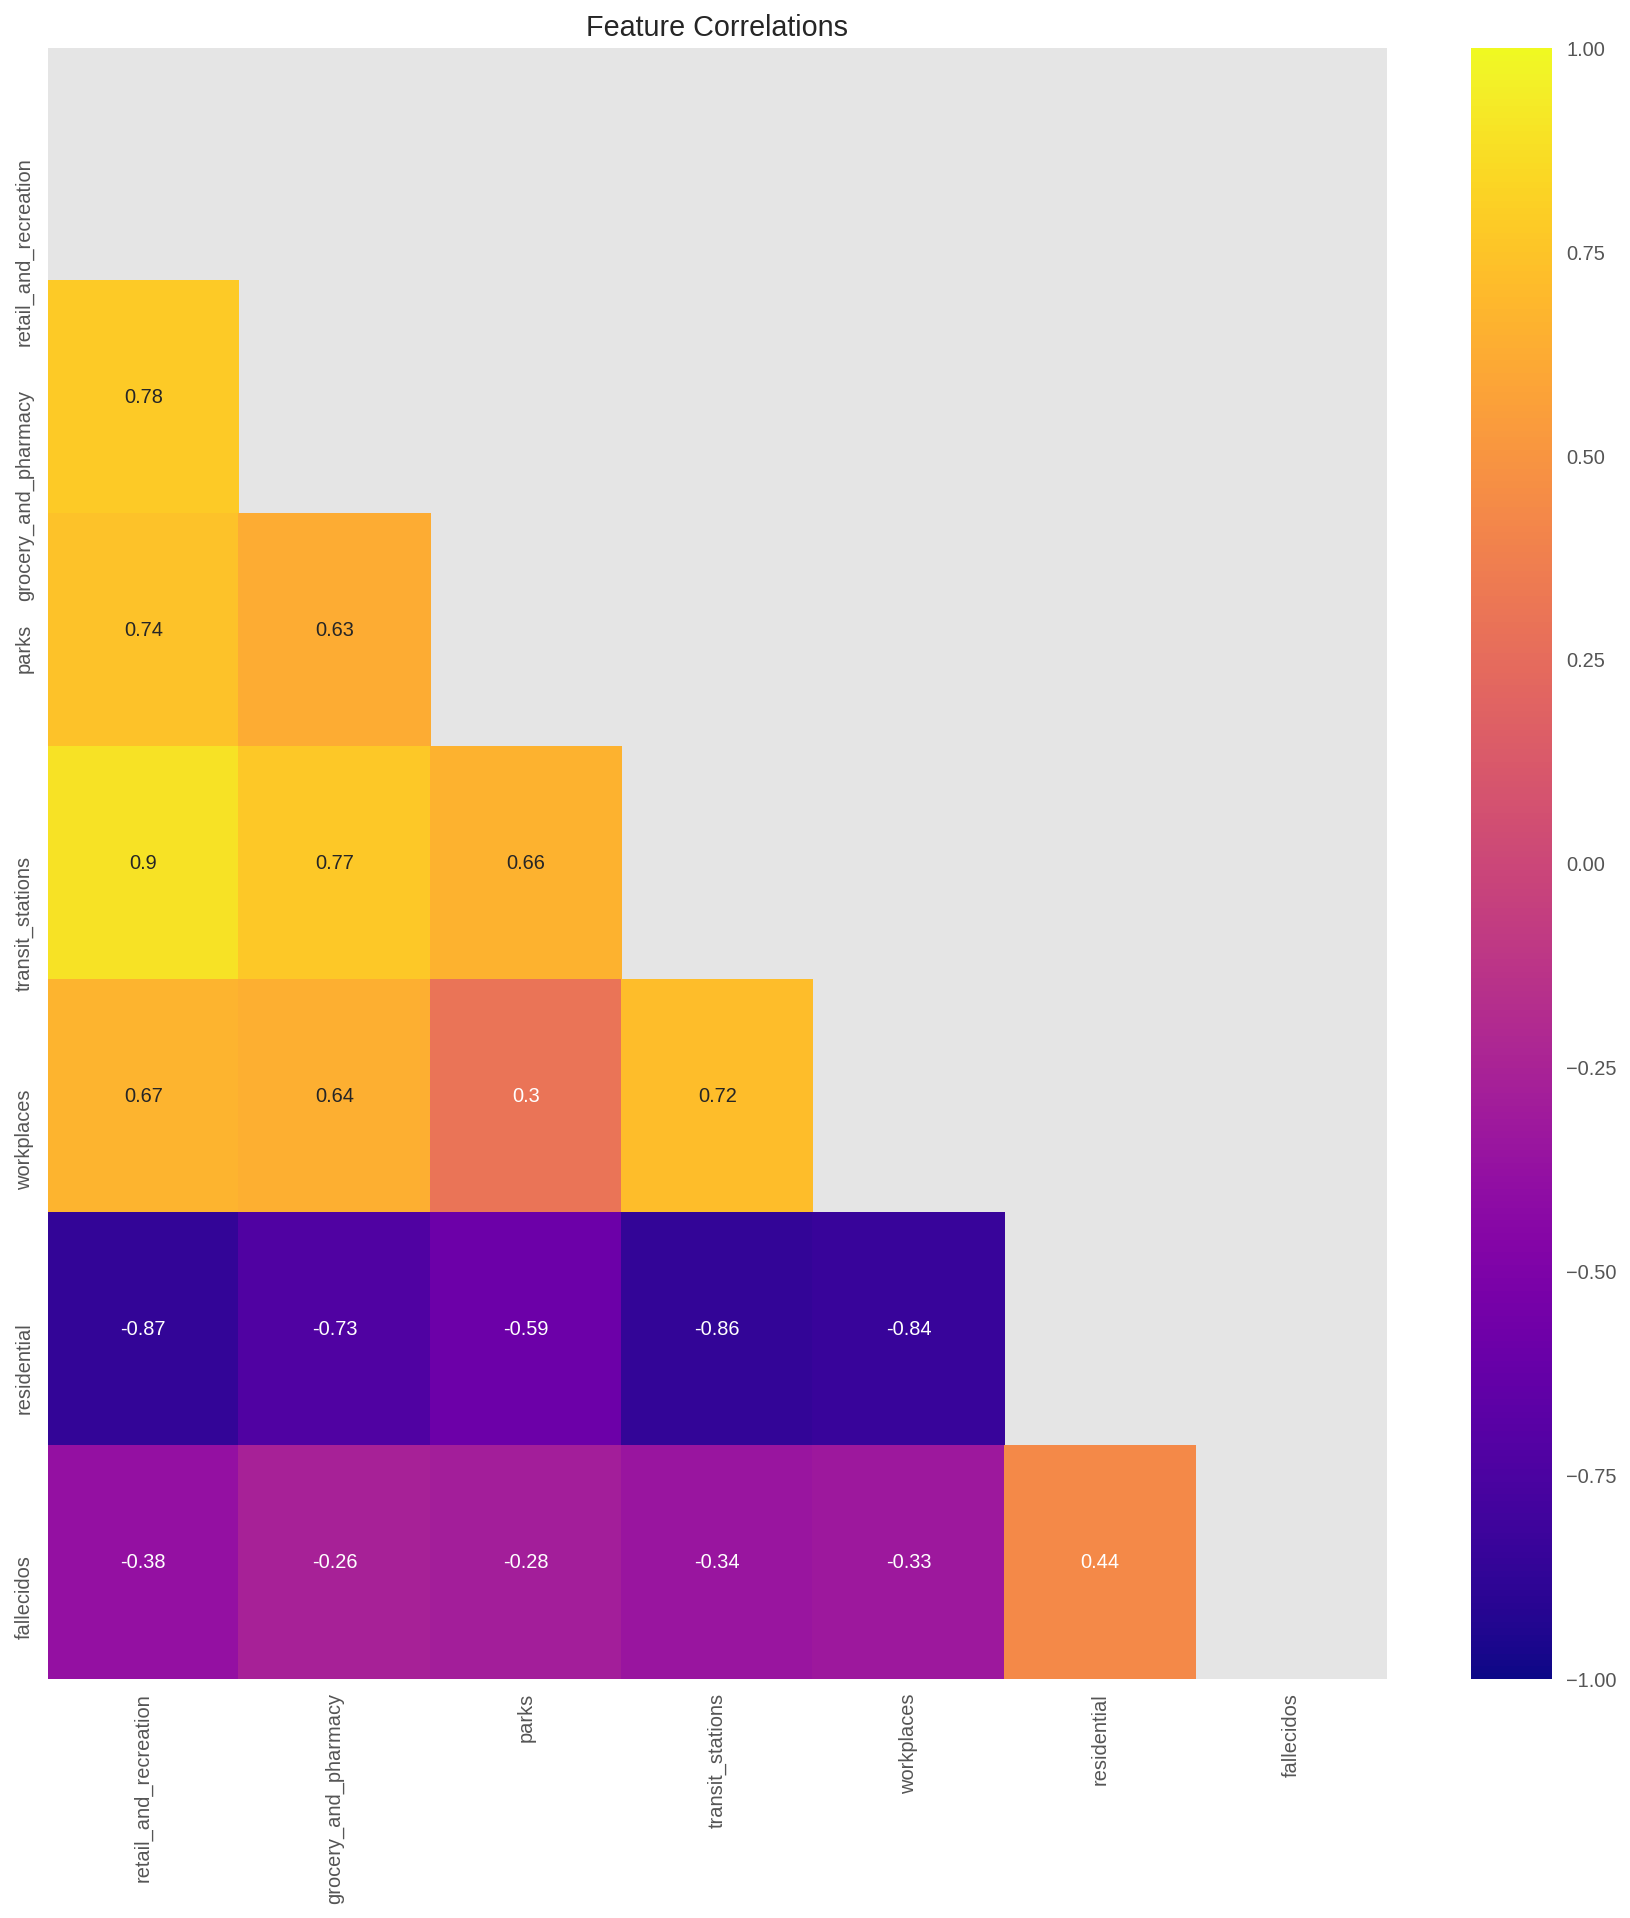

In [ ]:
# Validación correlaciones con la variable dependiente
colormap = plt.cm.plasma
matrix1 = np.triu(df_fallecidos.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_fallecidos.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [ ]:
#Selección de variables

df_ceuta_melilla = df_cm2[['ccaa', 'retail_and_recreation', 'grocery_and_pharmacy',
        'transit_stations', 'workplaces', 'residential', 'confirmados', 
        'hospitalizados', 'uci', 'fallecidos']].copy()

#Se retiran los datos de Ceuta y Melilla
df_ceuta_melilla = df_ceuta_melilla[df_ceuta_melilla['ccaa'].str.contains("Ceuta y Melilla")]

# Normalización de cada columna con valores 0 a 20
for i in df_ceuta_melilla.iloc[:,4:]:
  df_ceuta_melilla[i]=((df_ceuta_melilla[i]-df_ceuta_melilla[i].min()) / 
              (df_ceuta_melilla[i].max()-df_ceuta_melilla[i].min()))*20 #Modificar 20 si se requiere más o menos

df_ceuta_melilla.describe()

retail_and_recreation  grocery_and_pharmacy  ...         uci  fallecidos
count             609.000000            609.000000  ...  609.000000  609.000000
mean              -27.646962            -14.884510  ...    1.023536    1.490969
std                23.989030             17.482199  ...    2.252272    3.262174
min               -95.500000            -86.500000  ...    0.000000    0.000000
25%               -35.000000            -17.333333  ...    0.000000    0.000000
50%               -23.500000            -11.000000  ...    0.000000    0.000000
75%               -11.500000             -4.000000  ...    0.000000    0.000000
max                13.000000             28.000000  ...   20.000000   20.000000

[8 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d028ea90>,
      dtype=object)

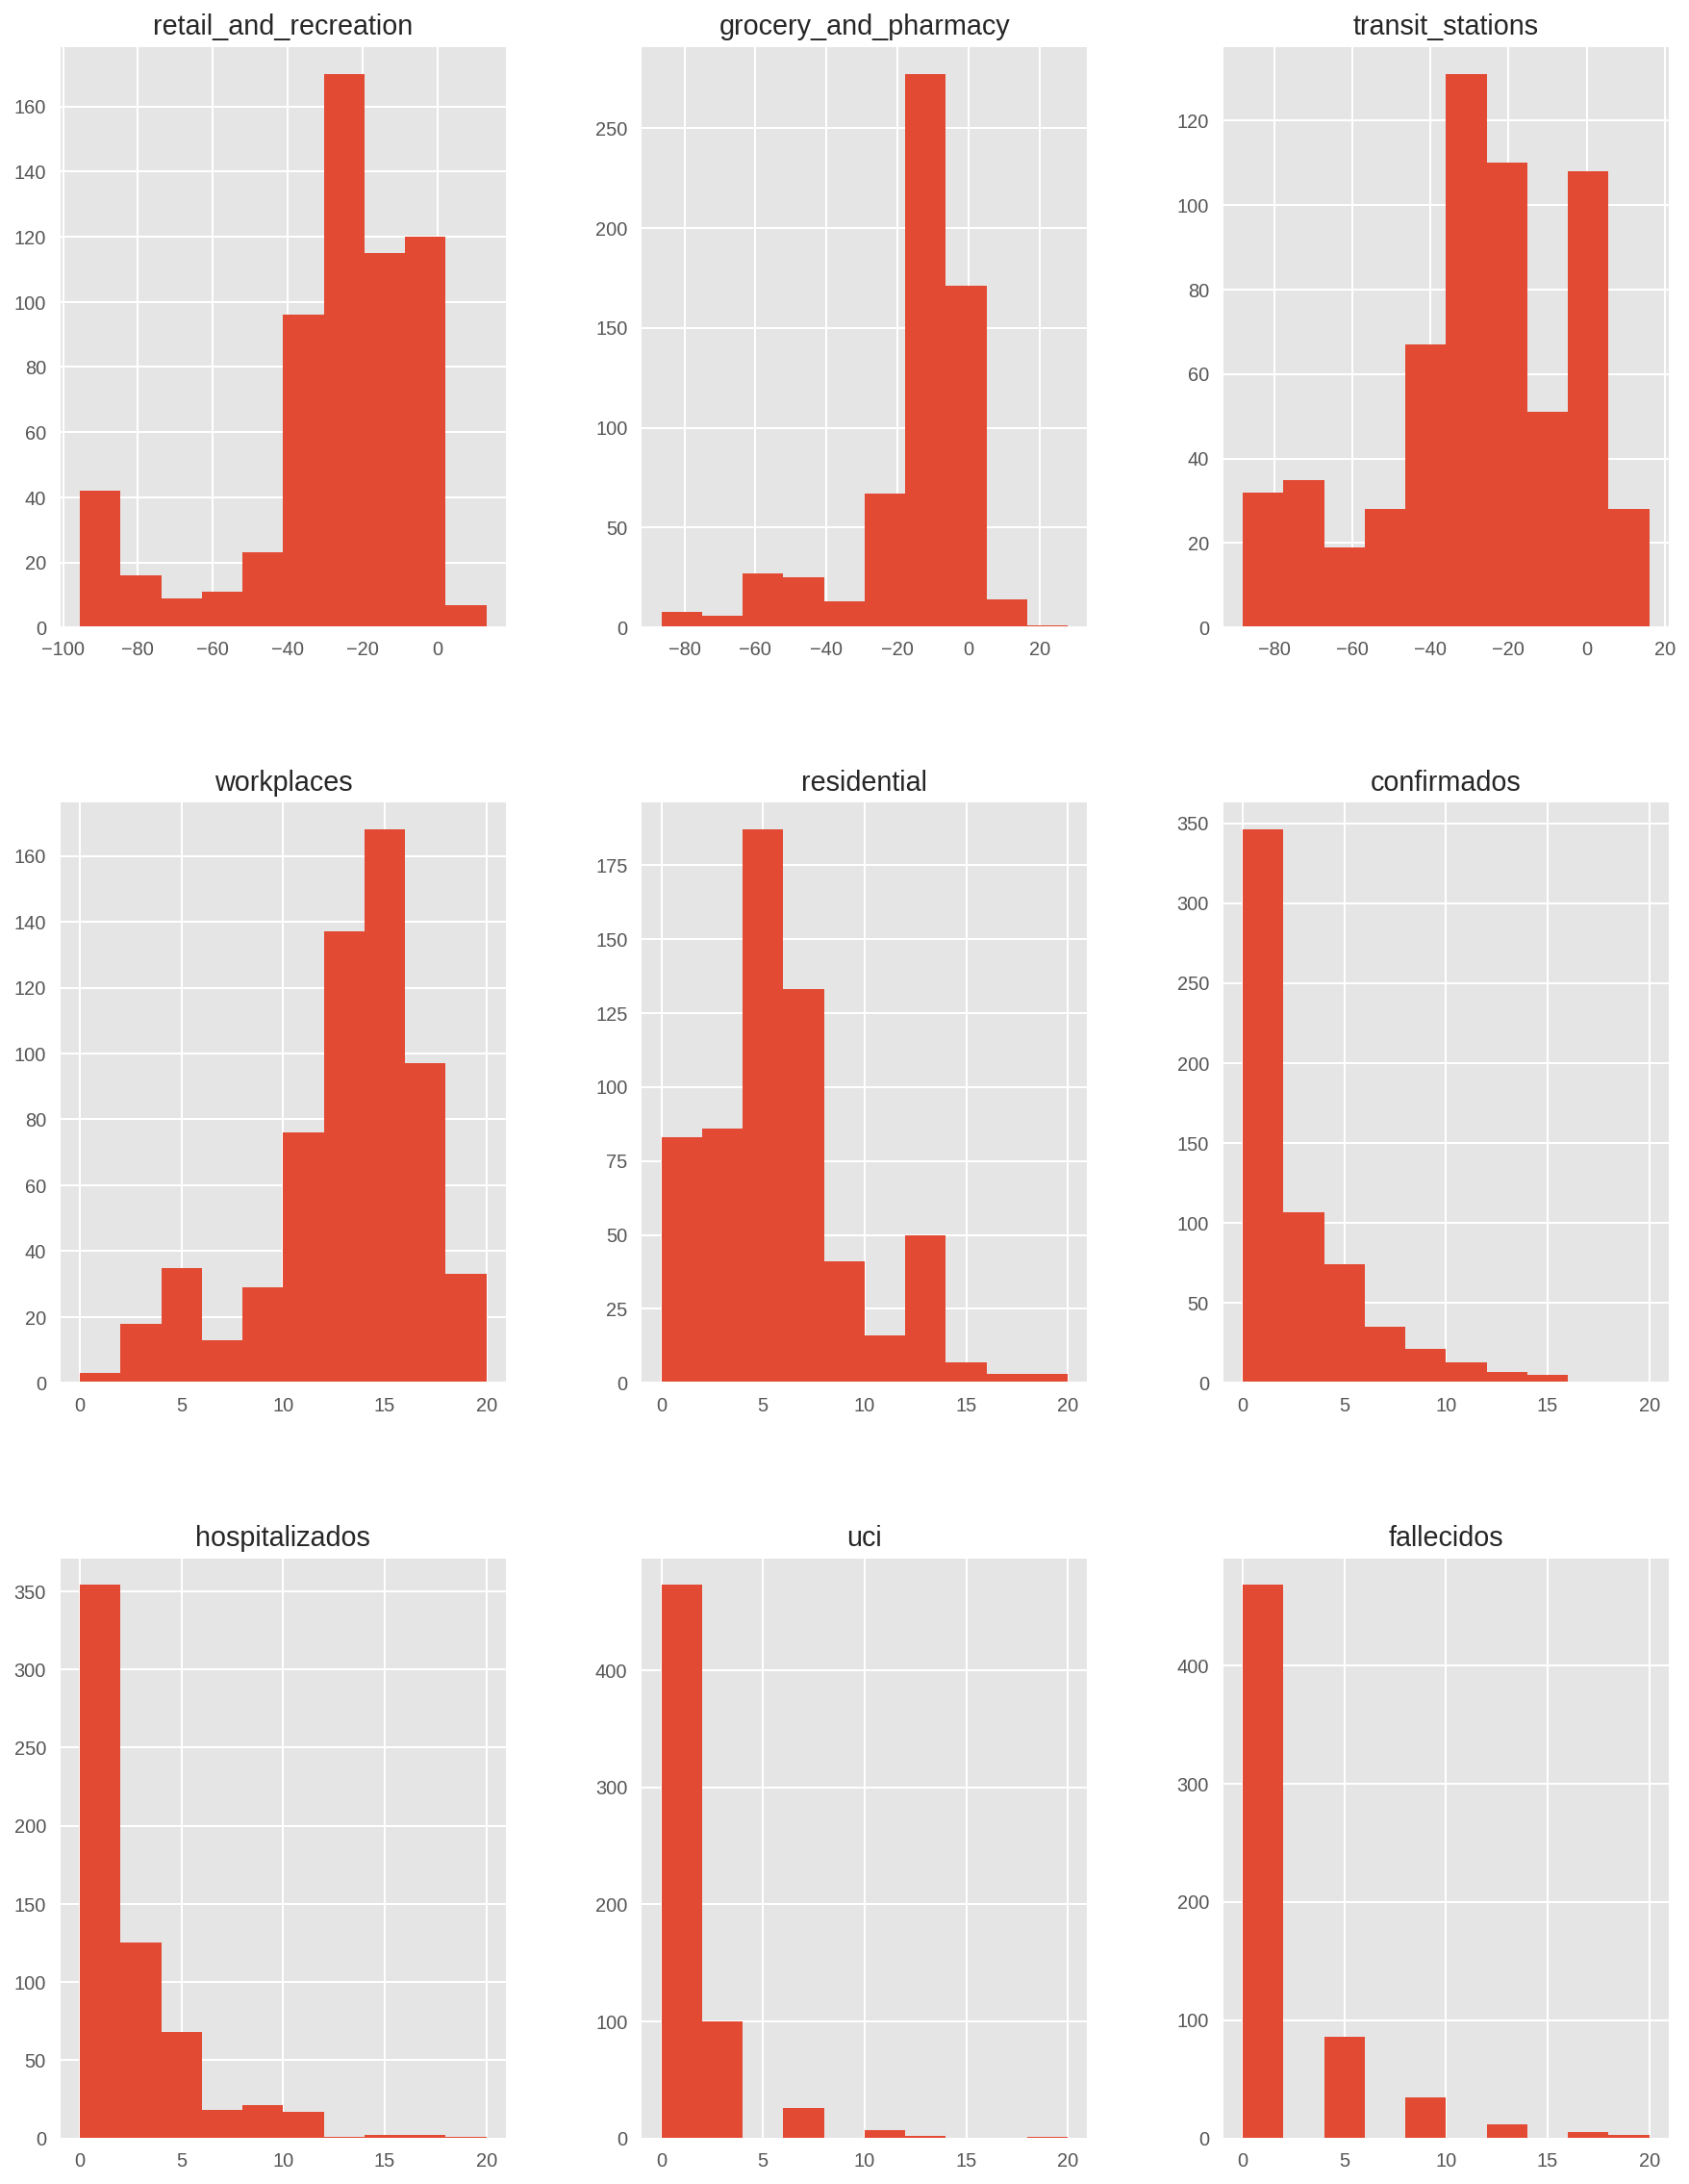

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_ceuta_melilla.hist(ax = ax)

In [ ]:
# Matriz de correlación

corr_var = df_ceuta_melilla.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


In [ ]:
cols_needed4=['retail_and_recreation', 'grocery_and_pharmacy',
        'transit_stations', 'workplaces', 'residential', 'confirmados', 
        'hospitalizados', 'uci', 'fallecidos']

In [ ]:
#data2=data2[~data2.ccaa.isin(excluded_cntry)]
if len(cols_needed4)==0:
    data2_sub4=df_ceuta_melilla.select_dtypes(include='float')
else:
    data2_sub4=df_ceuta_melilla[cols_needed4]
data2_sub4=pd.concat([data2_sub4,df_ceuta_melilla[['ccaa']]],axis=1)
data2_sub4=data2_sub4.groupby('ccaa').mean().reset_index()
data2_sub4.fillna(0,inplace=True)

In [ ]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub4.drop(['ccaa'],axis=1)) 
    kmeanModel.fit(data2_sub4.drop(['ccaa'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

ValueError: ignored

In [ ]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub4.drop(['ccaa'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub4=data2_sub4.drop(['ccaa'],axis=1)
# Adding cluster to the Dataset
today_sub4['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub4.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

retail_and_recreation  grocery_and_pharmacy  ...  residential  fallecidos
cluster                                               ...                         
1                        -23.3                   2.2  ...          5.6         0.1
2                        -27.5                  -1.3  ...          5.9         0.5
3                        -35.0                 -12.7  ...          7.1         0.8

[3 rows x 6 columns]

In [ ]:
today_Sub_2d=pd.concat([data2_sub4[['ccaa']],today_sub4],axis=1)
today_Sub_2d.head(5)

ccaa  retail_and_recreation  ...  fallecidos  cluster
0  Andalucía             -25.160920  ...    1.055623        2
1     Aragón             -26.168582  ...    0.364394        2
2   Asturias             -28.316913  ...    0.201862        2
3   Canarias             -34.403394  ...    0.091639        3
4  Cantabria             -18.422003  ...    0.058897        1

[5 rows x 8 columns]

In [ ]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2d[today_Sub_2d.cluster==i]['ccaa'].values))

****Comunidades autónomas en el grupo 1*****
['Cantabria', 'Extremadura']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Comunidades autónomas en el grupo 3*****
['Canarias', 'Madrid']
****Comunidades autónomas en el grupo 4*****
[]


In [ ]:
#import plotly.express as px
fig = px.treemap(today_Sub_2d, path=['cluster','ccaa'], values='fallecidos')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [ ]:
# creando los grupos
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(data2_sub4.drop(['ccaa'],axis=1))

In [ ]:
heirarchy4=data2_sub4.copy()
heirarchy4['cluster'] = y_hc

In [ ]:
# Aca se anota el número de clústers si se desea poner de forma manual 
for i in range(4):
    print('****Nombre de las comunidades autónomas en cluster {}*****'.format(str(i)))
    print(list(heirarchy4[heirarchy4.cluster==i]['ccaa'].values))

****Nombre de las comunidades autónomas en cluster 0*****
['Cantabria', 'Extremadura']
****Nombre de las comunidades autónomas en cluster 1*****
['Canarias', 'Madrid']
****Nombre de las comunidades autónomas en cluster 2*****
['Andalucía', 'Aragón', 'Asturias', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Comunidad Valenciana', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra', 'País Vasco']
****Nombre de las comunidades autónomas en cluster 3*****
[]


In [ ]:
# grafico de los grupos de países
fig = px.treemap(heirarchy4, path=['cluster','ccaa'], values='fallecidos')
fig.update_layout(autosize=False,width=800,height=700)
fig.show()